# Ignore Warnings

In [1]:
import warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from sklearn.datasets import make_blobs
import colorcet as cc

# *Data* *Profiling*


**Convert The Dataset To Dataframe**

In [3]:
pd.options.display.max_columns = 30 # To Display All Columns
pd.options.display.max_rows = 1000
clean_df = pd.read_csv('Clean_Retail_Data.csv')

**First Five Rows**

In [4]:
clean_df.head()

Customer_ID        City                   State    Country  Gender Income  \
0        37249    Dortmund  North Rhine-Westphalia    Germany    Male    Low   
1        69749  Nottingham                 England         UK  Female    Low   
2        30192     Geelong                Victoria  Australia    Male    Low   
3        62101    Edmonton                 Alberta     Canada    Male   High   
4        27901     Bristol                 England         UK  Female    Low   

  Customer_Segment  Month  Quantity  Unit_Price  Total_Amount  \
0          Regular      9         3  108.028757    324.086270   
1          Premium     12         2  403.353907    806.707815   
2          Regular      4         3  354.477600   1063.432799   
3          Premium      5         7  352.407717   2466.854021   
4          Premium      1         2  124.276524    248.553049   

  Product_Category  Product_Brand Product_Type Shipping_Method Payment_Method  \
0         Clothing           Nike       Shorts        Same-Day     Debit Card   
1      Electronics         Lenovo       Tablet        Standard    Credit Card   
2            Books  Penguin Books   Children's        Same-Day    Credit Card   
3  Home And Living     Home Depot        Tools        Standard         PayPal   
4          Grocery         Nestle    Chocolate        Standard           Cash   

  Order_Status  Ratings           Products Month_Name        Day  \
0      Shipped        5     Cycling shorts  September     Monday   
1   Processing        4         Lenovo Tab   December     Sunday   
2   Processing        2   Sports equipment      April  Wednesday   
3   Processing        4      Utility knife        May     Monday   
4      Shipped        1  Chocolate cookies    January  Wednesday   

   Day_Of_Month  Hour Quarter  Season Age_Group  
0            18    22   Third  Autumn  Twenties  
1            31     8  Fourth  Winter     Youth  
2            26     4  Second  Spring   Forties  
3             8    14  Second  Spring   Fifties  
4            10    16   First  Winter  Twenties

**Last Five Rows**

In [5]:
clean_df.tail()

Customer_ID     City     State Country  Gender  Income  \
301975        53851  Chicago  Illinois     USA  Female     Low   
301976        84110  Chicago  Illinois     USA    Male     Low   
301977        97340  Chicago  Illinois     USA    Male  Medium   
301978        76223  Chicago  Illinois     USA  Female     Low   
301979        73076  Chicago  Illinois     USA  Female     Low   

       Customer_Segment  Month  Quantity  Unit_Price  Total_Amount  \
301975          Premium      3         6  424.173275   2545.039653   
301976          Premium      5         7  214.348876   1500.442130   
301977          Regular      7        10  451.623670   4516.236700   
301978              New     12         2  466.629382    933.258763   
301979              New      9         6  437.278924   2623.673546   

       Product_Category      Product_Brand Product_Type Shipping_Method  \
301975      Electronics             Huawei       Tablet        Standard   
301976  Home And Living  Bed Bath & Beyond      Bedding        Same-Day   
301977            Books      Penguin Books      Fiction        Same-Day   
301978            Books      HarperCollins     Thriller        Same-Day   
301979            Books      Penguin Books      Fiction        Standard   

       Payment_Method Order_Status  Ratings         Products Month_Name  \
301975    Credit Card   Processing        3  Huawei MediaPad      March   
301976    Credit Card      Pending        4          Blanket        May   
301977    Credit Card   Processing        4  Science fiction       July   
301978     Debit Card      Shipped        2           Action   December   
301979    Credit Card    Delivered        4          Fantasy  September   

             Day  Day_Of_Month  Hour Quarter  Season Age_Group  
301975    Friday             3    10   First  Spring   Fifties  
301976  Saturday            20    12  Second  Spring   Sixties  
301977  Saturday             1    18   Third  Summer  Twenties  
301978   Tuesday            19     0  Fourth  Winter  Twenties  
301979   Tuesday            26    10   Third  Autumn  Twenties

**Data Type Of Columns**

In [6]:
clean_df.dtypes

Customer_ID           int64
City                 object
State                object
Country              object
Gender               object
Income               object
Customer_Segment     object
Month                 int64
Quantity              int64
Unit_Price          float64
Total_Amount        float64
Product_Category     object
Product_Brand        object
Product_Type         object
Shipping_Method      object
Payment_Method       object
Order_Status         object
Ratings               int64
Products             object
Month_Name           object
Day                  object
Day_Of_Month          int64
Hour                  int64
Quarter              object
Season               object
Age_Group            object
dtype: object

**Number Of Rows And Columns**

In [7]:
print("Number of rows is \033[1m{}\033[0m and number of columns is \033[1m{}\033[0m".format(clean_df.shape[0], clean_df.shape[1]))

Number of rows is 301980 and number of columns is 26


**Dataset Columns**

In [8]:
clean_df.columns

Index(['Customer_ID', 'City', 'State', 'Country', 'Gender', 'Income',
       'Customer_Segment', 'Month', 'Quantity', 'Unit_Price', 'Total_Amount',
       'Product_Category', 'Product_Brand', 'Product_Type', 'Shipping_Method',
       'Payment_Method', 'Order_Status', 'Ratings', 'Products', 'Month_Name',
       'Day', 'Day_Of_Month', 'Hour', 'Quarter', 'Season', 'Age_Group'],
      dtype='object')

**Number Of Unique Values Of Each Columns**

In [9]:
clean_df.nunique()

Customer_ID          86765
City                   130
State                   59
Country                  5
Gender                   2
Income                   3
Customer_Segment         3
Month                   12
Quantity                10
Unit_Price          299630
Total_Amount        299634
Product_Category         5
Product_Brand           33
Product_Type            32
Shipping_Method          3
Payment_Method           4
Order_Status             4
Ratings                  5
Products               318
Month_Name              12
Day                      7
Day_Of_Month            31
Hour                    24
Quarter                  4
Season                   4
Age_Group                7
dtype: int64

**Find Number Of Duplicated Values**

In [10]:
clean_df.duplicated().sum()

0

**Find Number Of Missing Values In Each Column**

In [11]:
clean_df.isnull().sum()

Customer_ID         0
City                0
State               0
Country             0
Gender              0
Income              0
Customer_Segment    0
Month               0
Quantity            0
Unit_Price          0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
Products            0
Month_Name          0
Day                 0
Day_Of_Month        0
Hour                0
Quarter             0
Season              0
Age_Group           0
dtype: int64

**Data Statistics**

In [12]:
clean_df.describe(include=[object]).T

count unique           top    freq
City              301980    130       Chicago   29530
State             301980     59       England   54099
Country           301980      5           USA   95262
Gender            301980      2        Female  159940
Income            301980      3        Medium  130327
Customer_Segment  301980      3       Regular  143278
Product_Category  301980      5   Electronics   71236
Product_Brand     301980     33       PepsiCo   30345
Product_Type      301980     32         Water   24457
Shipping_Method   301980      3      Same-Day  104239
Payment_Method    301980      4   Credit Card   90170
Order_Status      301980      4     Delivered  130491
Products          301980    318  Spring water    2508
Month_Name        301980     12       January   25655
Day               301980      7      Thursday   43630
Quarter           301980      4         Third   75993
Season            301980      4        Summer   75923
Age_Group         301980      7      Twenties  126636

In [13]:
clean_df.describe().map(lambda x: f"{x:0.3f}").T

count       mean        std        min        25%  \
Customer_ID   301980.000  55008.208  26006.390  10000.000  32472.750   
Month         301980.000      6.505      3.452      1.000      3.000   
Quantity      301980.000      5.359      2.869      1.000      3.000   
Unit_Price    301980.000    255.149    141.386     10.000    132.886   
Total_Amount  301980.000   1367.667   1128.991     10.004    438.744   
Ratings       301980.000      3.162      1.321      1.000      2.000   
Day_Of_Month  301980.000     15.760      8.815      1.000      8.000   
Hour          301980.000     11.505      6.910      0.000      6.000   

                    50%        75%        max  
Customer_ID   55013.000  77512.250  99999.000  
Month             7.000     10.000     12.000  
Quantity          5.000      8.000     10.000  
Unit_Price      255.447    377.636    499.998  
Total_Amount   1041.135   2030.000   4999.626  
Ratings           3.000      4.000      5.000  
Day_Of_Month     16.000     23.000     31.000  
Hour             11.000     18.000     23.000

# Split The Data Depending On Country

In [14]:
usa_data = clean_df[clean_df['Country'] == 'USA'].copy()
uk_data = clean_df[clean_df['Country'] == 'UK'].copy()
canada_data = clean_df[clean_df['Country'] == 'Canada'].copy()
germany_data = clean_df[clean_df['Country'] == 'Germany'].copy()
australia_data = clean_df[clean_df['Country'] == 'Australia'].copy()

# *Exploratory* *Data* *Analysis*

**A- Univariate Analysis**

*1- Unit Price Distribution*

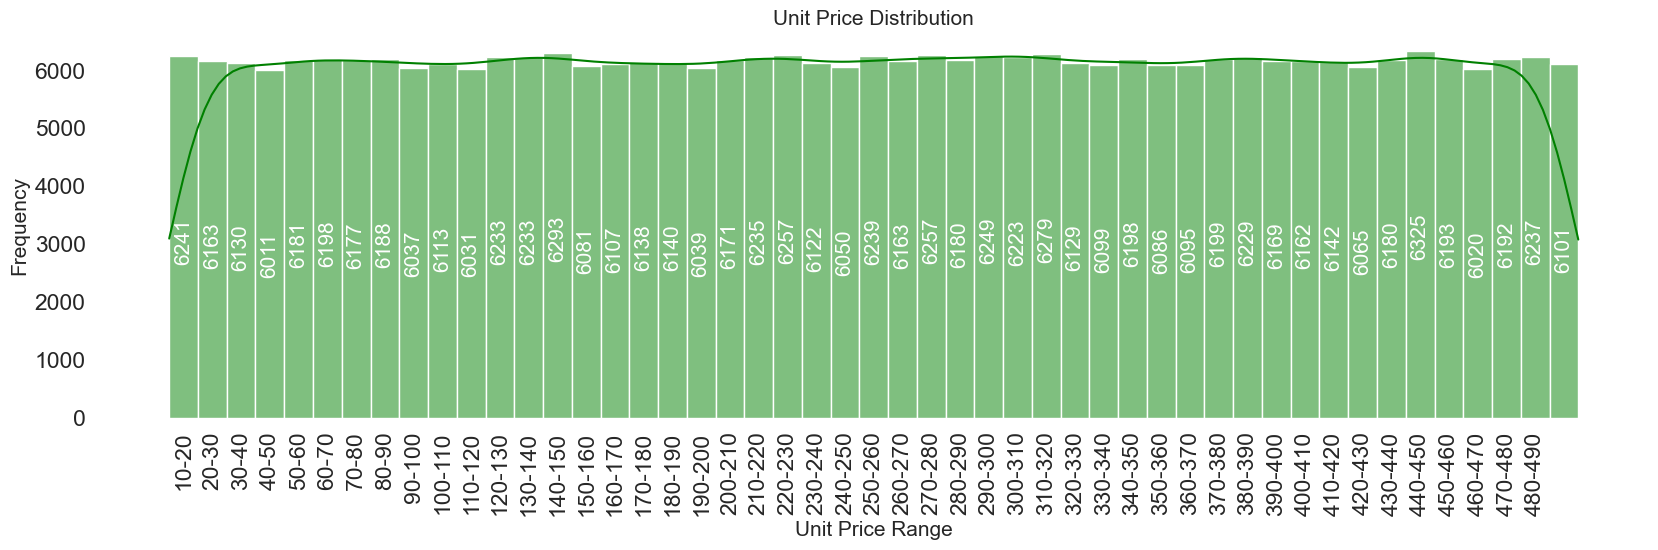

In [15]:
bins = np.arange(int(min(clean_df['Unit_Price'])),int(max(clean_df['Unit_Price'])), 10)
sns.set_theme(font_scale =1.5)
sns.set_style("white")
fig, ax = plt.subplots(figsize = (20, 5))
sns.histplot(data=clean_df, x='Unit_Price',  binrange=[10, 500], bins=bins, binwidth=10, color='green', kde=True)
plt.title('Unit Price Distribution', fontsize = 15)
bin_midpoints = bins[:-1] + (bins[1] - bins[0]) / 2
plt.xticks(bin_midpoints, [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)])
ax.tick_params(axis='x', labelrotation = 90)
ax.set_xlabel('Unit Price Range', fontsize=15)
ax.set_ylabel("Frequency", fontsize=15)
sns.despine(bottom = True, left = True)
for i in ax.containers:
    ax.bar_label(i,  padding=-150, fmt='%d', color = 'white', rotation = 90,  fontsize = 15)
plt.show()

*2-Country Distribution*

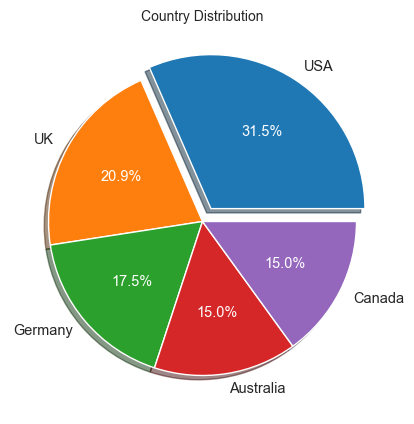

In [16]:
sns.set_theme(font_scale = 1.5)
fig, ax = plt.subplots(figsize = (5, 5))
_,_, autotexts =ax.pie(clean_df['Country'].value_counts(), labels=clean_df['Country'].value_counts().index, autopct='%2.1f%%', textprops={'size': 'xx-small'}, colors=sns.color_palette('tab10'), explode = [0.1, 0, 0, 0, 0], shadow=True)
for ins in autotexts:
    ins.set_color('white')
plt.title('Country Distribution', fontsize = 10)
plt.show()

*3-Gender Distribution*

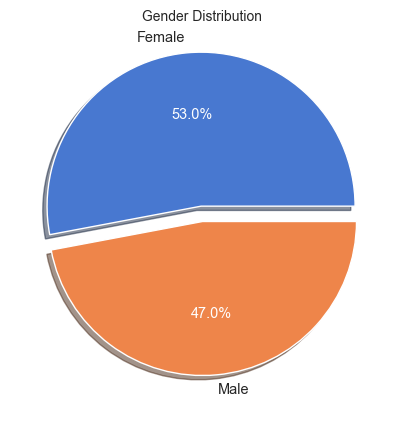

In [17]:
sns.set_theme(font_scale = 1.5)
fig, ax = plt.subplots(figsize = (5, 5))
_,_, autotexts = ax.pie(clean_df['Gender'].value_counts(),  labels=clean_df['Gender'].value_counts().index, autopct='%2.1f%%', textprops={'size': 'xx-small'}, colors=sns.color_palette('muted'), explode = [0.1, 0], shadow=True)
for ins in autotexts:
    ins.set_color('white')
plt.title('Gender Distribution', fontsize = 10)
plt.show()

*4-Order Status Distribution*

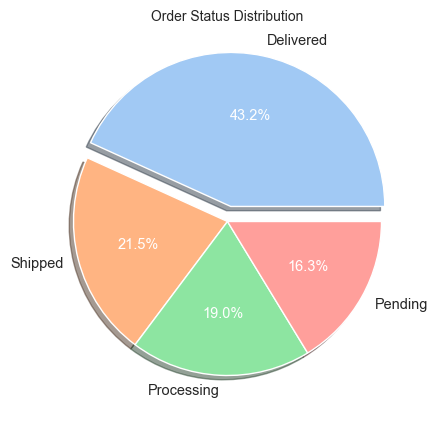

In [18]:
sns.set_theme(font_scale = 1.5)
fig, ax = plt.subplots(figsize = (5, 5))
_,_, autotexts = ax.pie(clean_df['Order_Status'].value_counts(),  labels=clean_df['Order_Status'].value_counts().index, autopct='%2.1f%%', textprops={'size': 'xx-small'}, colors=sns.color_palette('pastel'), explode = [0.1, 0, 0, 0], shadow=True)

for ins in autotexts:
    ins.set_color('white')
plt.title('Order Status Distribution', fontsize = 10)
plt.show()

*5- Product Category Distribution*

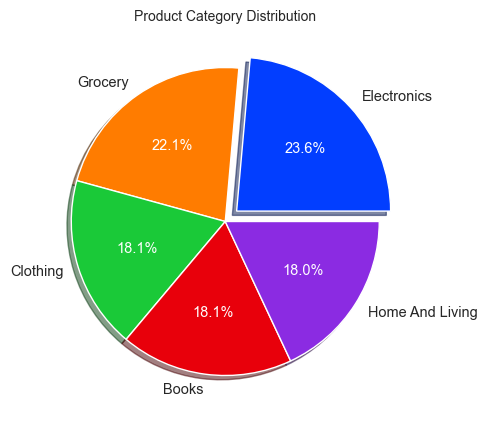

In [19]:
sns.set_theme(font_scale = 1.5)
fig, ax = plt.subplots(figsize = (5, 5))
_, _, autotexts = ax.pie(clean_df['Product_Category'].value_counts(), labels=clean_df['Product_Category'].value_counts().index, autopct='%2.1f%%', textprops={'size': 'xx-small'}, colors=sns.color_palette('bright'), explode = [0.1, 0, 0, 0, 0], shadow=True)
for ins in autotexts:
    ins.set_color('white')
plt.title('Product Category Distribution', fontsize = 10)
plt.show()

*6 - Ratings Disrubution*

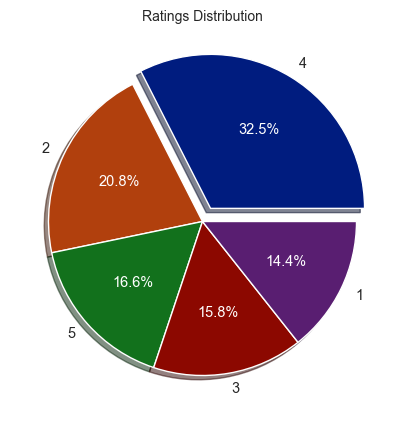

In [20]:
sns.set_theme(font_scale = 1.5)
fig, ax = plt.subplots(figsize = (5, 5))
_, _, autotexts = ax.pie(clean_df['Ratings'].value_counts(),  labels=clean_df['Ratings'].value_counts().index, autopct='%2.1f%%', textprops={'size': 'xx-small'}, colors=sns.color_palette('dark'), explode = [0.1, 0, 0, 0, 0], shadow=True)

for ins in autotexts:
    ins.set_color('white')

plt.title('Ratings Distribution', fontsize = 10)
plt.show()

*7- Count Of Each Age Group*

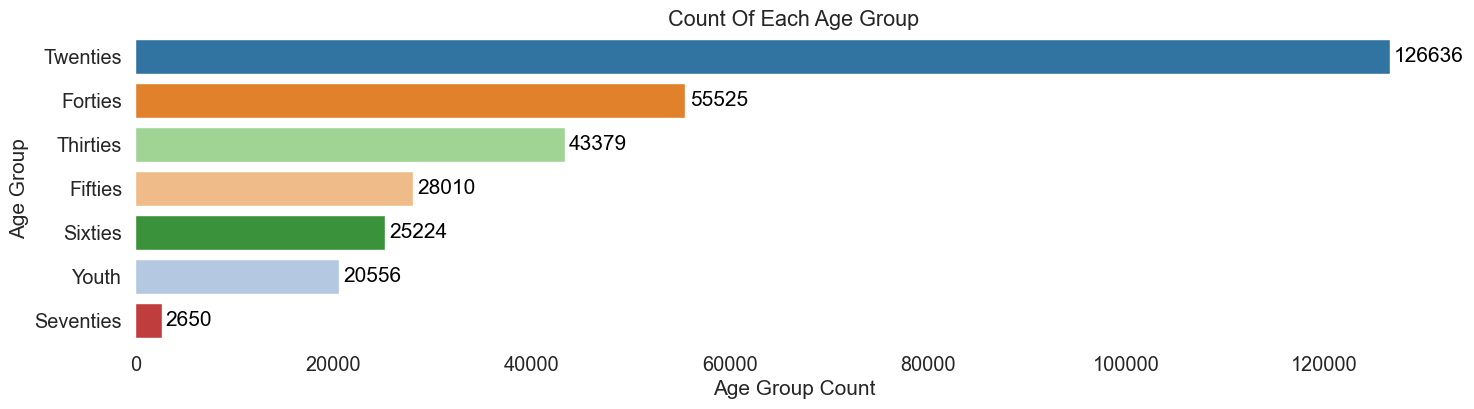

In [21]:
sns.set_theme(font_scale=1.3)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (17, 4))
sns.countplot(data=clean_df, y='Age_Group', hue='Age_Group', ax=ax, palette = sns.color_palette('tab20',7), order=clean_df['Age_Group'].value_counts(ascending = False).index)
ax.set_xlabel('Age Group Count', fontsize=15)
ax.set_ylabel("Age Group", fontsize=15)
for i in ax.containers:
    ax.bar_label(i,  padding=3, fmt='%d', color = 'black', fontsize = 15)
sns.despine(bottom = True, left = True)
ax.set_title('Count Of Each Age Group');

**B- Bivariate Analysis**

*1- Preferred Payment Method By Country*

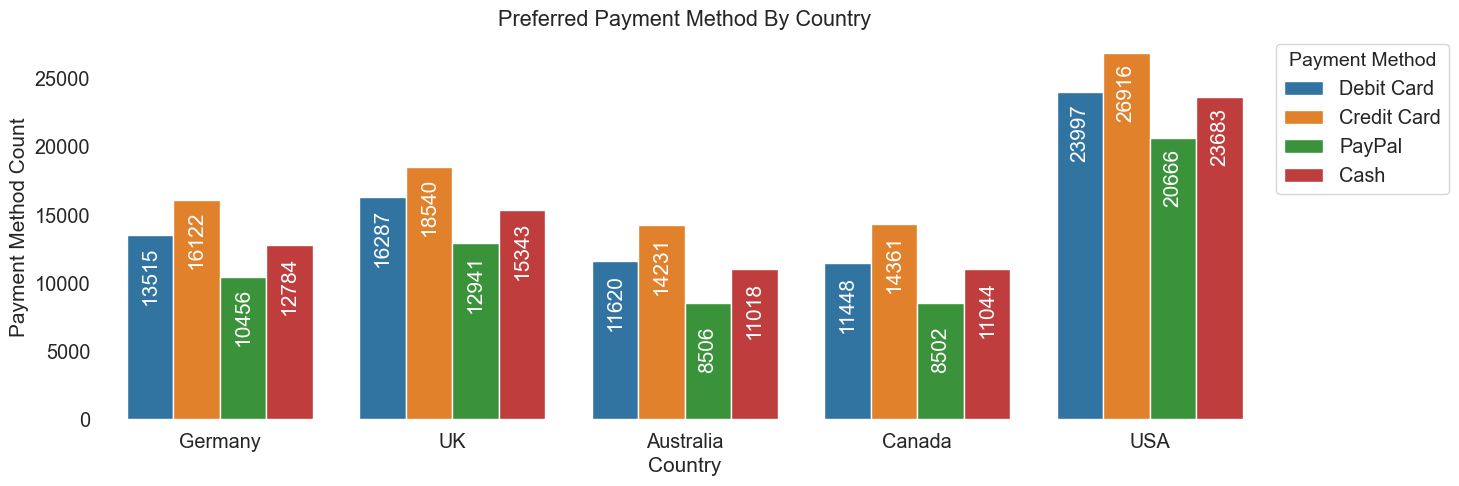

In [22]:
sns.set_theme(font_scale=1.3)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(data=clean_df, hue='Payment_Method', x='Country', ax=ax, palette = sns.color_palette('tab10'))
plt.legend(title='Payment Method', fontsize='14', title_fontsize='14')
ax.set_xlabel('Country', fontsize=15)
ax.set_ylabel("Payment Method Count", fontsize=15)
for i in ax.containers:
     ax.bar_label(i,  padding=-50, fmt='%d', color = 'white', fontsize = 15, rotation = 90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine(bottom = True, left = True)
ax.set_title('Preferred Payment Method By Country');

*2- Preferred Product Category Of Each Country*

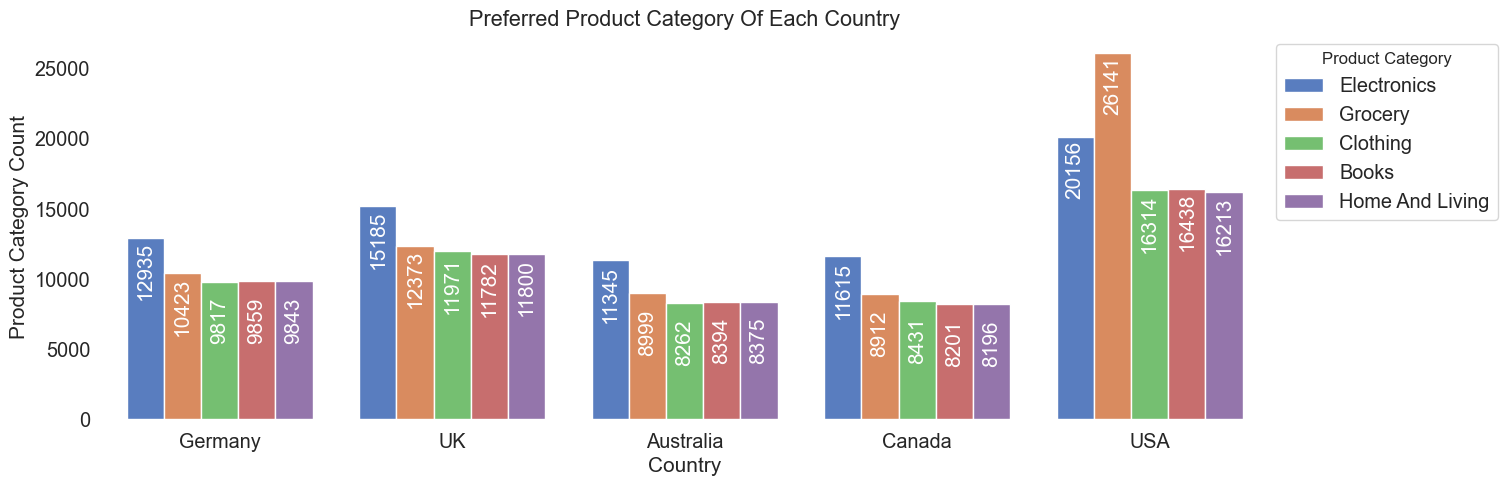

In [23]:
sns.set_theme(font_scale=1.3)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(data=clean_df, hue='Product_Category', x='Country', ax=ax, palette = sns.color_palette('muted'), hue_order=clean_df['Product_Category'].value_counts().index)
plt.legend(title='Product Category', fontsize='12', title_fontsize='12')
ax.set_xlabel('Country', fontsize=15)
ax.set_ylabel("Product Category Count", fontsize=15)
for i in ax.containers:
    ax.bar_label(i,  padding=-45, fmt='%d', color = 'white', rotation = 90,  fontsize = 15)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine(bottom = True, left = True)
ax.set_title('Preferred Product Category Of Each Country');

*3- Customer Segment Count By Country*

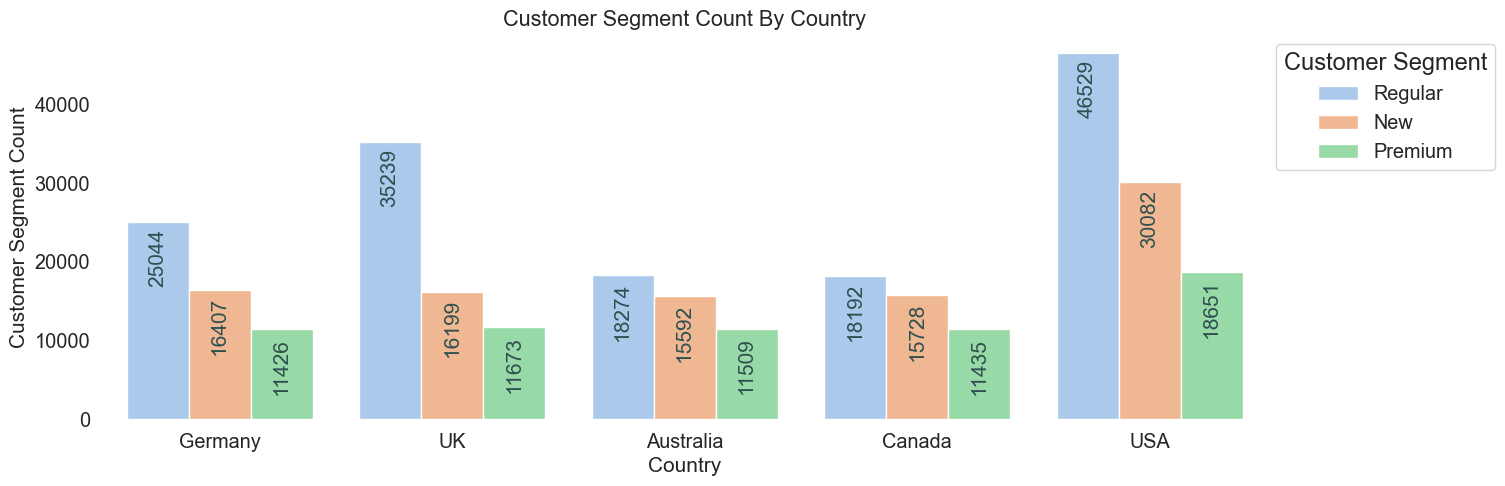

In [24]:
sns.set_theme(font_scale=1.3)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(data=clean_df, hue='Customer_Segment', x='Country', ax=ax, palette = sns.color_palette('pastel'), hue_order=clean_df['Customer_Segment'].value_counts().index)
plt.legend(title='Customer Segment', fontsize=17, title_fontsize=17)
ax.set_xlabel('Country', fontsize=15)
ax.set_ylabel("Customer Segment Count", fontsize=15)
for i in ax.containers:
    ax.bar_label(i,  padding=-47, fmt='%d', color = 'DarkSlateGray', rotation = 90, fontsize=15)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine(bottom = True, left = True)
ax.set_title('Customer Segment Count By Country');

*4- Count Of Income Level  By Country*

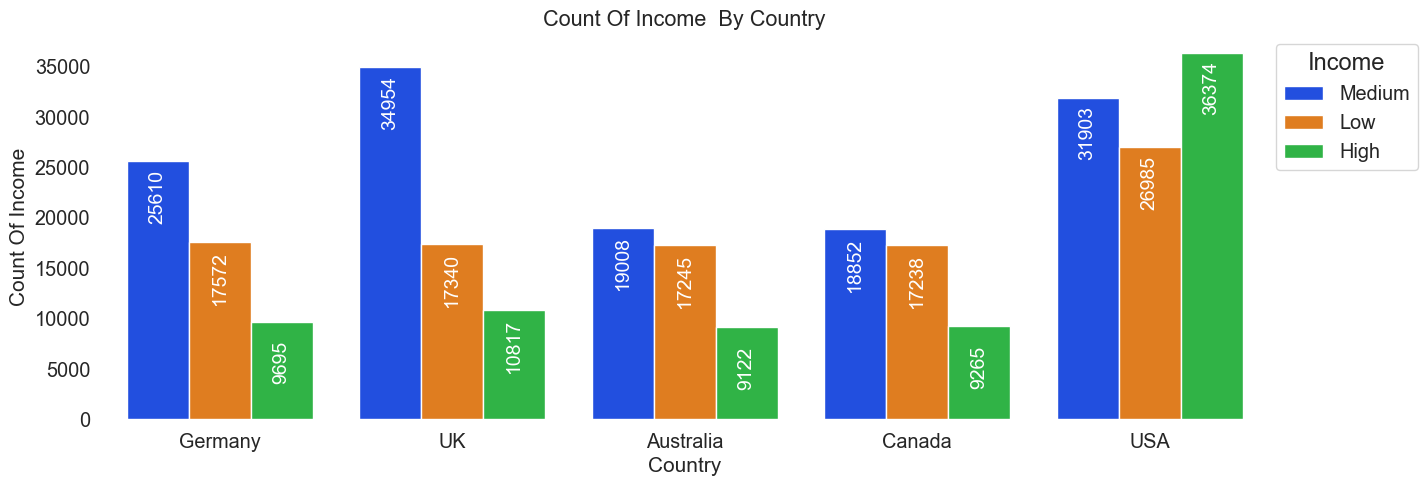

In [25]:
sns.set_theme(font_scale=1.3)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(data=clean_df, hue='Income', x='Country', ax=ax, palette = sns.color_palette('bright'), hue_order=clean_df['Income'].value_counts().index)
plt.legend(title='Income', fontsize=17, title_fontsize=17)
ax.set_xlabel('Country', fontsize=15)
ax.set_ylabel("Count Of Income", fontsize=15)
for i in ax.containers:
    ax.bar_label(i,  padding=-45, fmt='%d', color = 'white', fontsize = 14, rotation = 90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine(bottom = True, left = True)
ax.set_title('Count Of Income  By Country');

*5- Total Amount Spent By Country*

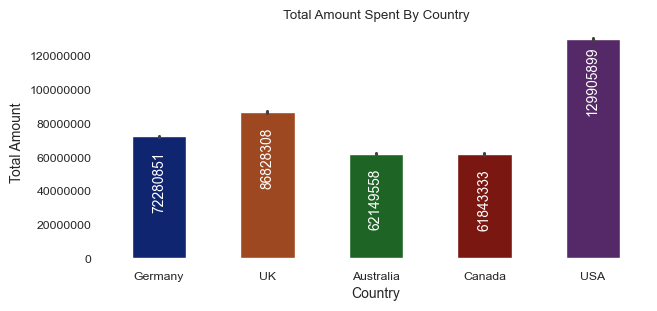

In [26]:
sns.set_theme(font_scale=0.8)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (7, 3))
sns.barplot(data=clean_df,  y = 'Total_Amount', x='Country', hue='Country', ax=ax, palette = sns.color_palette('dark'), estimator='sum', width=0.5)
ax.ticklabel_format(axis='y', style='plain')
ax.set_xlabel('Country', fontsize=10)
ax.set_ylabel("Total Amount", fontsize=10)
for i in ax.containers:
    ax.bar_label(i,  padding=-55, fmt='%d', color = 'white', rotation = 90, fontsize = 10)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True)
ax.set_title('Total Amount Spent By Country');

*6- Count of Each Rating Value by Country*

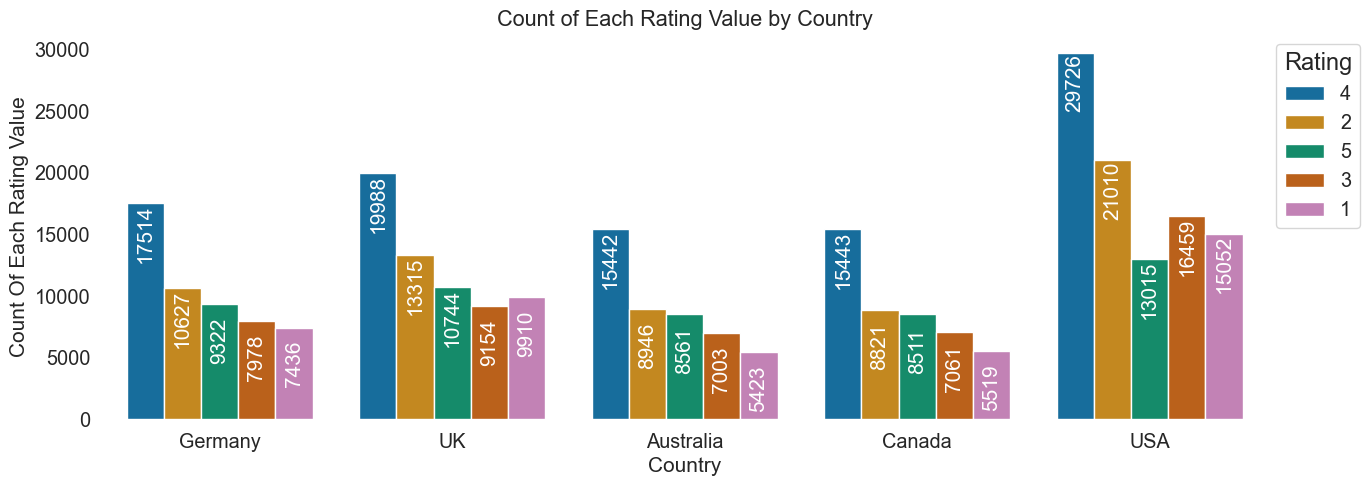

In [27]:
sns.set_theme(font_scale=1.3)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(data=clean_df, hue='Ratings', x='Country', ax=ax, palette = sns.color_palette('colorblind'), hue_order=clean_df['Ratings'].value_counts().index)
plt.legend(title='Rating', fontsize=17, title_fontsize=17)
ax.set_xlabel('Country', fontsize=15)
ax.set_ylabel("Count Of Each Rating Value", fontsize=15)
for i in ax.containers:
    ax.bar_label(i,  padding=-43, fmt='%d', color = 'white', rotation = 90, fontsize = 15)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine(bottom = True, left = True)
ax.set_title('Count of Each Rating Value by Country');

*7- Preferred Product Type By Product Category*

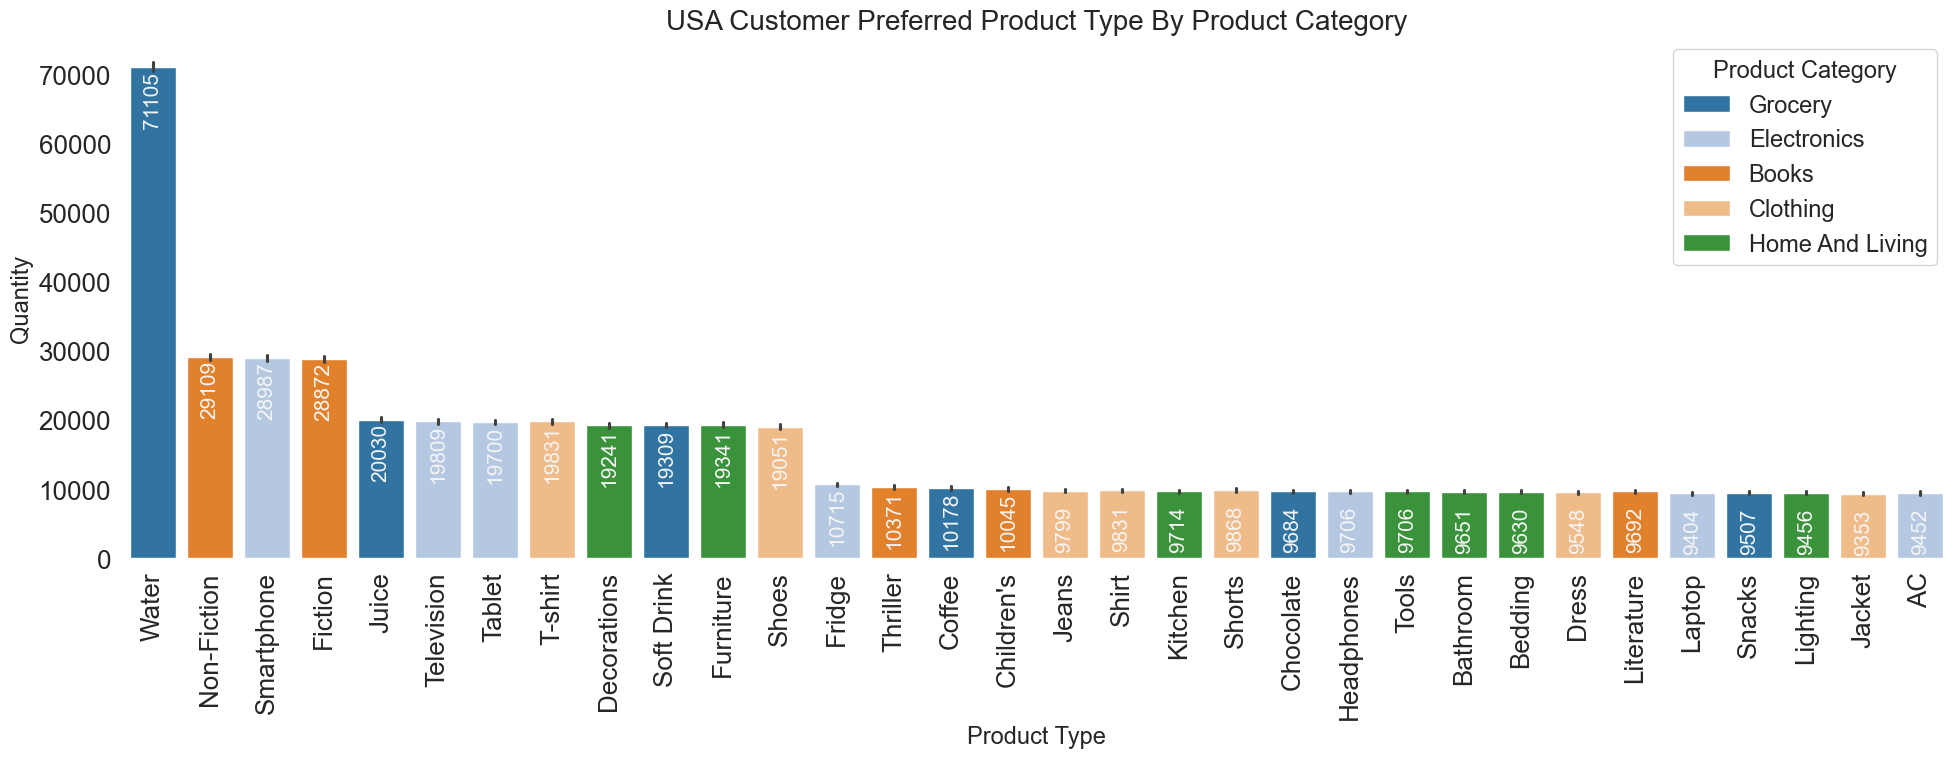

In [28]:
sns.set_theme(font_scale=1.7)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (20, 8))
sns.barplot(data=usa_data, y = 'Quantity',  x='Product_Type', hue='Product_Category', hue_order=usa_data['Product_Category'].value_counts().index, ax=ax, palette = sns.color_palette('tab20'), estimator=sum, orient='v', order=usa_data['Product_Type'].value_counts().index)
plt.legend(title='Product Category', fontsize=17, title_fontsize= 17)
ax.set_xlabel('Product Type', fontsize=17)
ax.set_ylabel("Quantity", fontsize=17)
ax.set_title('USA Customer Preferred Product Type By Product Category', fontsize = 20)
ax.tick_params(axis='x', labelrotation = 90)
sns.despine(bottom = True, left = True)
plt.tight_layout()
for i in ax.containers:
    ax.bar_label(i,  padding=-44, fmt='%d', color = 'whitesmoke', rotation = 90, fontsize = 15)


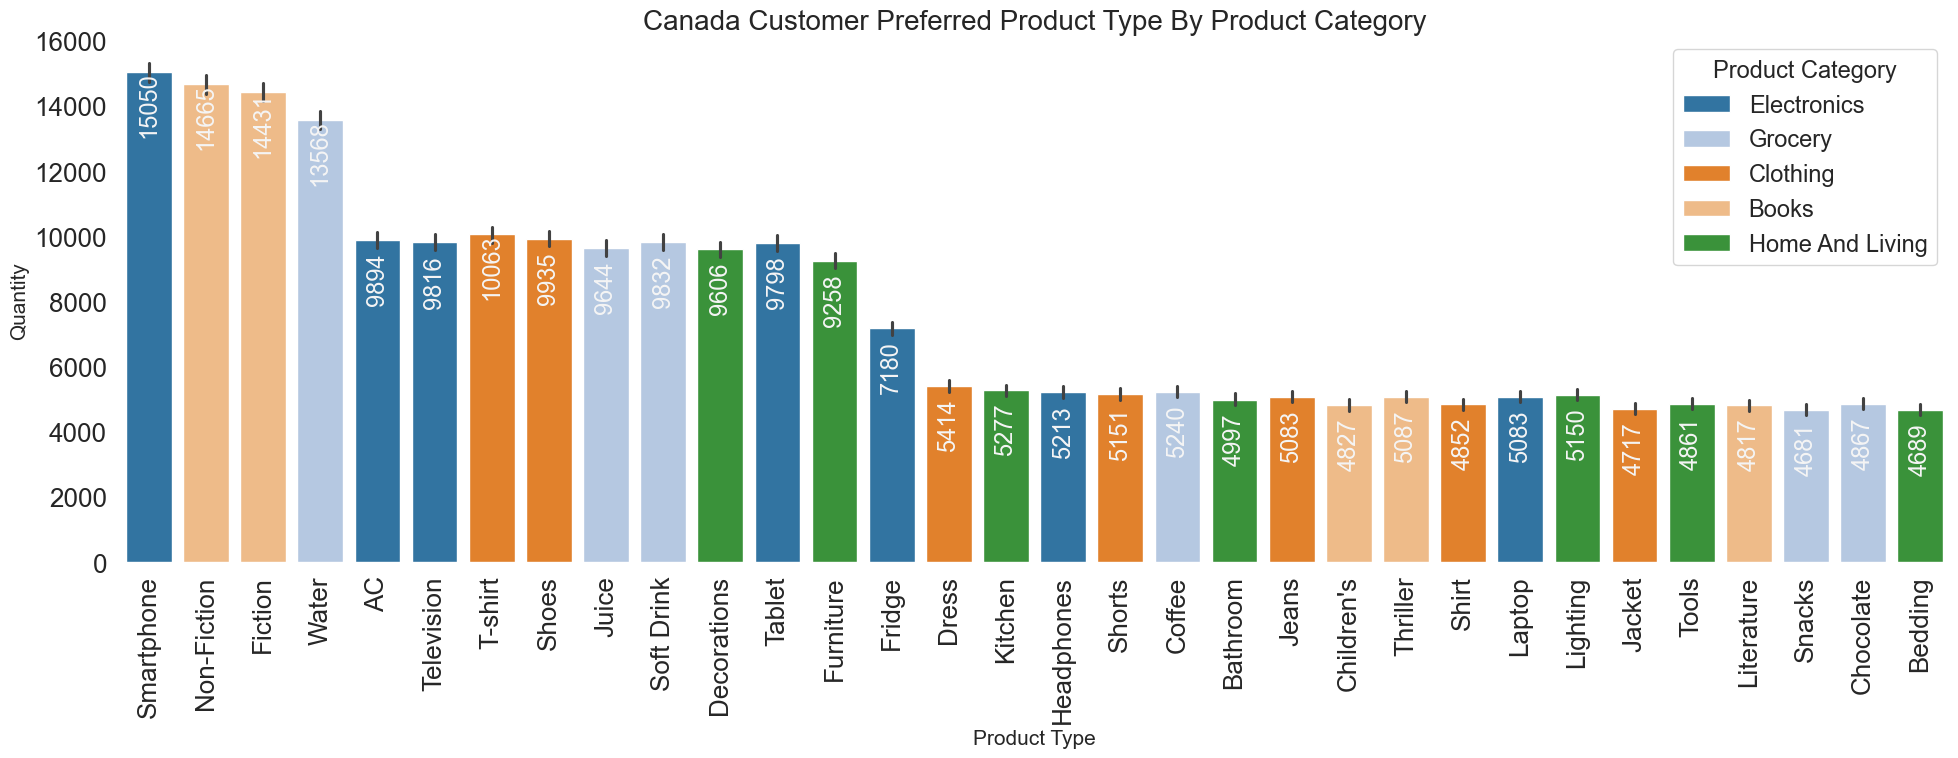

In [29]:
sns.set_theme(font_scale=1.7)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (20, 8))
sns.barplot(data=canada_data, y = 'Quantity',  x='Product_Type', hue='Product_Category', hue_order=canada_data['Product_Category'].value_counts().index, ax=ax, palette = sns.color_palette('tab20'), estimator=sum, orient='v', order=canada_data['Product_Type'].value_counts().index)
plt.legend(title='Product Category', fontsize=17, title_fontsize= 17)
ax.set_xlabel('Product Type', fontsize=15)
ax.set_ylabel("Quantity", fontsize=15)
ax.set_title('Canada Customer Preferred Product Type By Product Category', fontsize = 20)
ax.tick_params(axis='x', labelrotation = 90)
sns.despine(bottom = True, left = True)
plt.tight_layout()
for i in ax.containers:
    ax.bar_label(i,  padding=-47, fmt='%d', color = 'whitesmoke', rotation = 90, fontsize = 17)


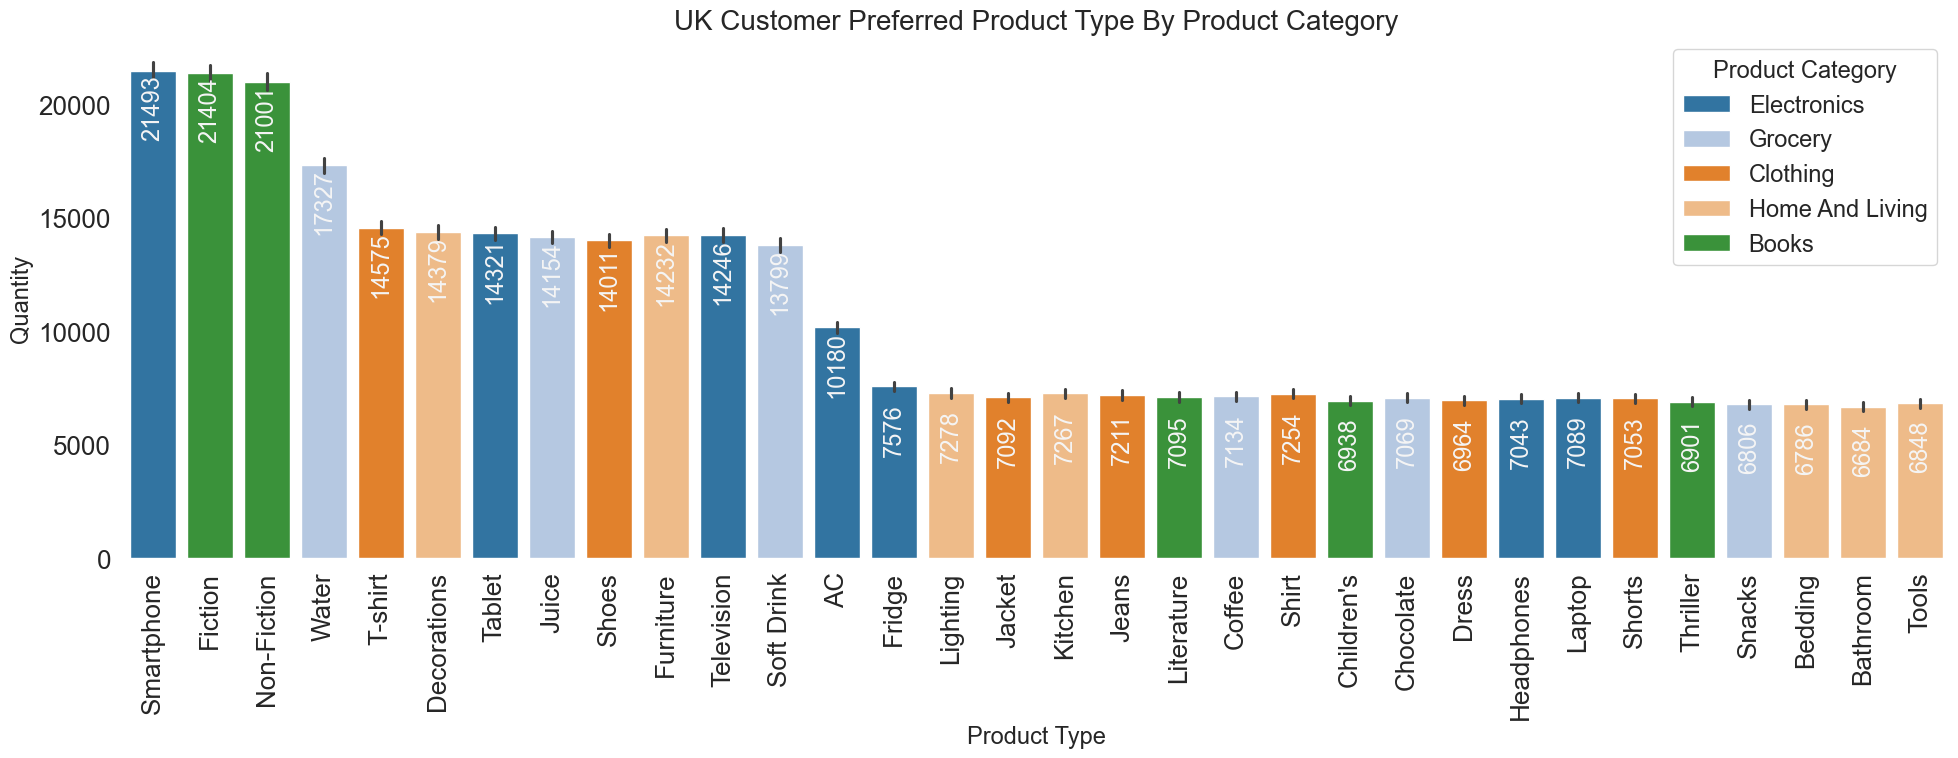

In [30]:
sns.set_theme(font_scale=1.7)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (20, 8))
sns.barplot(data=uk_data, y = 'Quantity',  x='Product_Type', hue='Product_Category', hue_order=uk_data['Product_Category'].value_counts().index, ax=ax, palette = sns.color_palette('tab20'), estimator=sum, orient='v', order=uk_data['Product_Type'].value_counts().index)
plt.legend(title='Product Category', fontsize=17, title_fontsize= 17)
ax.set_xlabel('Product Type', fontsize=17)
ax.set_ylabel("Quantity", fontsize=17)
ax.set_title('UK Customer Preferred Product Type By Product Category', fontsize = 20)
ax.tick_params(axis='x', labelrotation = 90)
sns.despine(bottom = True, left = True)
plt.tight_layout()
for i in ax.containers:
    ax.bar_label(i,  padding=-50, fmt='%d', color = 'whitesmoke', rotation = 90, fontsize = 17)


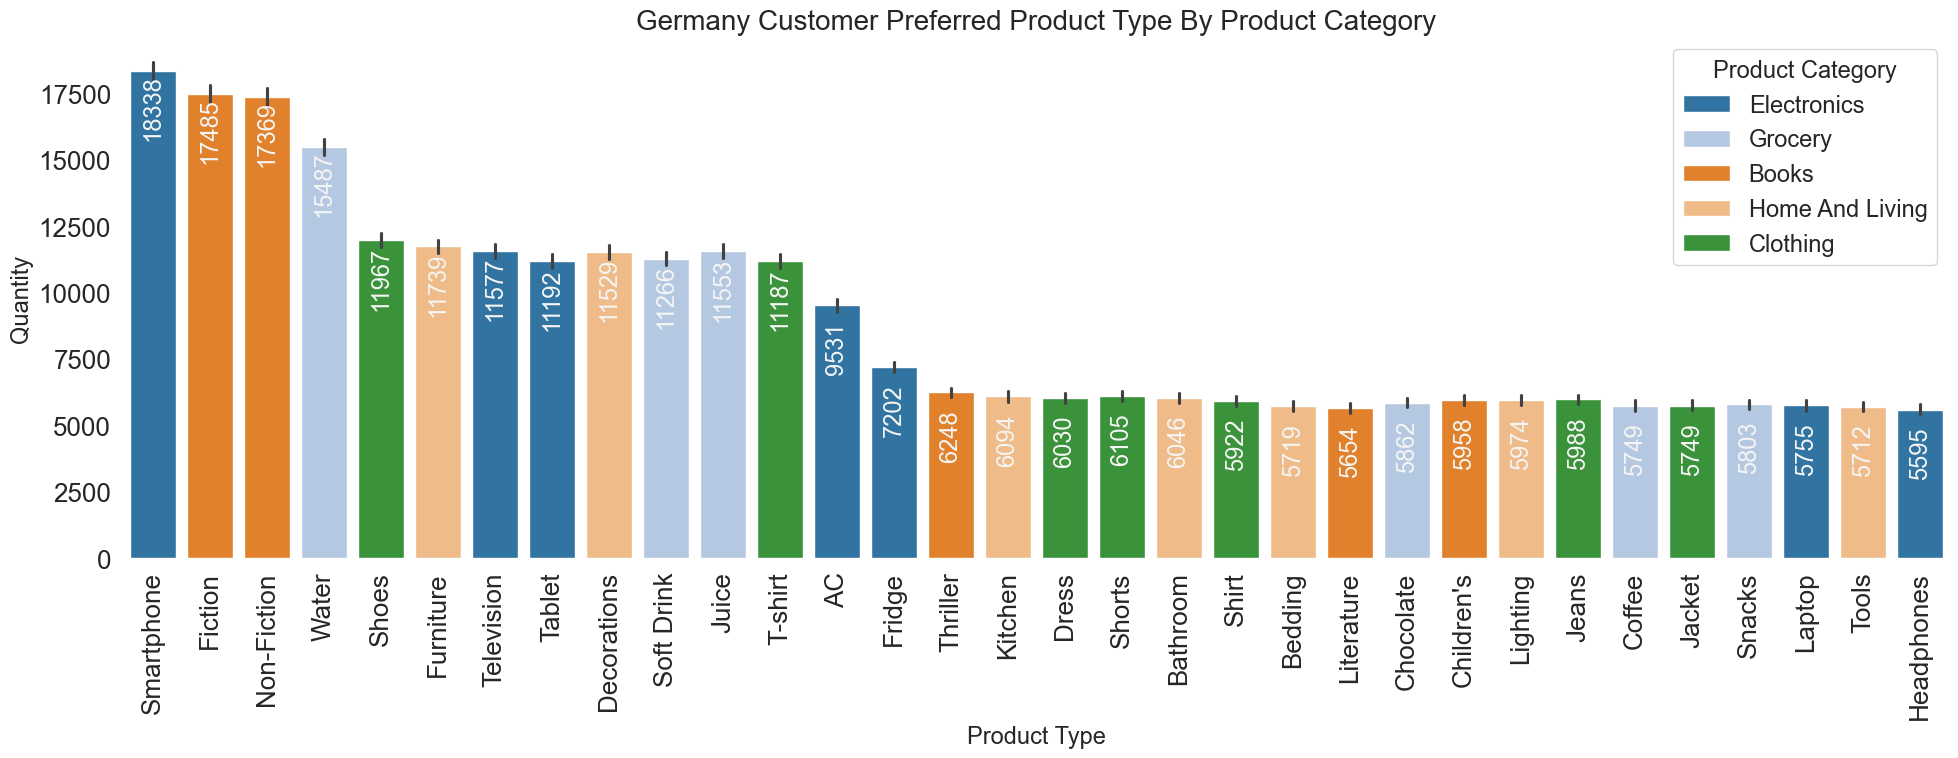

In [31]:
sns.set_theme(font_scale=1.7)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (20, 8))
sns.barplot(data=germany_data, y = 'Quantity',  x='Product_Type', hue='Product_Category', hue_order=germany_data['Product_Category'].value_counts().index, ax=ax, palette = sns.color_palette('tab20'), estimator=sum, orient='v', order=germany_data['Product_Type'].value_counts().index)
plt.legend(title='Product Category', fontsize=17, title_fontsize= 17)
ax.set_xlabel('Product Type', fontsize=17)
ax.set_ylabel("Quantity", fontsize=17)
ax.set_title('Germany Customer Preferred Product Type By Product Category', fontsize = 20)
ax.tick_params(axis='x', labelrotation = 90)
sns.despine(bottom = True, left = True)
plt.tight_layout()
for i in ax.containers:
    ax.bar_label(i,  padding=-50, fmt='%d', color = 'whitesmoke', rotation = 90, fontsize = 17)

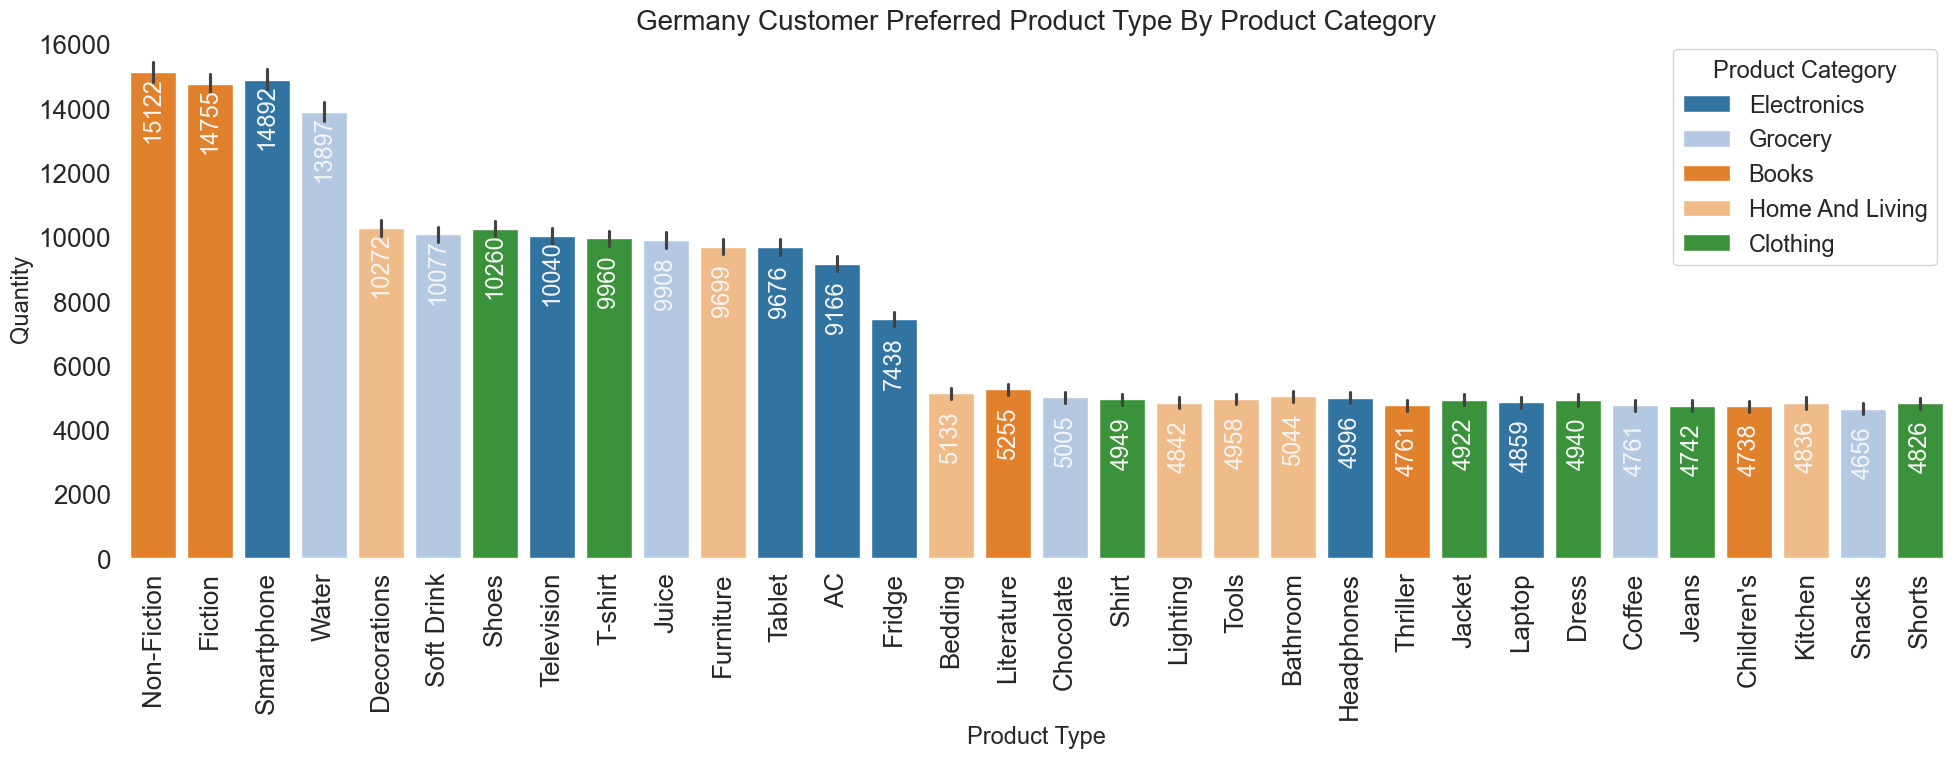

In [32]:
sns.set_theme(font_scale=1.7)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (20, 8))
sns.barplot(data=australia_data, y = 'Quantity',  x='Product_Type', hue='Product_Category', hue_order=australia_data['Product_Category'].value_counts().index, ax=ax, palette = sns.color_palette('tab20'), estimator=sum, orient='v', order=australia_data['Product_Type'].value_counts().index)
plt.legend(title='Product Category', fontsize=17, title_fontsize= 17)
ax.set_xlabel('Product Type', fontsize=17)
ax.set_ylabel("Quantity", fontsize=17)
ax.set_title('Germany Customer Preferred Product Type By Product Category', fontsize = 20)
ax.tick_params(axis='x', labelrotation = 90)
sns.despine(bottom = True, left = True)
plt.tight_layout()
for i in ax.containers:
    ax.bar_label(i,  padding=-50, fmt='%d', color = 'whitesmoke', rotation = 90, fontsize = 17)

*8- Preferred Product Brand By Product Category*

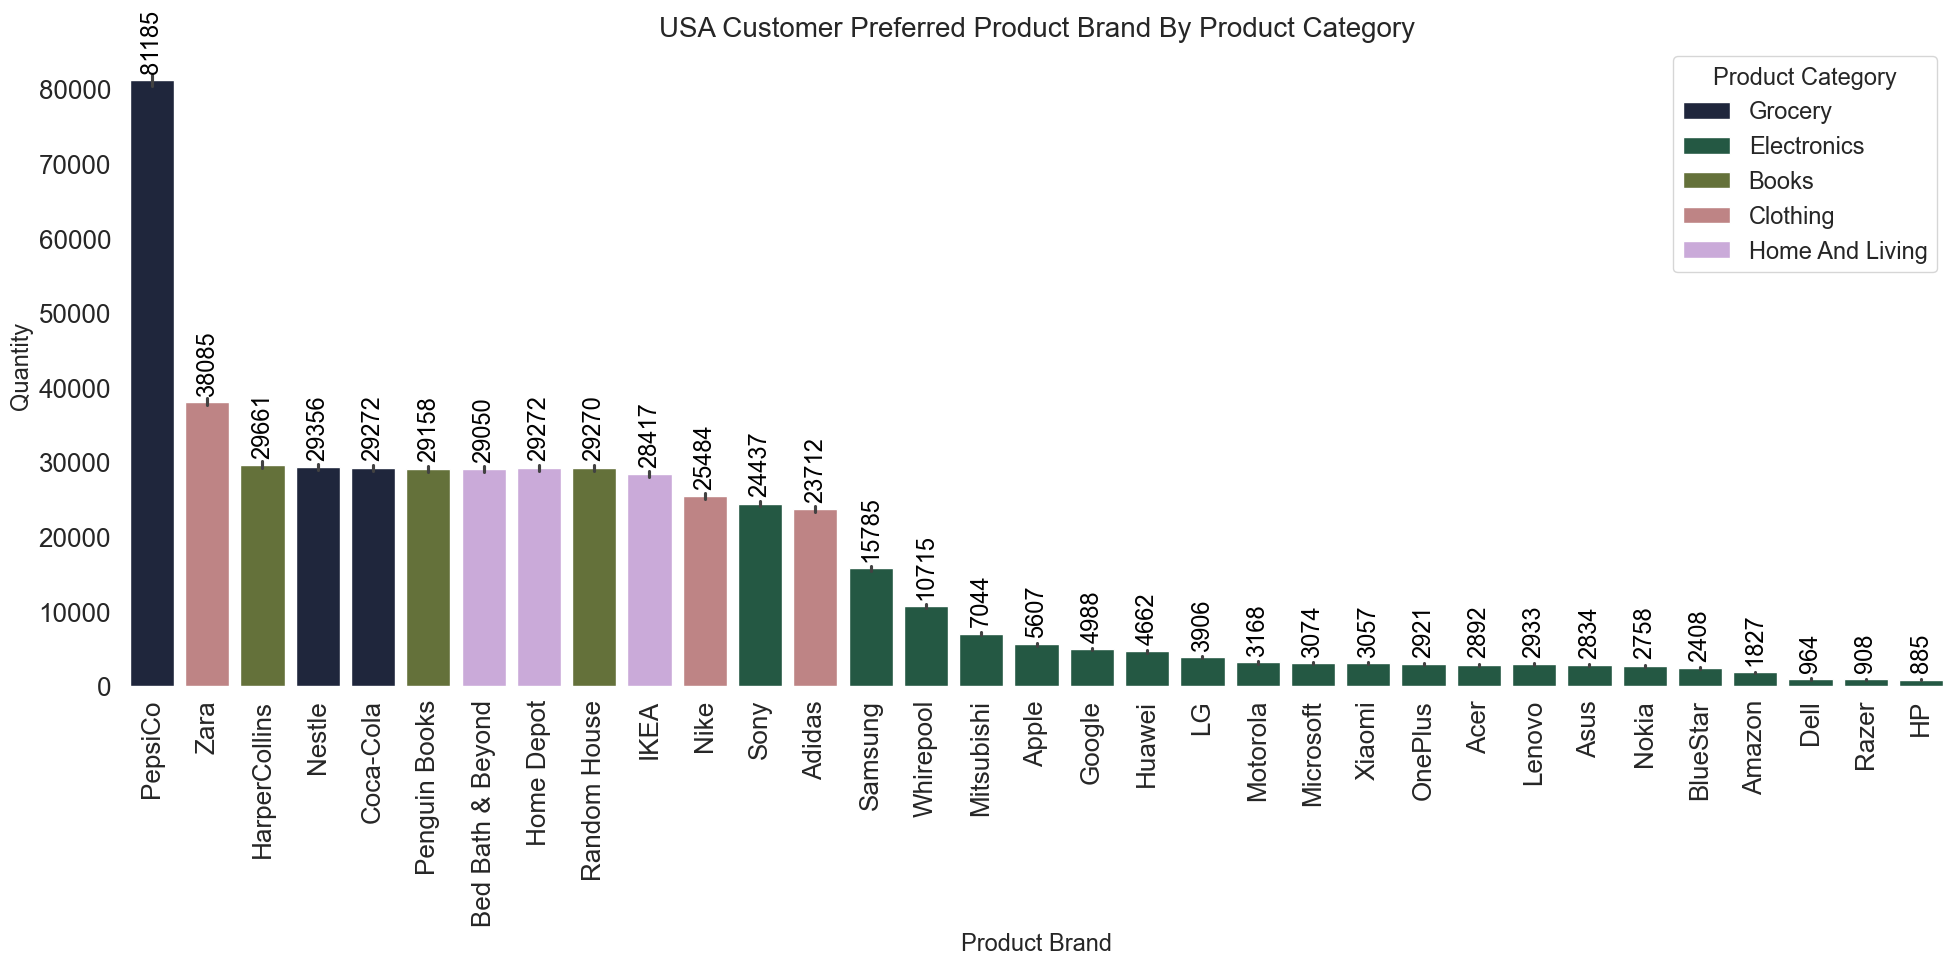

In [33]:
sns.set_theme(font_scale=1.7)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (20, 10))
sns.barplot(data=usa_data, y = 'Quantity',  x='Product_Brand', hue='Product_Category', hue_order=usa_data['Product_Category'].value_counts().index, ax=ax, palette = sns.color_palette('cubehelix'), estimator=sum, orient='v', order=usa_data['Product_Brand'].value_counts().index)
plt.legend(title='Product Category', fontsize=17, title_fontsize= 17)
ax.set_xlabel('Product Brand', fontsize=17)
ax.set_ylabel("Quantity", fontsize=17)
ax.set_title('USA Customer Preferred Product Brand By Product Category', fontsize = 20)
ax.tick_params(axis='x', labelrotation = 90)
sns.despine(bottom = True, left = True)
for i in ax.containers:
    ax.bar_label(i,  padding=5, fmt='%d', color = 'black', rotation = 90, fontsize = 17)
plt.tight_layout()

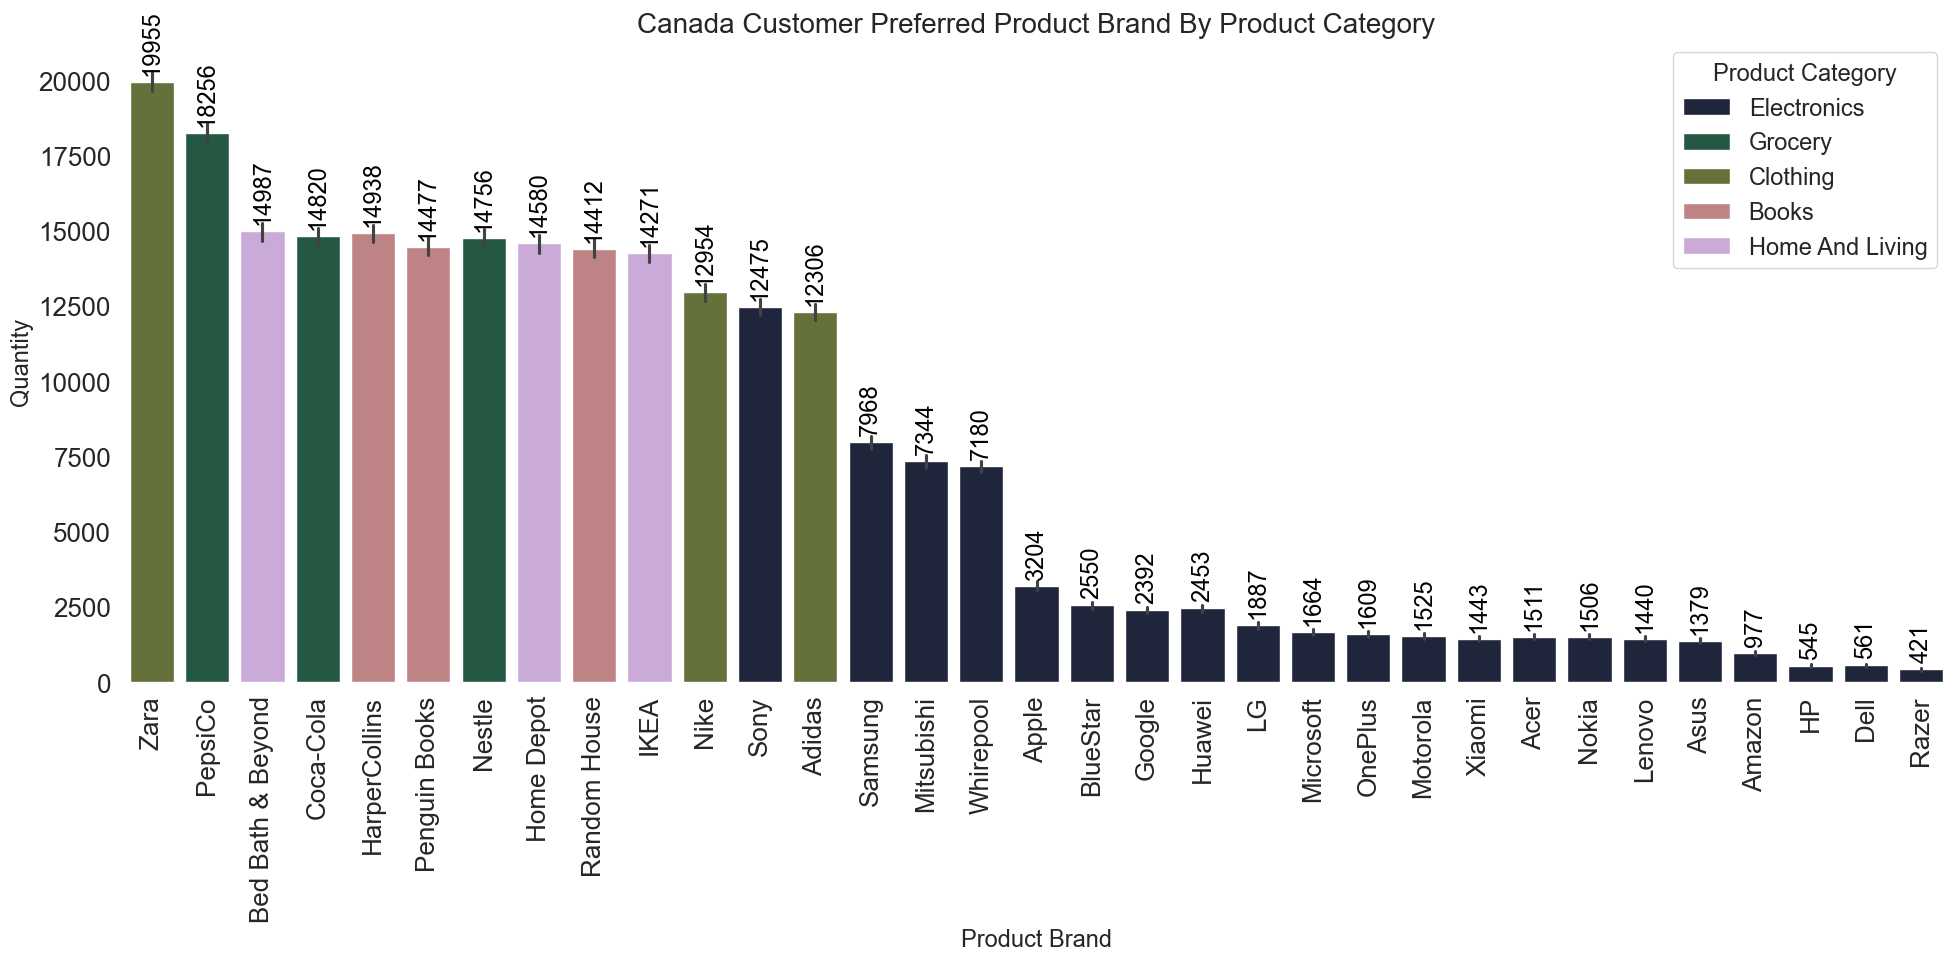

In [34]:
sns.set_theme(font_scale=1.7)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (20, 10))
sns.barplot(data=canada_data, y = 'Quantity',  x='Product_Brand', hue='Product_Category', hue_order=canada_data['Product_Category'].value_counts().index, ax=ax, palette = sns.color_palette('cubehelix'), estimator=sum, orient='v', order=canada_data['Product_Brand'].value_counts().index)
plt.legend(title='Product Category', fontsize=17, title_fontsize= 17)
ax.set_xlabel('Product Brand', fontsize=17)
ax.set_ylabel("Quantity", fontsize=17)
ax.set_title('Canada Customer Preferred Product Brand By Product Category', fontsize = 20)
ax.tick_params(axis='x', labelrotation = 90)
sns.despine(bottom = True, left = True)
for i in ax.containers:
    ax.bar_label(i,  padding=5, fmt='%d', color = 'black', rotation = 90, fontsize = 17)
plt.tight_layout()

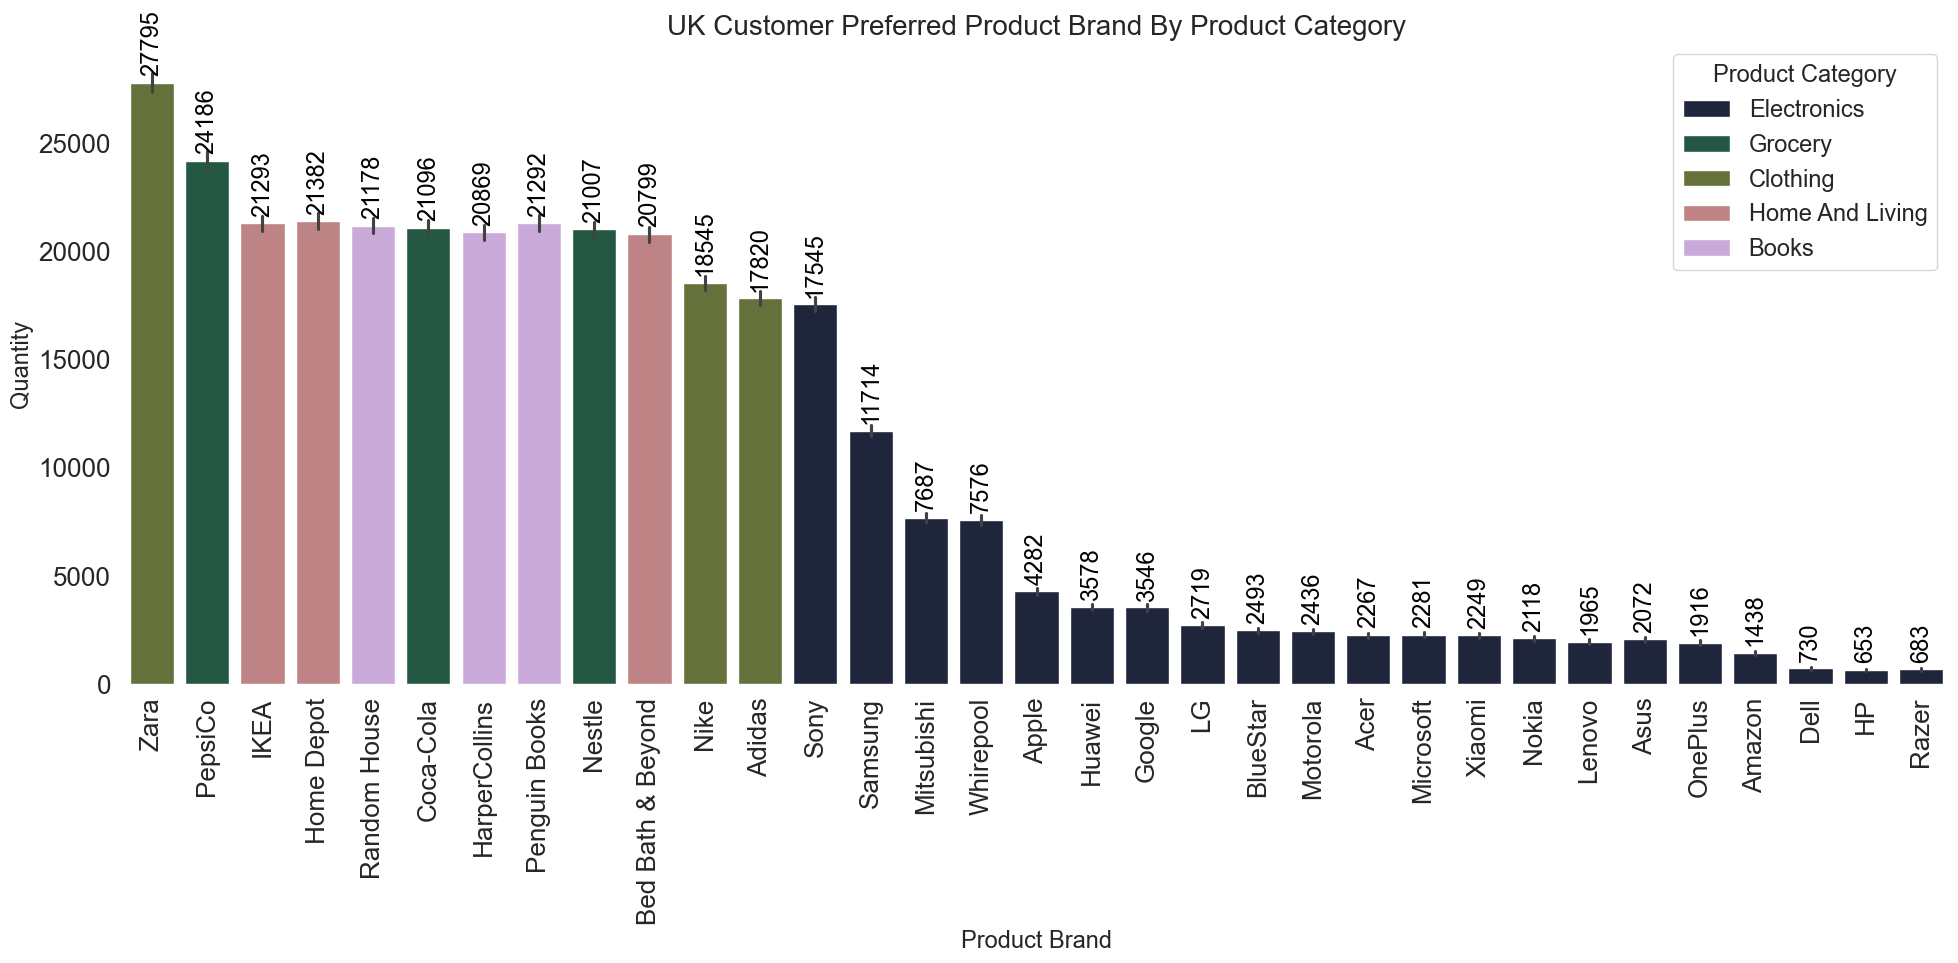

In [35]:
sns.set_theme(font_scale=1.7)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (20, 10))
sns.barplot(data=uk_data, y = 'Quantity',  x='Product_Brand', hue='Product_Category', hue_order=uk_data['Product_Category'].value_counts().index, ax=ax, palette = sns.color_palette('cubehelix'), estimator=sum, orient='v', order=uk_data['Product_Brand'].value_counts().index)
plt.legend(title='Product Category', fontsize=17, title_fontsize= 17)
ax.set_xlabel('Product Brand', fontsize=17)
ax.set_ylabel("Quantity", fontsize=17)
ax.set_title('UK Customer Preferred Product Brand By Product Category', fontsize = 20)
ax.tick_params(axis='x', labelrotation = 90)
sns.despine(bottom = True, left = True)
for i in ax.containers:
    ax.bar_label(i,  padding=5, fmt='%d', color = 'black', rotation = 90, fontsize = 17)
plt.tight_layout()

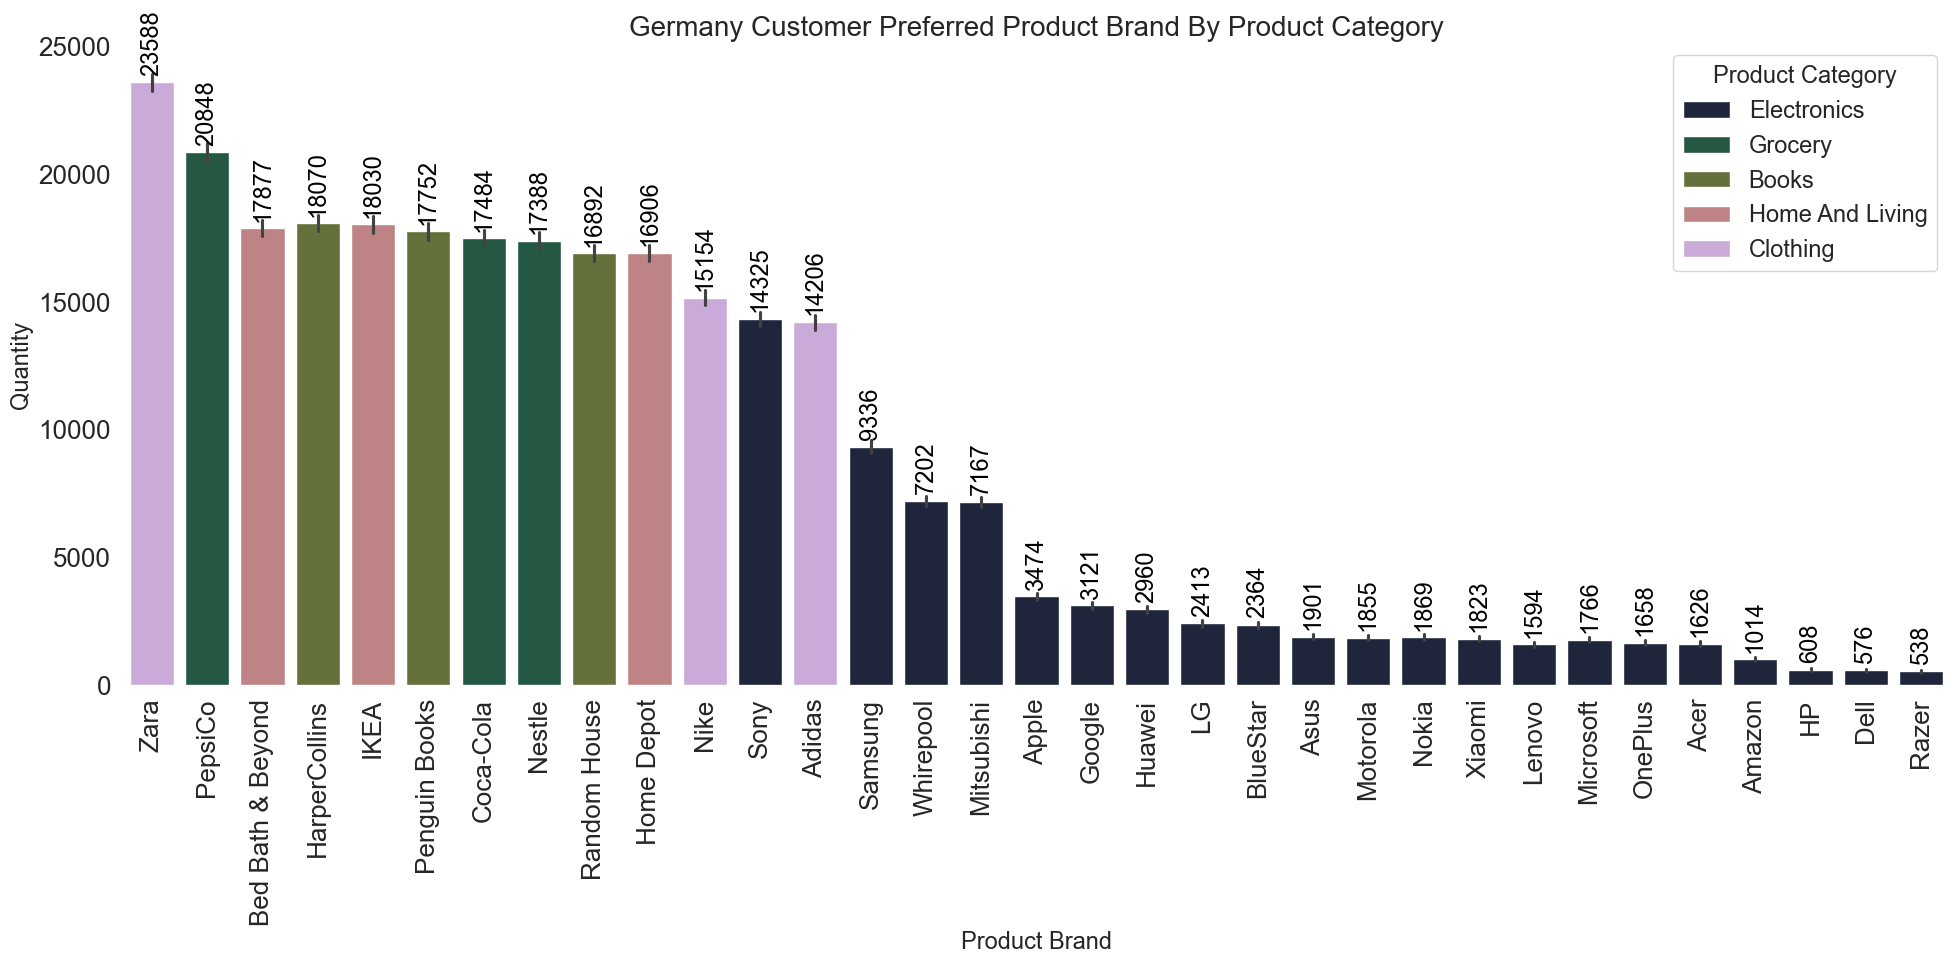

In [36]:
sns.set_theme(font_scale=1.7)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (20, 10))
sns.barplot(data=germany_data, y = 'Quantity',  x='Product_Brand', hue='Product_Category', hue_order=germany_data['Product_Category'].value_counts().index, ax=ax, palette = sns.color_palette('cubehelix'), estimator=sum, orient='v', order=germany_data['Product_Brand'].value_counts().index)
plt.legend(title='Product Category', fontsize=17, title_fontsize= 17)
ax.set_xlabel('Product Brand', fontsize=17)
ax.set_ylabel("Quantity", fontsize=17)
ax.set_title('Germany Customer Preferred Product Brand By Product Category', fontsize = 20)
ax.tick_params(axis='x', labelrotation = 90)
sns.despine(bottom = True, left = True)
for i in ax.containers:
    ax.bar_label(i,  padding=5, fmt='%d', color = 'black', rotation = 90, fontsize = 17)
plt.tight_layout()

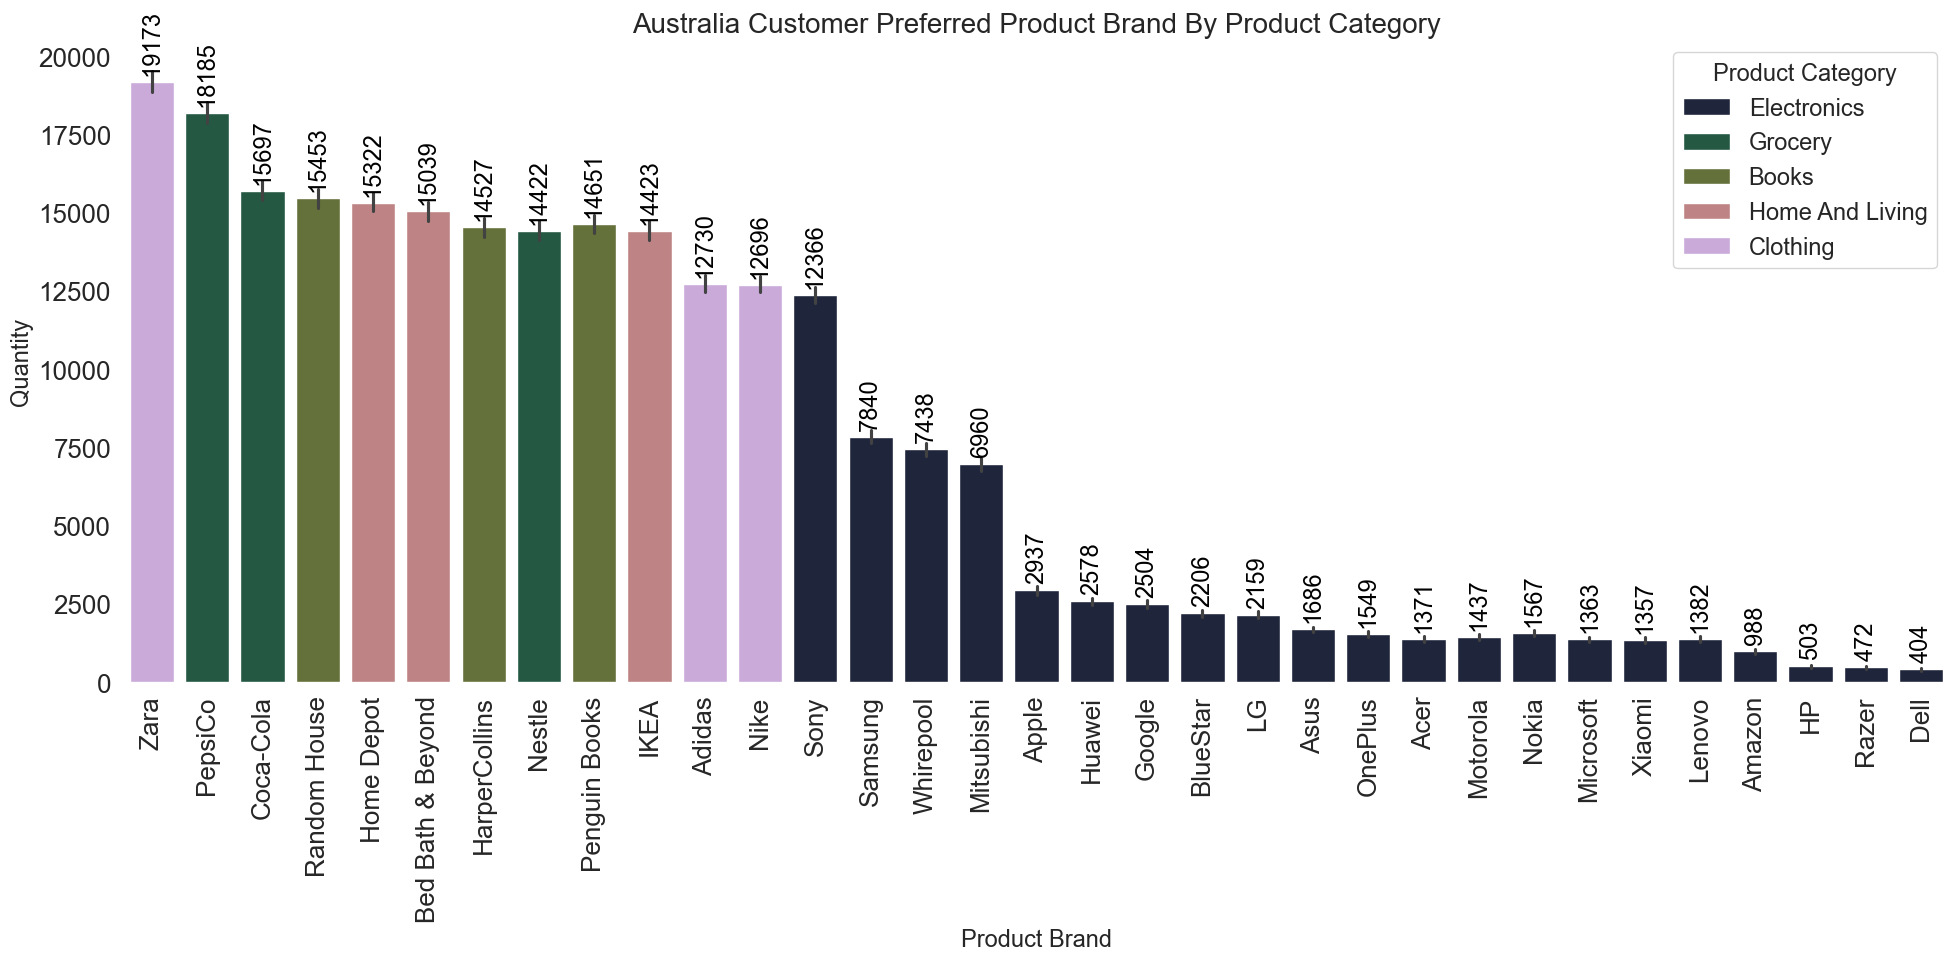

In [37]:
sns.set_theme(font_scale=1.7)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (20, 10))
sns.barplot(data=australia_data, y = 'Quantity',  x='Product_Brand', hue='Product_Category', hue_order=australia_data['Product_Category'].value_counts().index, ax=ax, palette = sns.color_palette('cubehelix'), estimator=sum, orient='v', order=australia_data['Product_Brand'].value_counts().index)
plt.legend(title='Product Category', fontsize=17, title_fontsize= 17)
ax.set_xlabel('Product Brand', fontsize=17)
ax.set_ylabel("Quantity", fontsize=17)
ax.set_title('Australia Customer Preferred Product Brand By Product Category', fontsize = 20)
ax.tick_params(axis='x', labelrotation = 90)
sns.despine(bottom = True, left = True)
for i in ax.containers:
    ax.bar_label(i,  padding=5, fmt='%d', color = 'black', rotation = 90, fontsize = 17)
plt.tight_layout()

*9- Preferred Purchased Day By Age Group*

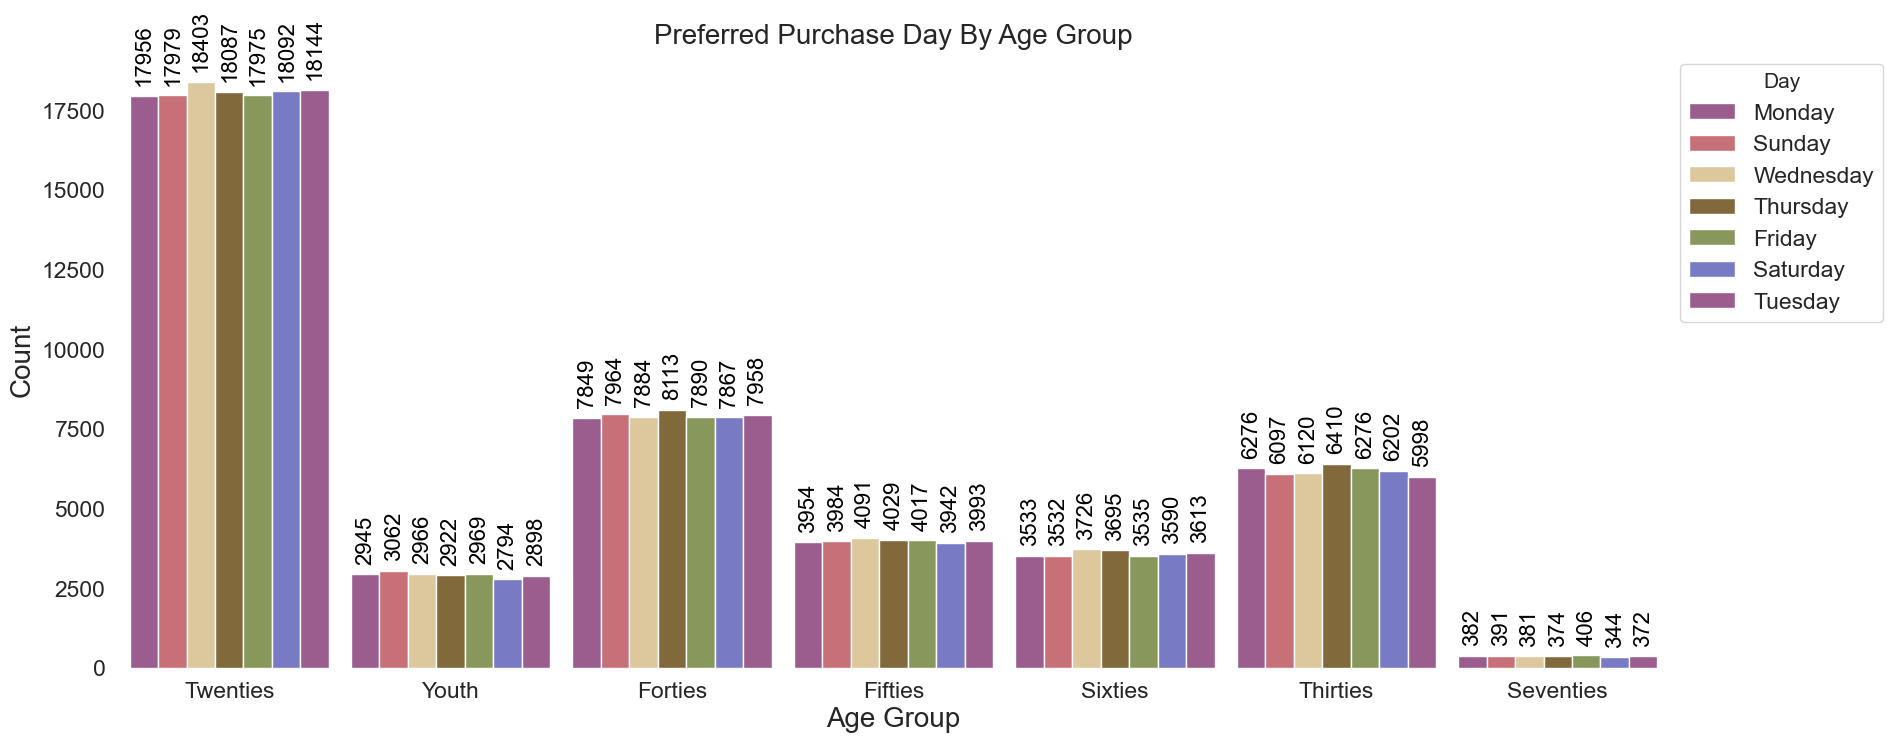

In [38]:
sns.set_theme(font_scale=1.5)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (20, 8))
sns.countplot(data=clean_df, hue='Day', x='Age_Group', ax=ax, palette = sns.color_palette('tab20b_r'), width=0.9)
plt.legend(title='Day', fontsize=15, title_fontsize=15)
ax.set_xlabel('Age Group', fontsize=20)
ax.set_ylabel("Count", fontsize=20)
for i in ax.containers:
     ax.bar_label(i,  padding = 7, fmt='%d', color = 'black', fontsize = 16, rotation = 90)
sns.despine(bottom = True, left = True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('Preferred Purchase Day By Age Group', fontsize = 20);

*10-Preferred Product Category By Age Group*

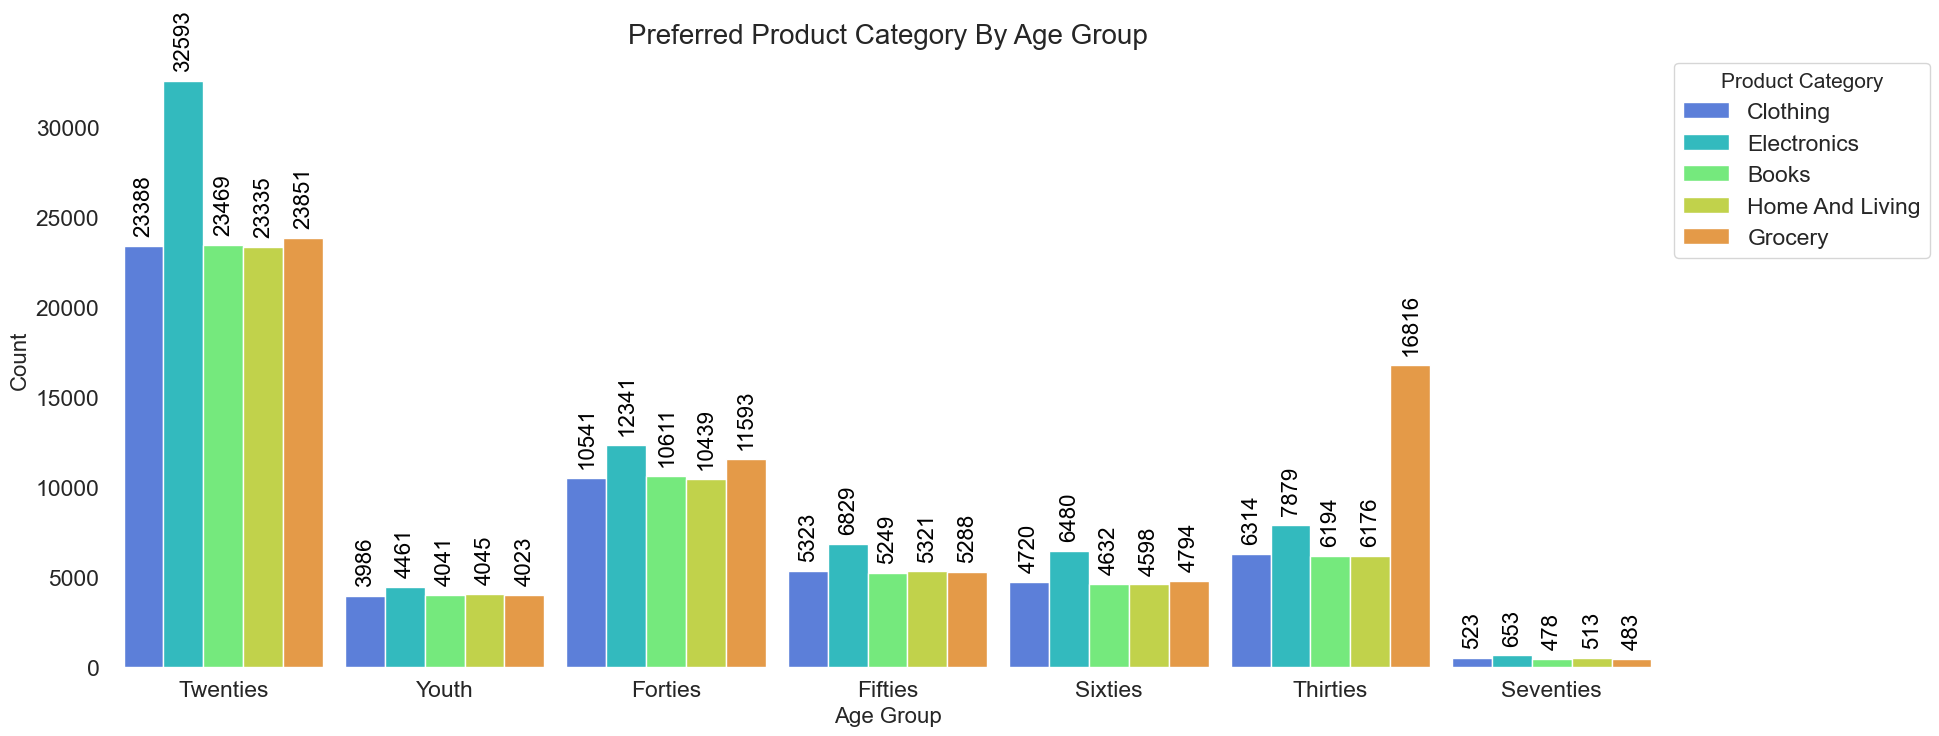

In [39]:
sns.set_theme(font_scale=1.5)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (20, 8))
sns.countplot(data=clean_df, hue='Product_Category', x='Age_Group', ax=ax, palette = sns.color_palette('turbo'), width=0.9)
plt.legend(title='Product Category', fontsize=15, title_fontsize=15)
ax.set_xlabel('Age Group', fontsize=16)
ax.set_ylabel("Count", fontsize=16)
for i in ax.containers:
     ax.bar_label(i,  padding = 7, fmt='%d', color = 'black', fontsize = 16, rotation = 90 )
sns.despine(bottom = True, left = True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('Preferred Product Category By Age Group', fontsize = 20);

**C- Multivariate Analysis**

**a-Chart**

*1- Monthly Total Amount Spent By Country*

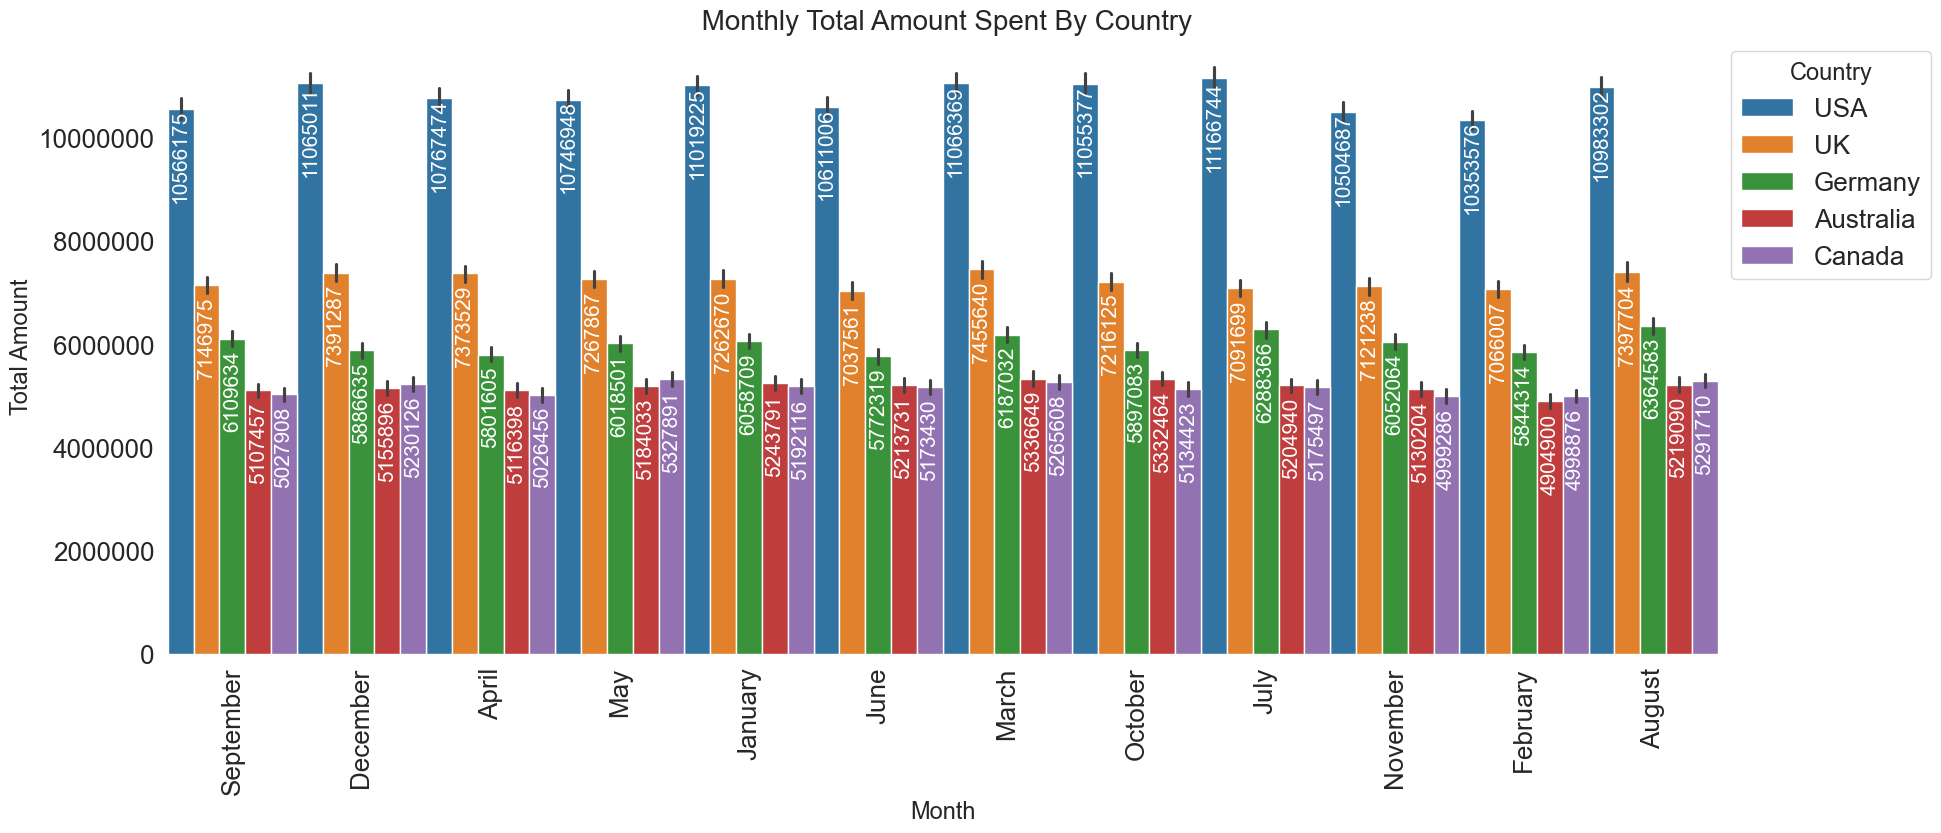

In [40]:
sns.set_theme(font_scale=1.7)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (20, 8))
sns.barplot(data=clean_df, y = 'Total_Amount' , hue='Country', x='Month_Name', ax=ax, palette = sns.color_palette('tab10'), hue_order=clean_df['Country'].value_counts(ascending = False).index, estimator=sum, width=1)
ax.set_xlabel('Month', fontsize=17)
ax.set_ylabel("Total Amount", fontsize=17)
plt.legend(title='Country', fontsize=17, title_fontsize=17)
for i in ax.containers:
    ax.bar_label(i,  padding=-67, fmt='%4d', color = 'white', rotation = 90, fontsize = 15)
ax.set_title(' Monthly Total Amount Spent By Country', fontsize = 20)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine(bottom = True, left = True);

*2- Daily Total Amount Spent By Country*

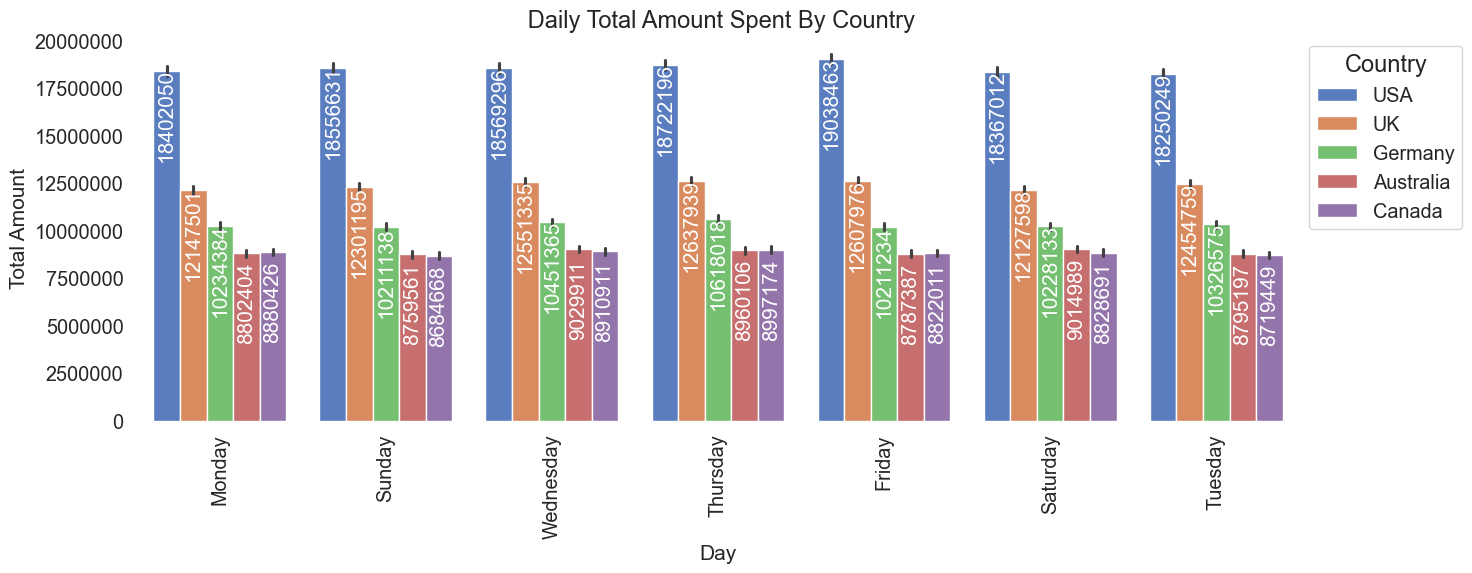

In [41]:
sns.set_theme(font_scale=1.3)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot(data=clean_df, y = 'Total_Amount' , hue='Country', x='Day', ax=ax, palette = sns.color_palette('muted'), hue_order=clean_df['Country'].value_counts(ascending = False).index, estimator=sum)
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel("Total Amount", fontsize=15)
plt.legend(title='Country', fontsize=17, title_fontsize=17)
for i in ax.containers:
    ax.bar_label(i,  padding=-65, fmt='%4d', color = 'white', rotation = 90, fontsize = 15)
ax.set_title(' Daily Total Amount Spent By Country', fontsize = 17)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine(bottom = True, left = True);

*3- Seasonally Total Amount Spent By Country*

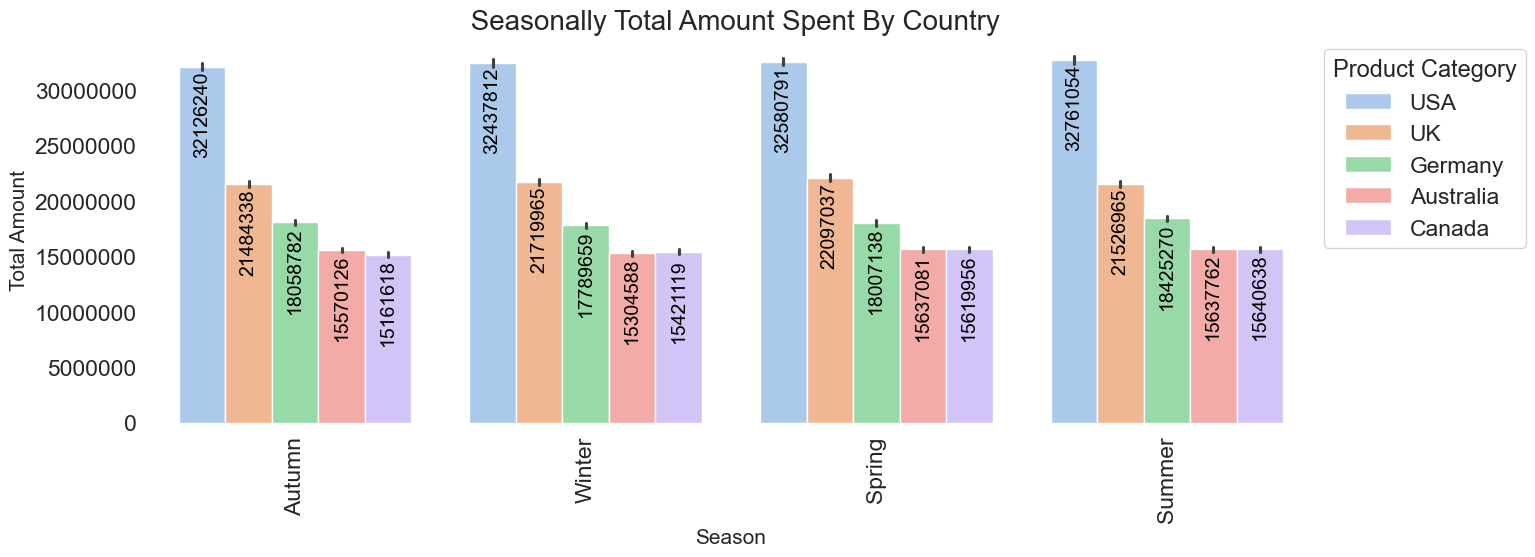

In [42]:
sns.set_theme(font_scale=1.5)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot(data=clean_df, y = 'Total_Amount' , hue='Country', x='Season', ax=ax, palette = sns.color_palette('pastel'), hue_order=clean_df['Country'].value_counts(ascending = False).index, estimator=sum)
ax.set_xlabel('Season', fontsize=15)
ax.set_ylabel("Total Amount", fontsize=15)
plt.legend(title='Product Category', fontsize=17, title_fontsize=17)
for i in ax.containers:
    ax.bar_label(i,  padding=-65, fmt='%4d', color = 'black', rotation = 90, fontsize = 14)
ax.set_title(' Seasonally Total Amount Spent By Country', fontsize = 20)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine(bottom = True, left = True);

*4- Quarterly Total Amount Spent By Country*

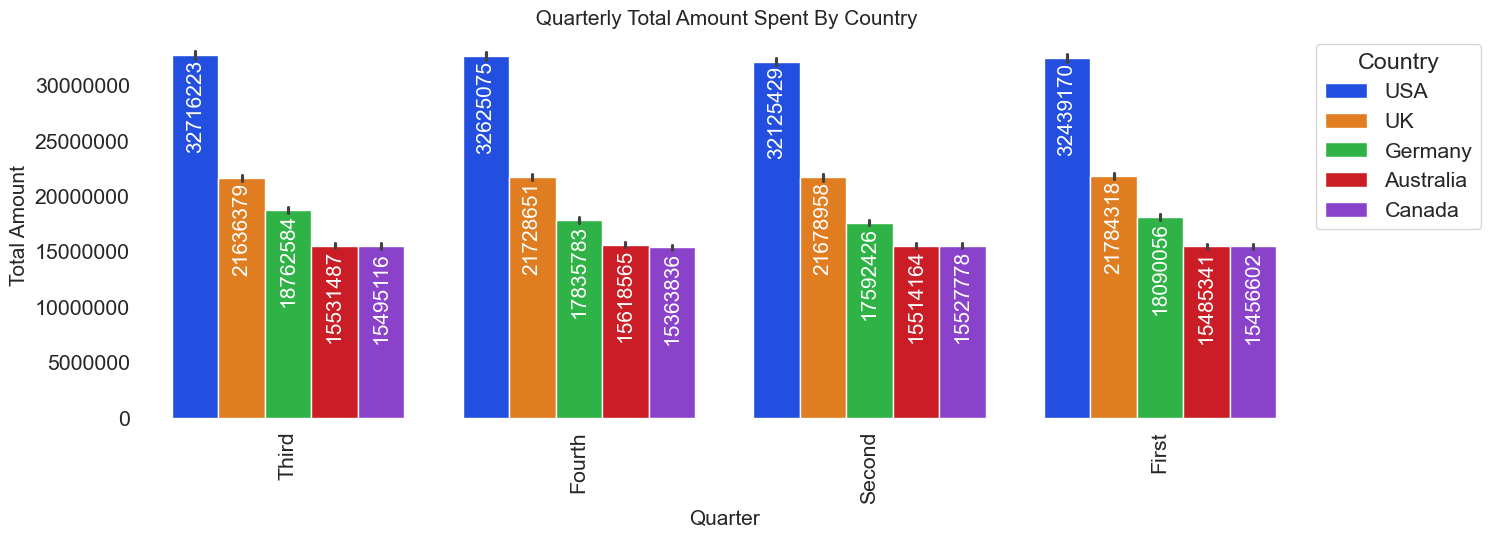

In [43]:
sns.set_theme(font_scale=1.4)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot(data=clean_df, y = 'Total_Amount' , hue='Country', x='Quarter', ax=ax, palette = sns.color_palette('bright'), hue_order=clean_df['Country'].value_counts(ascending = False).index, estimator=sum)
ax.set_xlabel('Quarter', fontsize=15)
ax.set_ylabel("Total Amount", fontsize=15)
for i in ax.containers:
    ax.bar_label(i,  padding=-70, fmt='%4d', color = 'white', rotation = 90, fontsize = 15)
ax.set_title(' Quarterly Total Amount Spent By Country', fontsize = 15)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine(bottom = True, left = True);

*5- Total Amount Spent By Each Customer Segment By Country*

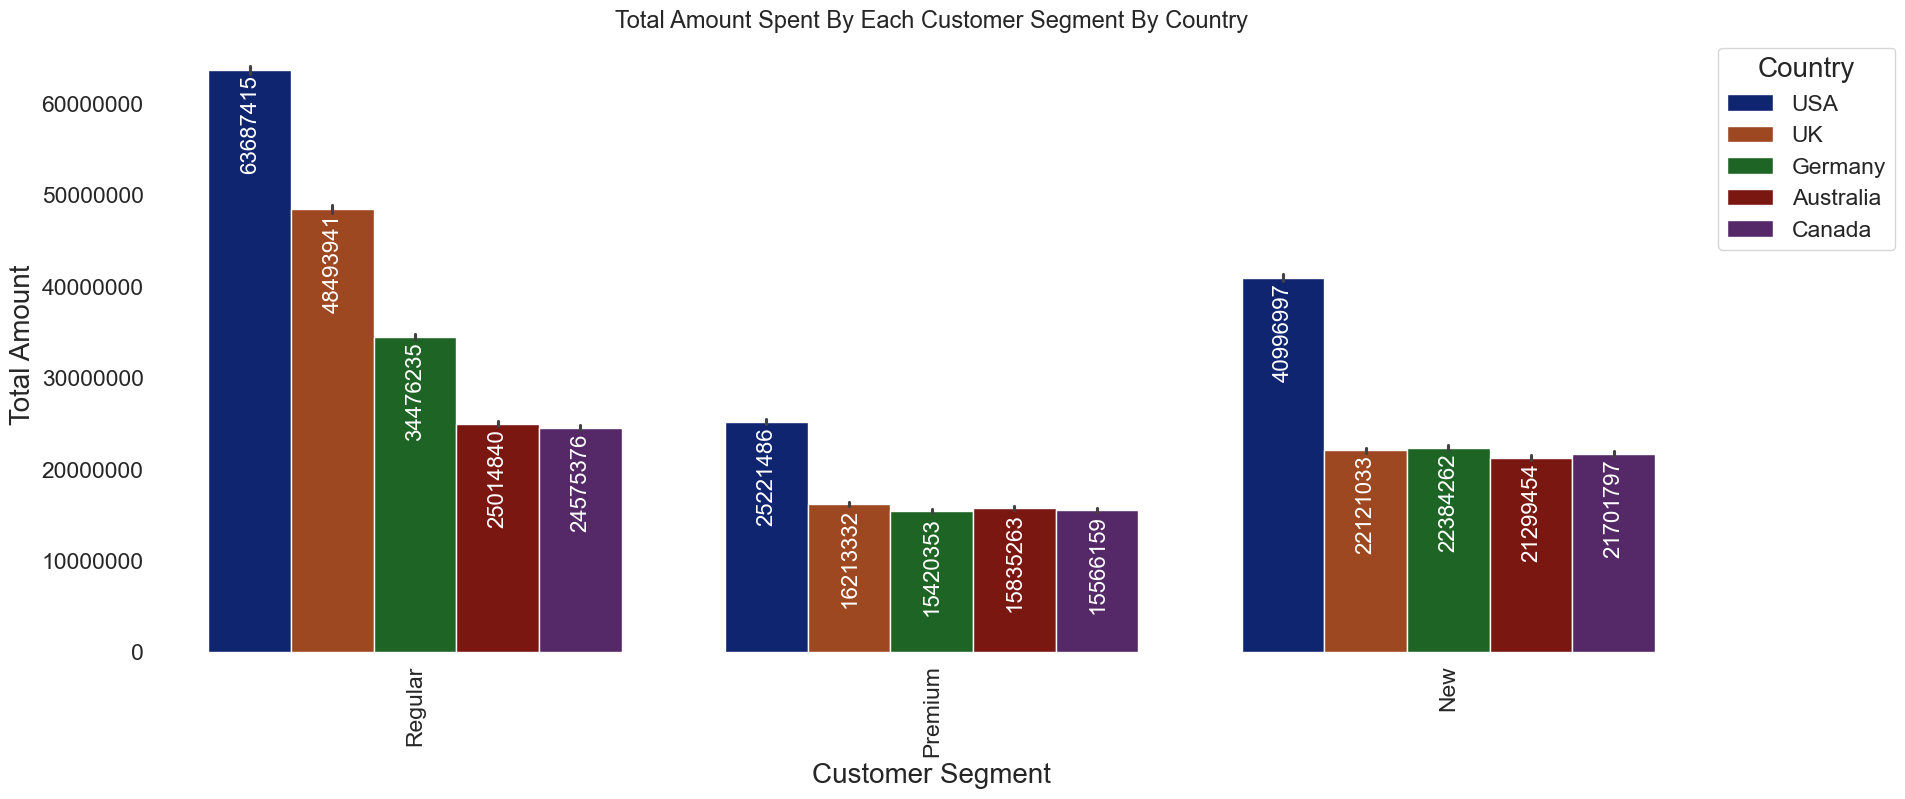

In [44]:
sns.set_theme(font_scale=1.5)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (20, 8))
sns.barplot(data=clean_df, y = 'Total_Amount', hue='Country', x='Customer_Segment', ax=ax, palette = sns.color_palette('dark'), hue_order=clean_df['Country'].value_counts(ascending = False).index, estimator=sum)
plt.legend(title='Country', fontsize= 20, title_fontsize=20)
ax.set_xlabel('Customer Segment', fontsize=20)
ax.set_ylabel("Total Amount", fontsize=20)
ax.set_title('Total Amount Spent By Each Customer Segment By Country', fontsize = 17)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
for i in ax.containers:
    ax.bar_label(i,  padding=-75, fmt='%d', color = 'white', rotation = 90, fontsize = 16)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine(bottom = True, left = True);

*6- Total Amount Spent Depending On Income Level By Country*

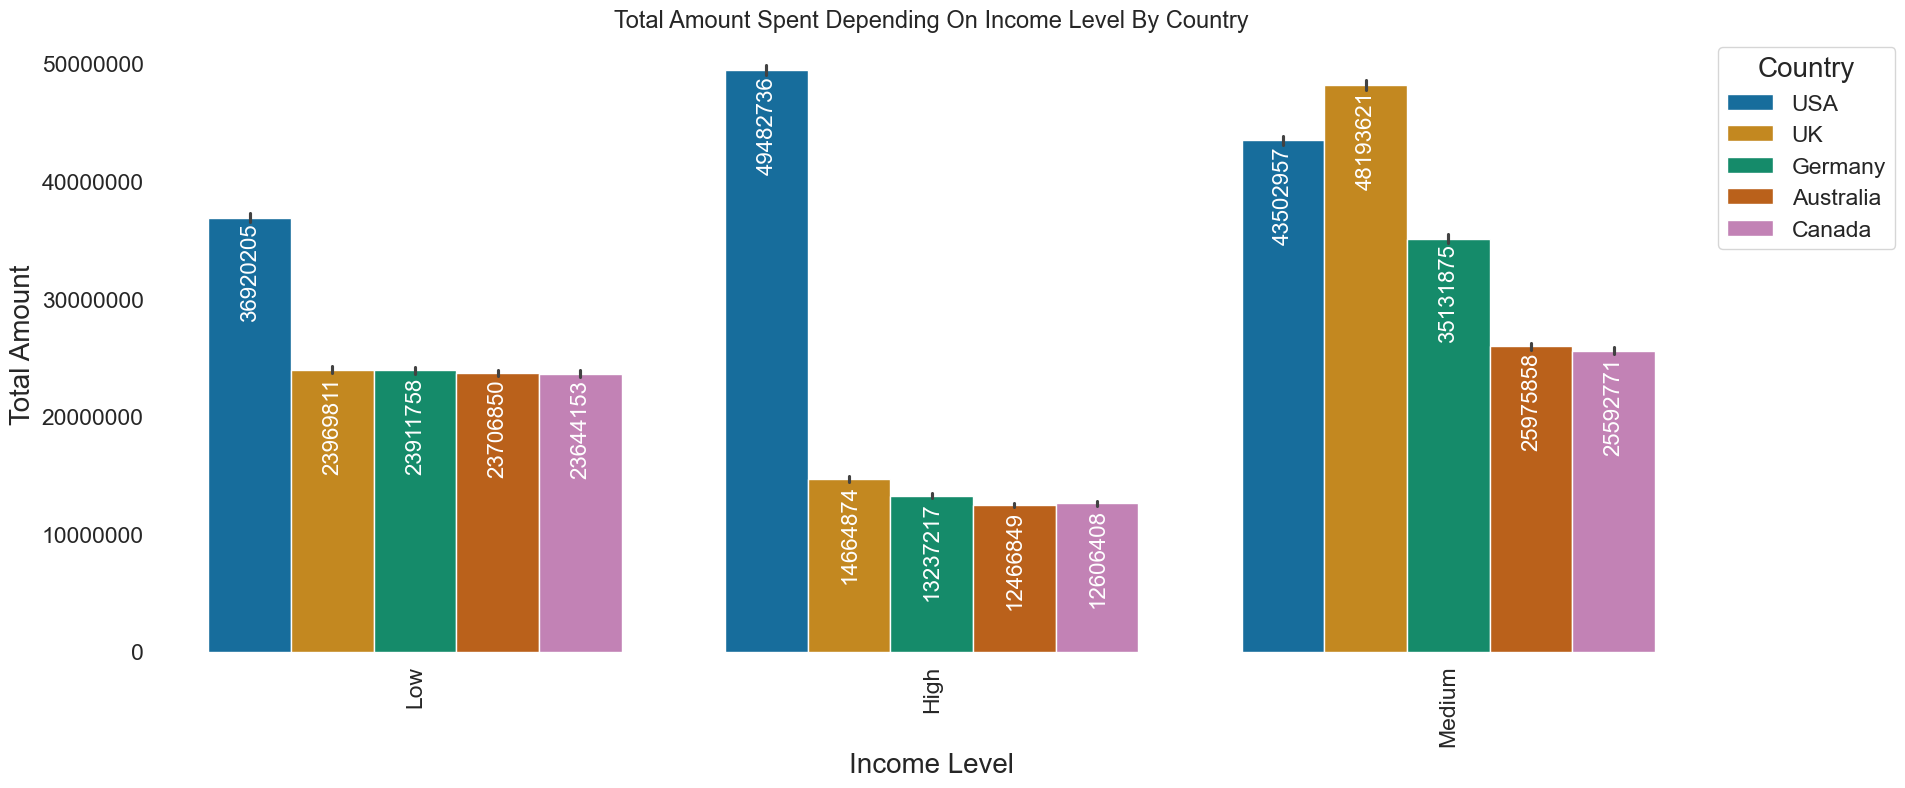

In [45]:
sns.set_theme(font_scale=1.5)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (20, 8))
sns.barplot(data=clean_df, y = 'Total_Amount', hue='Country', x='Income', ax=ax, palette = sns.color_palette('colorblind'), hue_order=clean_df['Country'].value_counts(ascending = False).index, estimator=sum)
plt.legend(title='Country', fontsize= 20, title_fontsize=20)
ax.set_xlabel('Income Level', fontsize=20)
ax.set_ylabel("Total Amount", fontsize=20)
ax.set_title('Total Amount Spent Depending On Income Level By Country', fontsize = 17)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
for i in ax.containers:
    ax.bar_label(i,  padding=-75, fmt='%d', color = 'white', rotation = 90, fontsize = 16)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine(bottom = True, left = True);

*7- Gender Preferred Product Category By Country*

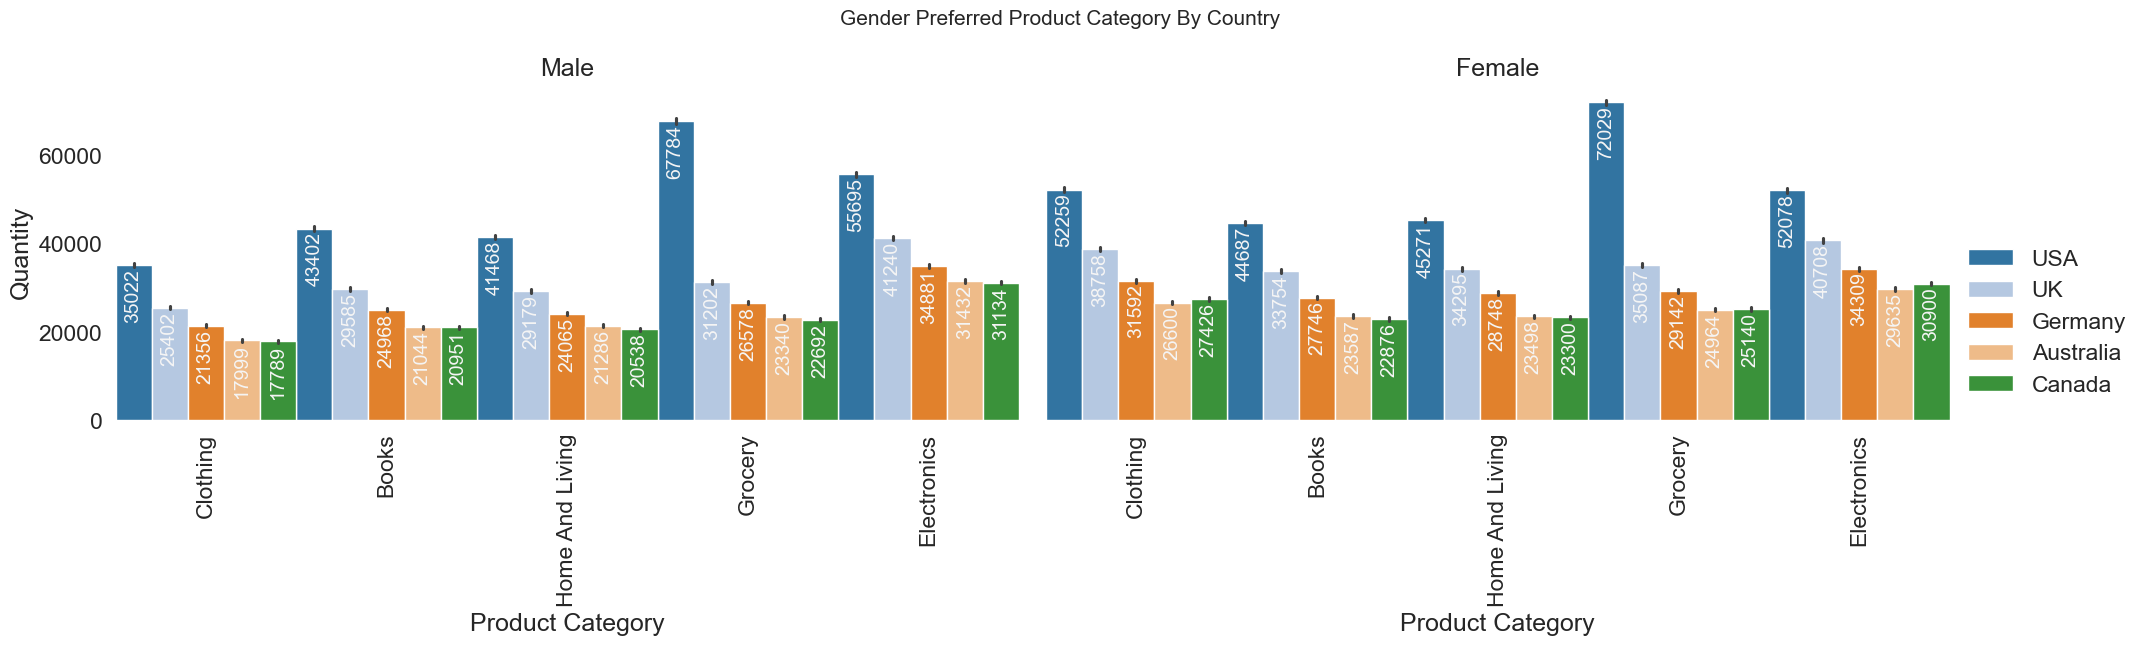

In [46]:
g = sns.FacetGrid(clean_df,  col='Gender',  height=5, aspect=2)
sns.set_style('white')
g.map_dataframe(sns.barplot, x= 'Product_Category',  y='Quantity', palette = sns.color_palette('tab20'), hue = 'Country', hue_order=clean_df['Country'].value_counts(ascending = False).index, estimator=sum, width = 1)
g.set_titles(col_template='{col_name}')
g.set_axis_labels('Product Category', "Quantity")
g.figure.subplots_adjust(top=0.85)
g.figure.suptitle('Gender Preferred Product Category By Country',  fontsize=15, verticalalignment = 'center', horizontalalignment = 'center')
g.set_xticklabels(rotation=90)
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, padding=-41, fmt='%d', color='whitesmoke', rotation=90, fontsize=14)
sns.despine(bottom = True, left = True);
g.add_legend();

*8- Product Category Average Rating By Country*

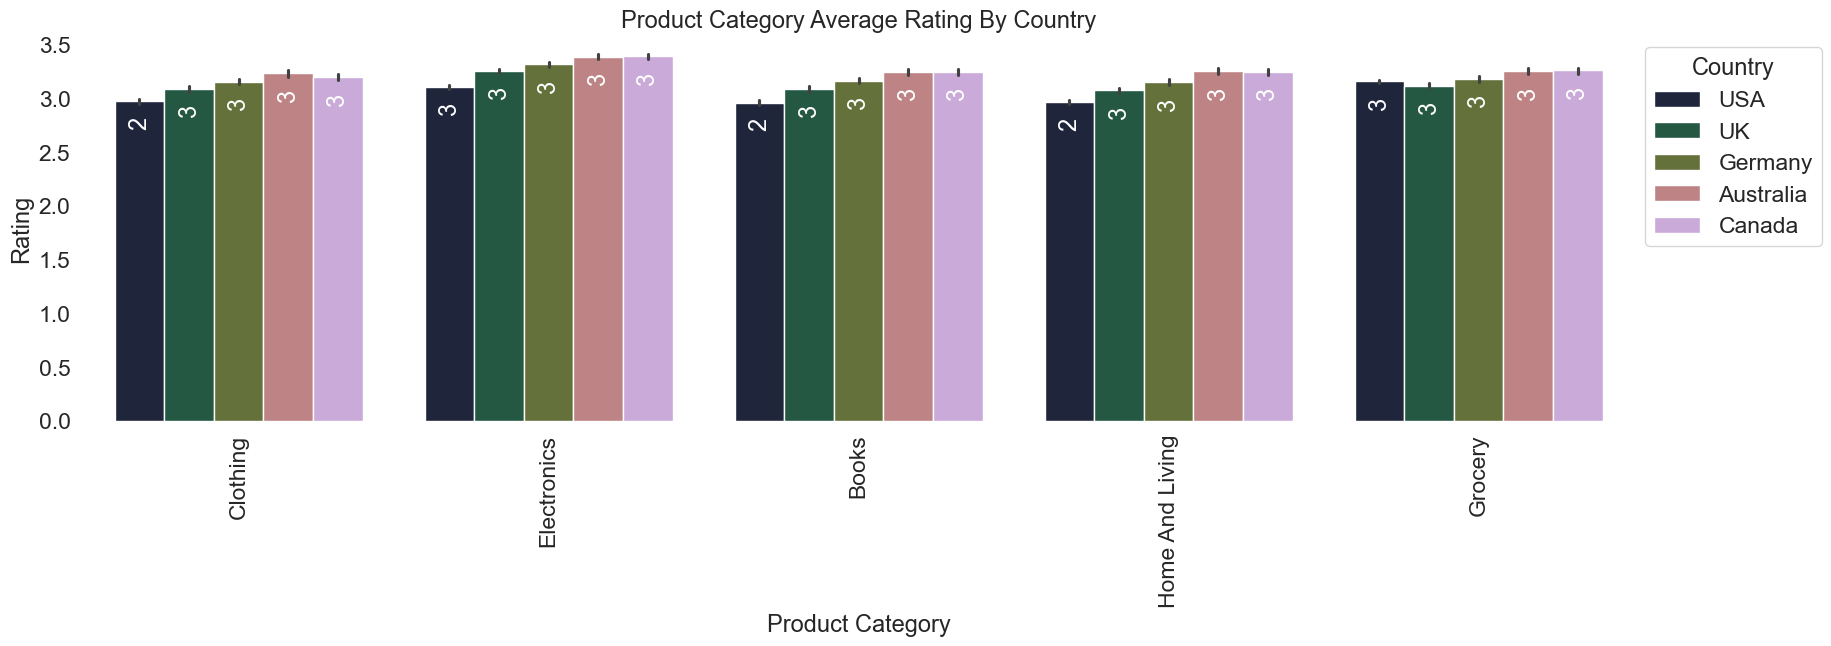

In [47]:
sns.set_theme(font_scale=1.5)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (20, 5))
sns.barplot(data=clean_df, y = 'Ratings', hue='Country', x='Product_Category', ax=ax, palette = sns.color_palette('cubehelix'), hue_order=clean_df['Country'].value_counts(ascending = False).index)
plt.legend(title='Country', fontsize= 17, title_fontsize= 17)
ax.set_xlabel('Product Category', fontsize=17)
ax.set_ylabel("Rating", fontsize=17)
ax.set_title('Product Category Average Rating By Country', fontsize = 17)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
for i in ax.containers:
    ax.bar_label(i,  padding=-20, fmt='%d', color = 'white', rotation = 90, fontsize = 17)
sns.despine(bottom = True, left = True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1));

*9- Product Category Amount Spent By Country*

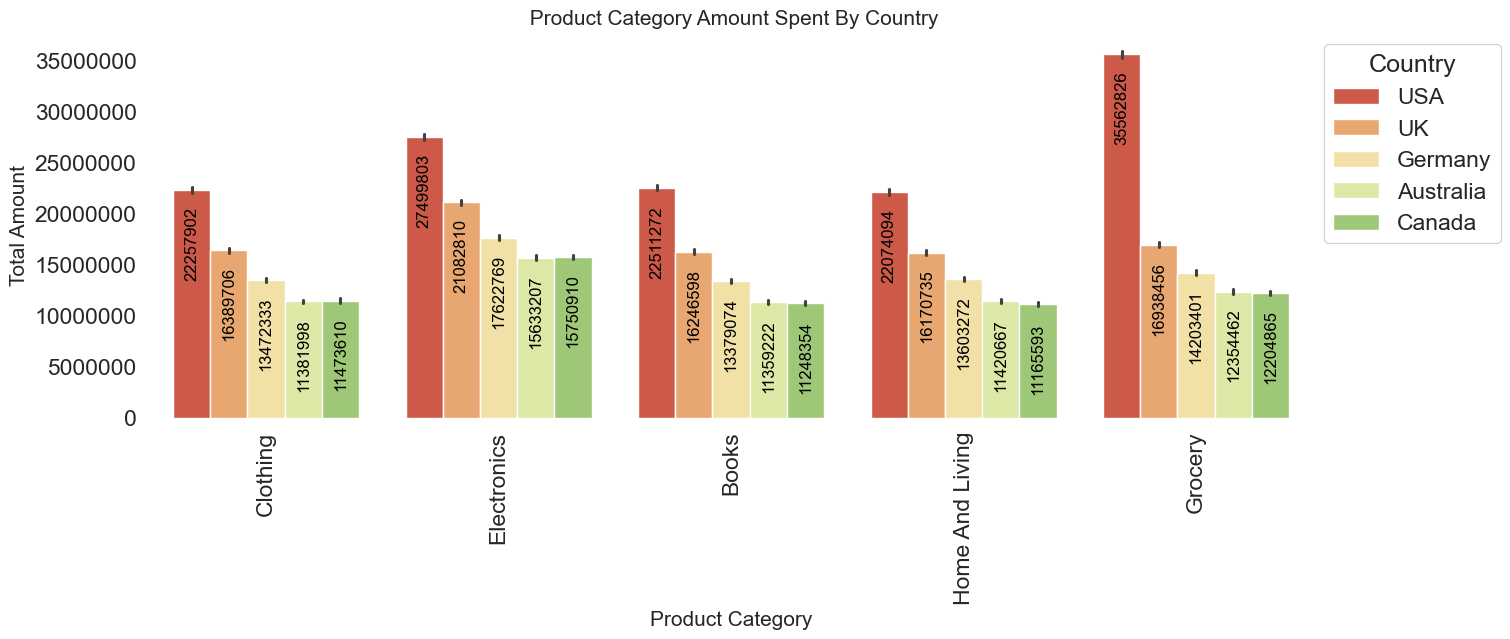

In [48]:
sns.set_theme(font_scale=1.5)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot(data=clean_df, y = 'Total_Amount' , hue='Country', x='Product_Category', ax=ax, palette = sns.color_palette('RdYlGn'), hue_order=clean_df['Country'].value_counts(ascending = False).index, estimator=sum)
ax.set_xlabel('Product Category', fontsize=15)
ax.set_ylabel("Total Amount", fontsize=15)
for i in ax.containers:
    ax.bar_label(i,  padding=-65, fmt='%4d', color = 'black', rotation = 90, fontsize = 12)
ax.set_title(' Product Category Amount Spent By Country', fontsize = 15)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine(bottom = True, left = True);

*10-Day Of Month Total Amount Spent By Country*

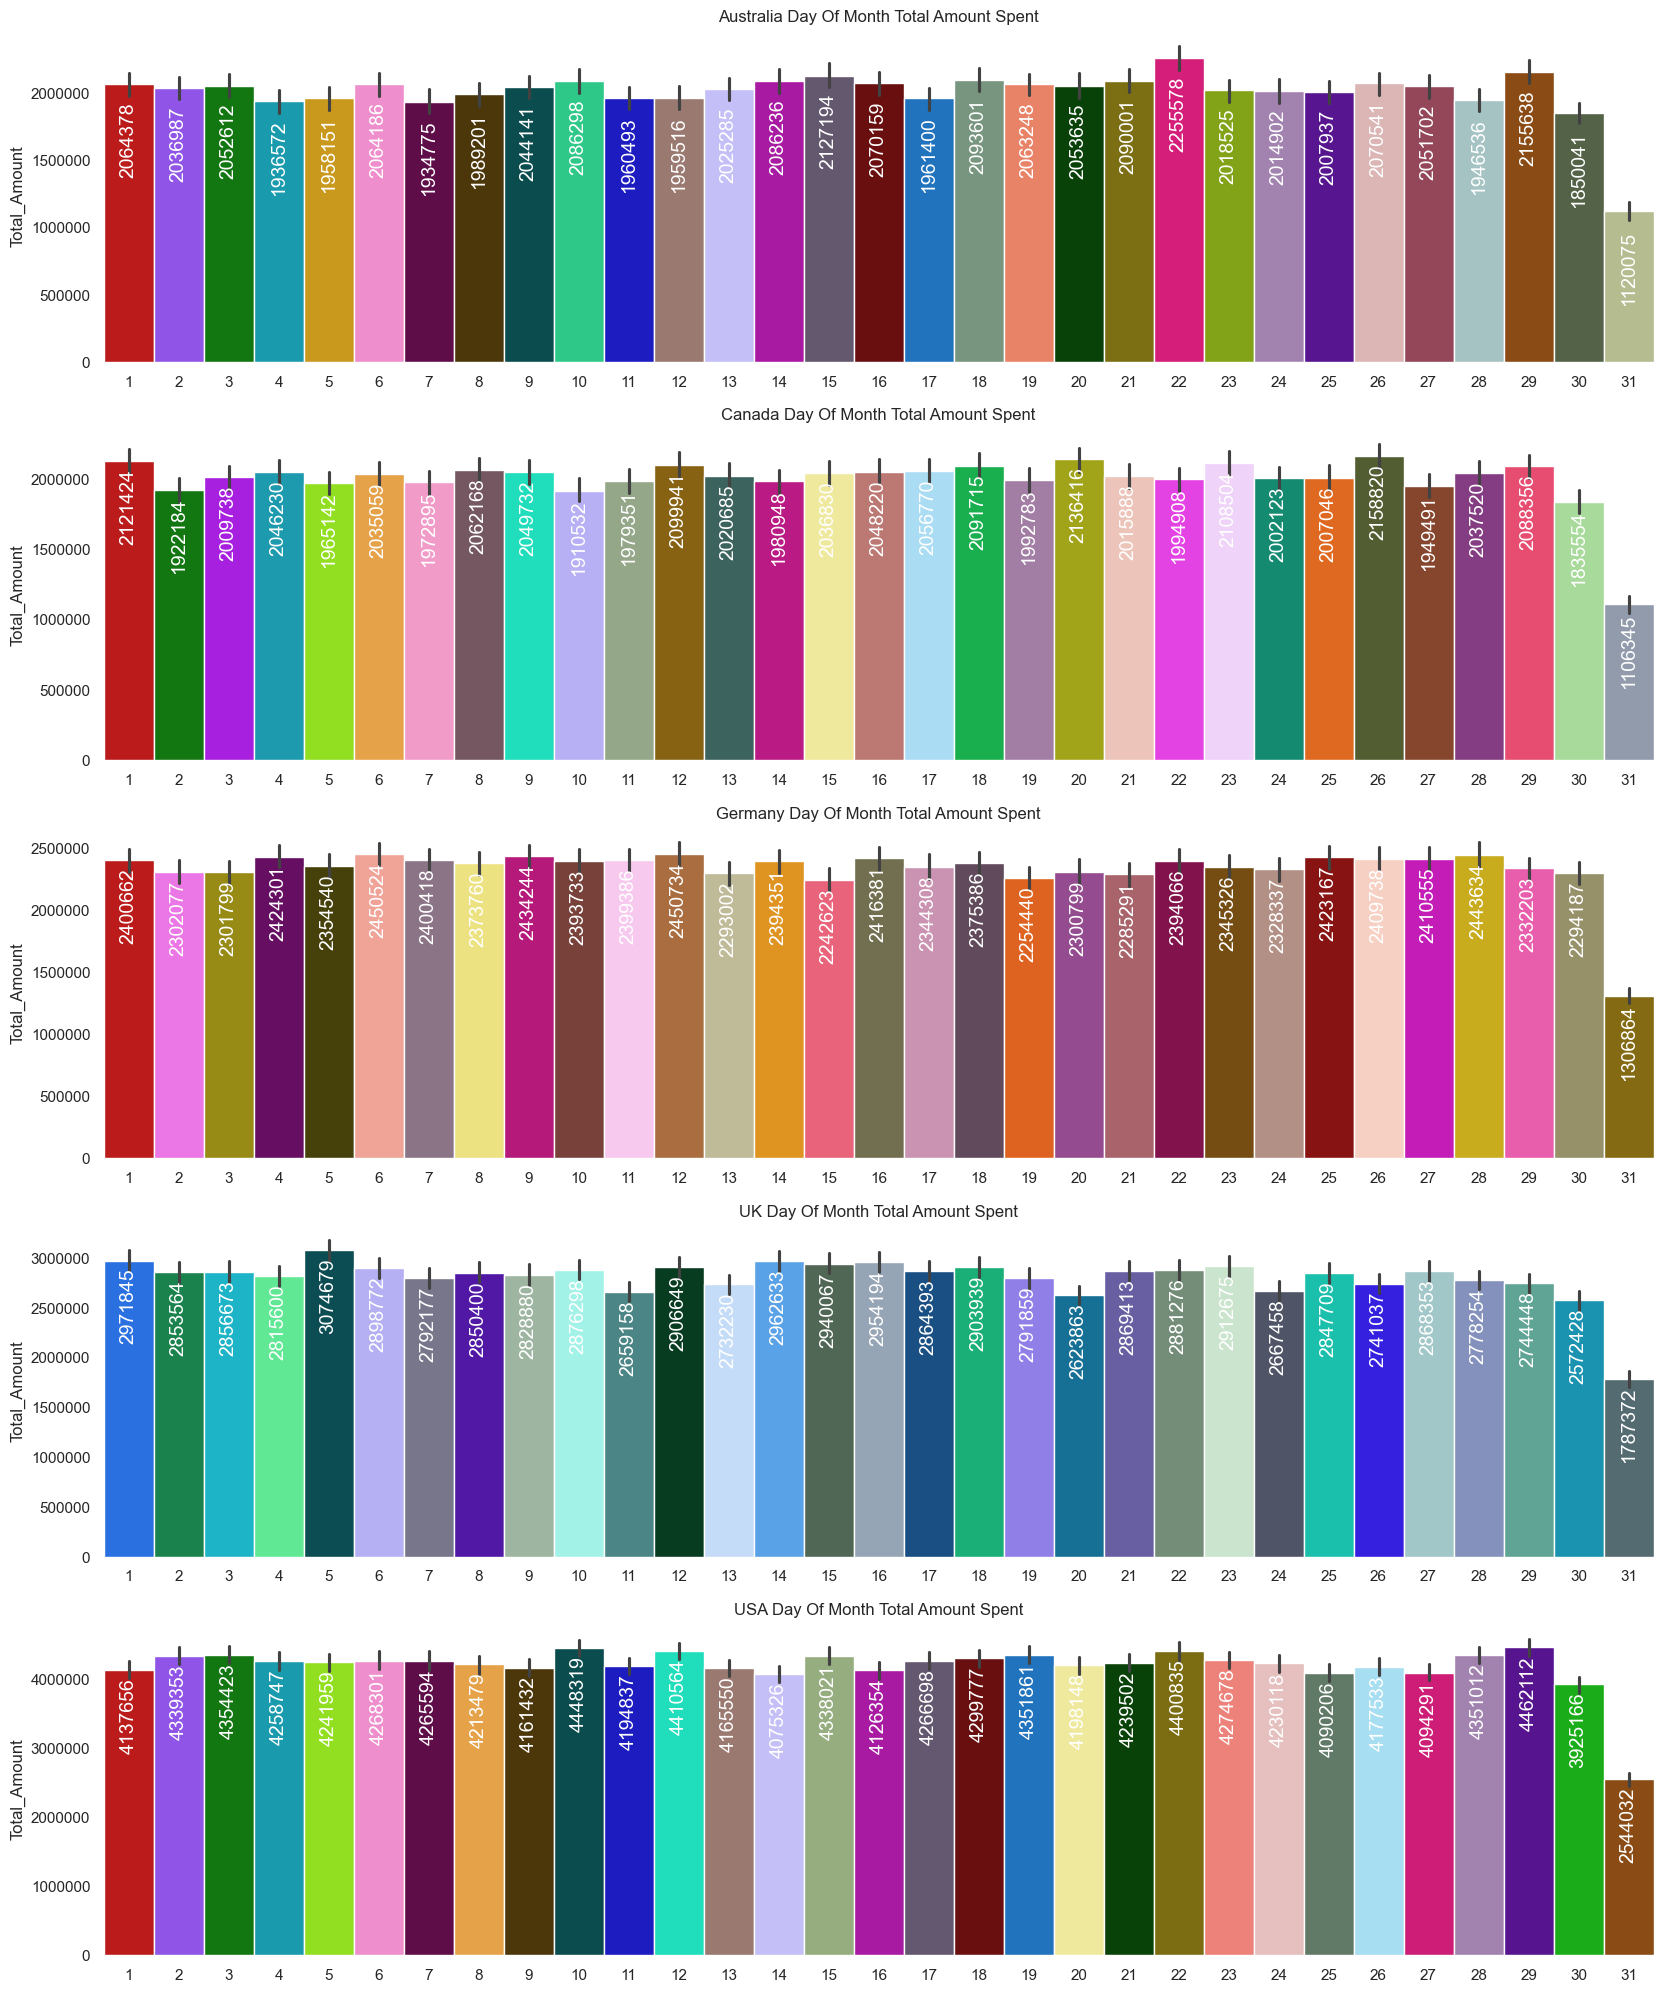

In [49]:
sns.set_theme(font_scale=1)
sns.set_style('white')
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=1, nrows = 5, figsize = (20, 25))
sns.barplot(data=australia_data, x = 'Day_Of_Month' , y='Total_Amount', ax=ax1, palette = sns.color_palette(cc.glasbey_dark, n_colors=31), width=1, estimator=sum)
sns.barplot(data=canada_data, x = 'Day_Of_Month' , y='Total_Amount', ax=ax2, palette = sns.color_palette(cc.glasbey_light, n_colors=31), width=1, estimator=sum)
sns.barplot(data=germany_data, x = 'Day_Of_Month' , y='Total_Amount', ax=ax3, palette = sns.color_palette(cc.glasbey_warm, n_colors=31), width=1, estimator=sum)
sns.barplot(data=uk_data, x = 'Day_Of_Month' , y='Total_Amount', ax=ax4, palette = sns.color_palette(cc.glasbey_cool, n_colors=31), width=1, estimator=sum)
sns.barplot(data=usa_data, x = 'Day_Of_Month' , y='Total_Amount', ax=ax5, palette = sns.color_palette(cc.glasbey, n_colors=31), width=1, estimator=sum)


for i in ax1.containers:
    ax1.bar_label(i,  padding=-67, fmt='%.1d', color = 'white', rotation = 90, fontsize = 14)
for i in ax2.containers:
    ax2.bar_label(i,  padding=-60, fmt='%.1d', color = 'white', rotation = 90, fontsize = 14)
for i in ax3.containers:
    ax3.bar_label(i,  padding=-60, fmt='%.1d', color = 'white', rotation = 90, fontsize = 14)
for i in ax4.containers:
    ax4.bar_label(i,  padding=-60, fmt='%.1d', color = 'white', rotation = 90, fontsize = 14)
for i in ax5.containers:
    ax5.bar_label(i,  padding=-60, fmt='%.1d', color = 'white', rotation = 90, fontsize = 14)

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')
ax5.set_xlabel('')

ax1.set_title('Australia Day Of Month Total Amount Spent', fontsize = 12)
ax2.set_title('Canada Day Of Month Total Amount Spent', fontsize = 12)
ax3.set_title('Germany Day Of Month Total Amount Spent', fontsize = 12)
ax4.set_title('UK Day Of Month Total Amount Spent', fontsize = 12)
ax5.set_title('USA Day Of Month Total Amount Spent', fontsize = 12)

ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')
ax3.ticklabel_format(style='plain', axis='y')
ax4.ticklabel_format(style='plain', axis='y')
ax5.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

**b-Tables**

*1-Seasonally Most Common Chocolate Products By Country*

In [50]:
chocolate = clean_df[(clean_df['Product_Category'] == 'Grocery') & (clean_df['Product_Type'] == 'Chocolate')]
chocolate_most_common = pd.DataFrame(chocolate.groupby(['Country', 'Season','Products'], as_index=False)['Quantity'].sum()).groupby(['Country', 'Season'],as_index=False, group_keys=False).apply(lambda x: x.nlargest(1, 'Quantity'))
chocolate_most_common.style.set_properties(**{'background-color': 'white','color': 'green'})

*2-Seasonally Most Common Coffee Products By Country*

In [51]:
coffee = clean_df[(clean_df['Product_Category'] == 'Grocery') & (clean_df['Product_Type'] == 'Coffee')]
coffee_most_common = pd.DataFrame(coffee.groupby(['Country', 'Season','Products'],as_index=False)['Quantity'].sum()).groupby(['Country', 'Season'],as_index=False, group_keys=False).apply(lambda x: x.nlargest(1, 'Quantity'))
coffee_most_common.style.set_properties(**{'background-color': 'white','color': 'green'})

*3-Seasonally Most Common Water Products By Country*

In [52]:
water = clean_df[(clean_df['Product_Category'] == 'Grocery') & (clean_df['Product_Type'] == 'Water')]
water_most_common = pd.DataFrame(water.groupby(['Country', 'Season','Products'],as_index=False)['Quantity'].sum()).groupby(['Country', 'Season'],as_index=False, group_keys=False).apply(lambda x: x.nlargest(1, 'Quantity'))
water_most_common.style.set_properties(**{'background-color': 'white','color': 'green'})

*4-Seasonally Most Common Snacks Products By Country*

In [53]:
snacks = clean_df[(clean_df['Product_Category'] == 'Grocery') & (clean_df['Product_Type'] == 'Snacks')]
snacks_most_common = pd.DataFrame(snacks.groupby(['Country', 'Season','Products'],as_index=False)['Quantity'].sum()).groupby(['Country', 'Season'],as_index=False).apply(lambda x: x.nlargest(1, 'Quantity'))
snacks_most_common.style.set_properties(**{'background-color': 'white','color': 'green'})

*5-Seasonally Most Common Juice Products By Country*

In [54]:
juice = clean_df[(clean_df['Product_Category'] == 'Grocery') & (clean_df['Product_Type'] == 'Juice')]
juice_most_common = pd.DataFrame(juice.groupby(['Country', 'Season','Products'],as_index=False)['Quantity'].sum()).groupby(['Country', 'Season'],as_index=False, group_keys=False).apply(lambda x: x.nlargest(1, 'Quantity'))
juice_most_common.style.set_properties(**{'background-color': 'white','color': 'green'})

*6-Seasonally Most Common Soft Drink Products By Country*

In [55]:
soft_drink = clean_df[(clean_df['Product_Category'] == 'Grocery') & (clean_df['Product_Type'] == 'Soft Drink')]
soft_drink_most_common = pd.DataFrame(soft_drink.groupby(['Country', 'Season','Products'],as_index=False)['Quantity'].sum()).groupby(['Country', 'Season'],as_index=False, group_keys=False).apply(lambda x: x.nlargest(1, 'Quantity'))
soft_drink_most_common.style.set_properties(**{'background-color': 'white','color': 'green'})

*7-Hourly Total Amount By Country*

In [56]:
hourly_total_amount = pd.pivot_table(clean_df, values='Total_Amount',
                                index=['Hour'],
                                columns='Country',
                                aggfunc='sum')
hourly_total_amount = hourly_total_amount.applymap(int)
hourly_total_amount.style.set_properties(**{'background-color': 'white','color': 'green'})

*8-Product Category Monthly Peak Time By Country*

In [57]:
product_category_peak_time = pd.DataFrame(clean_df.groupby(['Country', 'Month_Name','Day', 'Hour','Product_Category'],as_index=False)['Quantity'].sum()).groupby(['Country','Product_Category'],as_index=False, group_keys=False).apply(lambda x: x.nlargest(1, 'Quantity'))
product_category_peak_time.style.set_properties(**{'background-color': 'white','color': 'green'})

*9- Clothing Peak Time By Product Brand By Country*

In [58]:
clothing = clean_df[clean_df['Product_Category'] == 'Clothing']
clothing_peak_time = pd.DataFrame(clothing.groupby(['Country', 'Month_Name','Day', 'Hour','Product_Type', 'Product_Brand'],as_index=False)['Quantity'].sum()).groupby(['Country','Product_Type'],as_index=False, group_keys=False).apply(lambda x: x.nlargest(1, 'Quantity'))
clothing_peak_time.style.set_properties(**{'background-color': 'white','color': 'green'})

*10- Electronics Peak Time By Product Brand By Country*

In [59]:
electronics = clean_df[clean_df['Product_Category'] == 'Electronics']
electronics_peak_time = pd.DataFrame(electronics.groupby(['Country', 'Month_Name','Day', 'Hour','Product_Brand', 'Product_Type'],as_index=False)['Quantity'].sum()).groupby(['Country','Product_Type'],as_index=False, group_keys=False).apply(lambda x: x.nlargest(1, 'Quantity'))
electronics_peak_time.style.set_properties(**{'background-color': 'white','color': 'green'})

*11-Grocery Peak Time By Product Brand By Country*

In [60]:
grocery = clean_df[clean_df['Product_Category'] == 'Grocery']
grocery_peak_time = pd.DataFrame(grocery.groupby(['Country', 'Month_Name','Day', 'Hour','Product_Brand', 'Product_Type'],as_index=False)['Quantity'].sum()).groupby(['Country','Product_Type'],as_index=False, group_keys=False).apply(lambda x: x.nlargest(1, 'Quantity'))
grocery_peak_time.style.set_properties(**{'background-color': 'white','color': 'green'})

*12-Gender Seasonally Prefer Clothing Products By Country*

In [61]:
clothing = clean_df[clean_df['Product_Category'] == 'Clothing']
gender_clothing_prefer = pd.DataFrame(clothing.groupby(['Country','Season','Gender','Products'],as_index=False)['Quantity'].sum()).groupby(['Country', 'Gender' ,'Season'],as_index=False, group_keys=False).apply(lambda x: x.nlargest(1, 'Quantity'))
gender_clothing_prefer.style.set_properties(**{'background-color': 'white','color': 'green'})

*13-Brand With Highest Pending Orders By Category By Country*

In [62]:
pending = clean_df[clean_df['Order_Status'] == 'Pending']
all_orders = clean_df.groupby(['Country','Product_Category', 'Product_Brand'], as_index=False).agg(NumberOfOrders = ('Customer_ID','count'))
pending_order_count_high = pd.DataFrame(pending.groupby(['Country','Product_Category','Product_Brand'],as_index=False).agg(PendingOrders=('Order_Status', 'count')))
pending_order_count_high = pd.merge(pending_order_count_high, all_orders, how='inner')
pending_order_count_high['PendingOrdersPercentage'] = (pending_order_count_high['PendingOrders'] / pending_order_count_high['NumberOfOrders']) * 100
pending_order_count_high = pending_order_count_high.groupby(['Country', 'Product_Category'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(1 , 'PendingOrdersPercentage'))
pending_order_count_high.style\
    .format({'PendingOrdersPercentage': "{:.2f}"}) \
    .set_properties(**{'background-color': 'white', 'color': 'green'})

*14-Brand With Highest Low Rating By Category By Country*

In [63]:
low = clean_df[(clean_df['Ratings'] == 1)| (clean_df['Ratings'] == 2)]
all_orders = clean_df.groupby(['Country','Product_Category', 'Product_Brand'], as_index=False).agg(NumberOfOrders = ('Customer_ID','count'))
low_rating_count_high = pd.DataFrame(low.groupby(['Country','Product_Category','Product_Brand'],as_index=False).agg(LowRatings=('Ratings', 'count')))
low_rating_count_high = pd.merge(low_rating_count_high, all_orders, how='inner')
low_rating_count_high['LowRatingsPercentage'] = ((low_rating_count_high['LowRatings'] / low_rating_count_high['NumberOfOrders']) * 100)
low_rating_count_high = low_rating_count_high.groupby(['Country', 'Product_Category'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(1 , 'LowRatingsPercentage'))
low_rating_count_high.style\
    .format({'LowRatingsPercentage': "{:.2f}"}) \
    .set_properties(**{'background-color': 'white', 'color': 'green'})

*15-Hour Of The Day With The Highest Low Ratings By Month For Each Country*

In [64]:
low = clean_df[(clean_df['Ratings'] == 1)| (clean_df['Ratings'] == 2)]
all_orders = clean_df.groupby(['Country', 'Month_Name', 'Day', 'Hour'], as_index=False).agg(NumberOfOrders = ('Customer_ID','count'))
hour_high_low_rating = pd.DataFrame(low.groupby(['Country', 'Month_Name', 'Day', 'Hour'],as_index=False).agg(LowRatings=('Ratings', 'count')))
hour_high_low_rating = pd.merge(hour_high_low_rating, all_orders, how='inner')
hour_high_low_rating['LowRatingsPercentage'] = (hour_high_low_rating['LowRatings'] / hour_high_low_rating['NumberOfOrders']) * 100
hour_high_low_rating = hour_high_low_rating.groupby(['Country', 'Month_Name'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(1 , 'LowRatingsPercentage'))
hour_high_low_rating.style\
    .format({'LowRatingsPercentage': "{:.2f}"}) \
    .set_properties(**{'background-color': 'white', 'color': 'green'})

*16-Worst Payment Method For Each Shipping Method By Category By Country*

In [65]:
payment_shipping = clean_df[(clean_df['Ratings'] == 1)| (clean_df['Ratings'] == 2)]
all_orders = clean_df.groupby(['Country','Product_Category','Shipping_Method','Payment_Method'], as_index=False).agg(NumberOfOrders = ('Customer_ID','count'))
payment_method_shipping_method = pd.DataFrame(payment_shipping.groupby(['Country','Product_Category','Shipping_Method','Payment_Method'],as_index=False).agg(LowRatings=('Ratings', 'count')))
payment_method_shipping_method = pd.merge(payment_method_shipping_method, all_orders, how='inner')
payment_method_shipping_method['LowRatingsPercentage'] = (payment_method_shipping_method['LowRatings'] / payment_method_shipping_method['NumberOfOrders']) * 100
payment_method_shipping_method = payment_method_shipping_method.groupby(['Country', 'Product_Category','Shipping_Method'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(1 , 'LowRatingsPercentage'))
payment_method_shipping_method.style\
    .format({'LowRatingsPercentage': "{:.2f}"}) \
    .set_properties(**{'background-color': 'white', 'color': 'green'})

*17-Top 5 Regular Customers In Each Country*

In [66]:
regular = clean_df[clean_df['Customer_Segment'] == 'Regular']
top_5_customers_regular = pd.DataFrame(regular.groupby(['Country','City','Customer_ID'],as_index=False).agg(TotalAmount=('Total_Amount', sum))).groupby(['Country'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(5 , 'TotalAmount')).sort_values(by = ['Country', 'TotalAmount'], ascending = False)
top_5_customers_regular.style.set_properties(**{'background-color': 'white','color': 'green'})

*18-Top 5 Premium Customers In Each Country*

In [67]:
premium = clean_df[clean_df['Customer_Segment'] == 'Premium']
top_5_customers_premium = pd.DataFrame(premium.groupby(['Country','City','Customer_ID'],as_index=False).agg(TotalAmount=('Total_Amount', sum))).groupby(['Country'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(5 , 'TotalAmount')).sort_values(by = ['Country', 'TotalAmount'], ascending = False)
top_5_customers_premium.style.set_properties(**{'background-color': 'white','color': 'green'})

*19-Top 5 New Customer In Each Country*

In [68]:
new = clean_df[clean_df['Customer_Segment'] == 'New']
top_5_customers_new = pd.DataFrame(new.groupby(['Country','City','Customer_ID'],as_index=False).agg(TotalAmount=('Total_Amount', sum))).groupby(['Country'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(5 , 'TotalAmount')).sort_values(by = ['Country', 'TotalAmount'], ascending = False)
top_5_customers_new.style.set_properties(**{'background-color': 'white','color': 'green'})

*20-Lowest Spending 5 New Customers In Each Country*

In [69]:
new = clean_df[clean_df['Customer_Segment'] == 'New']
top_5_customers_new = pd.DataFrame(new.groupby(['Country','City','Customer_ID'],as_index=False).agg(TotalAmount=('Total_Amount', sum))).groupby(['Country'],as_index=False, group_keys=False).apply(lambda x:x.nsmallest(5 , 'TotalAmount')).sort_values(by = ['Country', 'TotalAmount'], ascending = False)
top_5_customers_new.style.set_properties(**{'background-color': 'white','color': 'green'})

*21-Preferred Day Of Month To Make Orders By Country*

In [70]:
preferred_day_of_month = clean_df.groupby(['Country','Month_Name' ,'Day_Of_Month'],as_index=False, group_keys=False).agg(TotalOrders =('Customer_ID', 'count')).groupby(['Country', 'Month_Name'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(1 , 'TotalOrders'))
preferred_day_of_month.style.set_properties(**{'background-color': 'white', 'color': 'green'})

*22-Day Of Month The Highest Low Ratings By Country*

In [71]:
low = clean_df[(clean_df['Ratings'] == 1)| (clean_df['Ratings'] == 2)]
all_orders = clean_df.groupby(['Country','Month_Name', 'Day_Of_Month'],as_index=False, group_keys=False).agg(NumberOfOrders = ('Customer_ID','count'))
low_ratings = pd.DataFrame(low.groupby(['Country','Month_Name', 'Day_Of_Month'],as_index=False).agg(LowRatings=('Ratings', 'count')))
low_ratings = pd.merge(low_ratings, all_orders, how='inner')
low_ratings['LowRatingsPercentage'] = 100 * (low_ratings['LowRatings'] / low_ratings['NumberOfOrders'])
low_ratings = low_ratings.groupby(['Country','Month_Name'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(1 , 'LowRatingsPercentage')).sort_values(by = ['Country'], ascending = True)
low_ratings.style \
    .format({'LowRatingsPercentage': "{:.2f}"}) \
    .set_properties(**{'background-color': 'white', 'color': 'green'})


*23-Day Of Month With Highest Pending Orders By Country*

In [72]:
pending = clean_df[(clean_df['Order_Status'] == 'Pending')]
all_orders = clean_df.groupby(['Country','Month_Name', 'Day_Of_Month'],as_index=False, group_keys=False).agg(NumberOfOrders = ('Customer_ID','count'))
pending_orders = pd.DataFrame(pending.groupby(['Country','Month_Name', 'Day_Of_Month'],as_index=False).agg(PendingOrders=('Order_Status', 'count')))
pending_orders = pd.merge(pending_orders, all_orders, how='inner')
pending_orders['PendingOrdersPercentage'] = 100 * (pending_orders['PendingOrders'] / pending_orders['NumberOfOrders'])
pending_orders = pending_orders.groupby(['Country','Month_Name'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(1 , 'PendingOrdersPercentage')).sort_values(by = ['Country'], ascending = True)
pending_orders.style \
    .format({'PendingOrdersPercentage': "{:.2f}"}) \
    .set_properties(**{'background-color': 'white', 'color': 'green'})


*24-Top 5 Smartphones In Each Country*

In [73]:
smartphone = clean_df[(clean_df['Product_Category'] == 'Electronics') & (clean_df['Product_Type'] == 'Smartphone')]
top_5_smartphone = pd.DataFrame(smartphone.groupby(['Country','Products'],as_index=False).agg(TotalAmount = ('Total_Amount', 'sum'))).groupby(['Country'],as_index=False, group_keys=False).apply(lambda x: x.nlargest(5, 'TotalAmount'))
top_5_smartphone ['TotalAmount'] = top_5_smartphone ['TotalAmount'].astype(int)
top_5_smartphone.style.set_properties(**{'background-color': 'white','color': 'green'})

*25-Top 5 Laptops In Each Country*

In [74]:
laptop = clean_df[(clean_df['Product_Category'] == 'Electronics') & (clean_df['Product_Type'] == 'Laptop')]
top_5_laptop = pd.DataFrame(laptop.groupby(['Country','Products'],as_index=False).agg(TotalAmount = ('Total_Amount', 'sum'))).groupby(['Country'],as_index=False, group_keys=False).apply(lambda x: x.nlargest(5, 'TotalAmount'))
top_5_laptop ['TotalAmount'] = top_5_laptop ['TotalAmount'].astype(int)
top_5_laptop.style.set_properties(**{'background-color': 'white','color': 'green'})

*26-Top 5 Tablets In Each Country*

In [75]:
tablets = clean_df[(clean_df['Product_Category'] == 'Electronics') & (clean_df['Product_Type'] == 'Tablet')]
top_5_tablets = pd.DataFrame(tablets.groupby(['Country','Products'],as_index=False).agg(TotalAmount = ('Total_Amount', 'sum'))).groupby(['Country'],as_index=False, group_keys=False).apply(lambda x: x.nlargest(5, 'TotalAmount'))
top_5_tablets ['TotalAmount'] = top_5_tablets ['TotalAmount'].astype(int)
top_5_tablets.style.set_properties(**{'background-color': 'white','color': 'green'})

**c-Table And Chart**

*1-Number Of Customers In Each Country Cities*

In [76]:
customer_count_usa = usa_data.groupby(['Country', 'City'],as_index=False).agg(Customer_Count =('Customer_ID', 'nunique')).sort_values(by = 'Customer_Count', ascending = False)
customer_count_usa.style.set_properties(**{'background-color': 'white', 'color': 'green'})

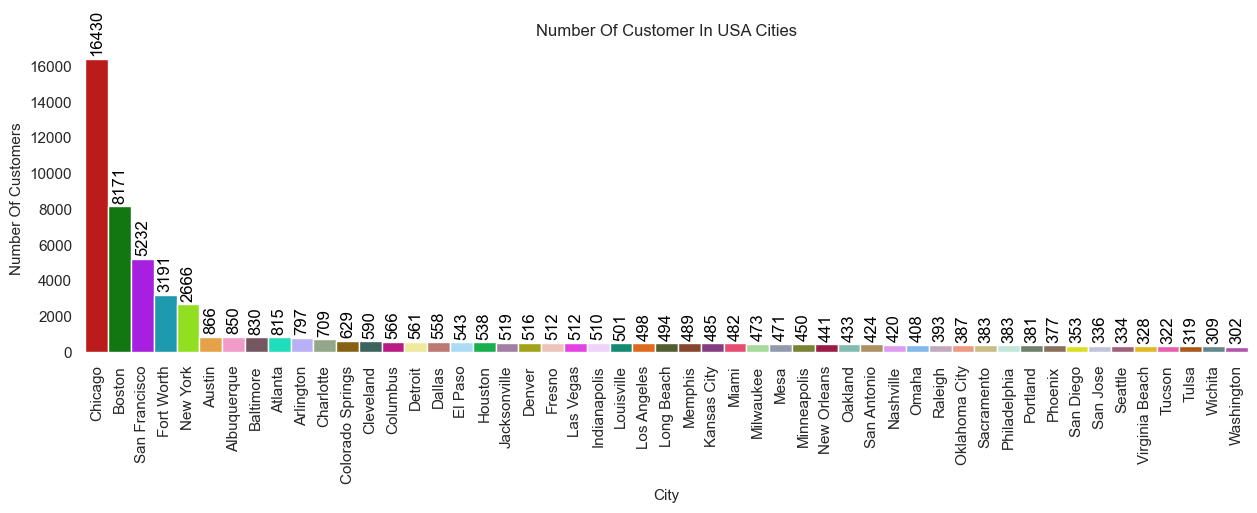

In [77]:
sns.set_theme(font_scale=1)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 4))
sns.barplot(data=customer_count_usa, y = 'Customer_Count' , x='City', ax=ax, palette = sns.color_palette(cc.glasbey_light, n_colors=51), width=1)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Number Of Customers", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=2, fmt='%.1d', color = 'Black', rotation = 90, fontsize = 12)
ax.set_title('Number Of Customer In USA Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

In [78]:
customer_count_canada = canada_data.groupby(['Country', 'City'],as_index=False, group_keys=False).agg(Customer_Count =('Customer_ID', 'nunique')).sort_values(by = 'Customer_Count', ascending = False)
customer_count_canada.style.set_properties(**{'background-color': 'white', 'color': 'green'})

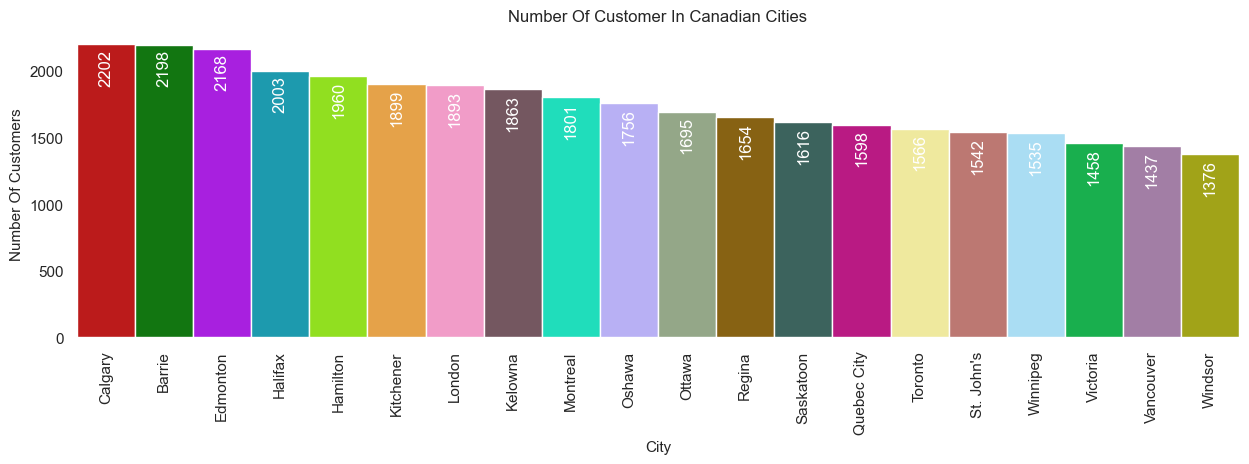

In [79]:
sns.set_theme(font_scale=1)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 4))
sns.barplot(data=customer_count_canada, y = 'Customer_Count' , x='City', ax=ax, palette = sns.color_palette(cc.glasbey_light, n_colors=51), width=1)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Number Of Customers", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=-30, fmt='%.1d', color = 'white', rotation = 90, fontsize = 12)
ax.set_title('Number Of Customer In Canadian Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

In [80]:
customer_count_uk = uk_data.groupby(['Country', 'City'],as_index=False, group_keys=False).agg(Customer_Count =('Customer_ID', 'nunique')).sort_values(by = 'Customer_Count', ascending = False)
customer_count_uk.style.set_properties(**{'background-color': 'white', 'color': 'green'})

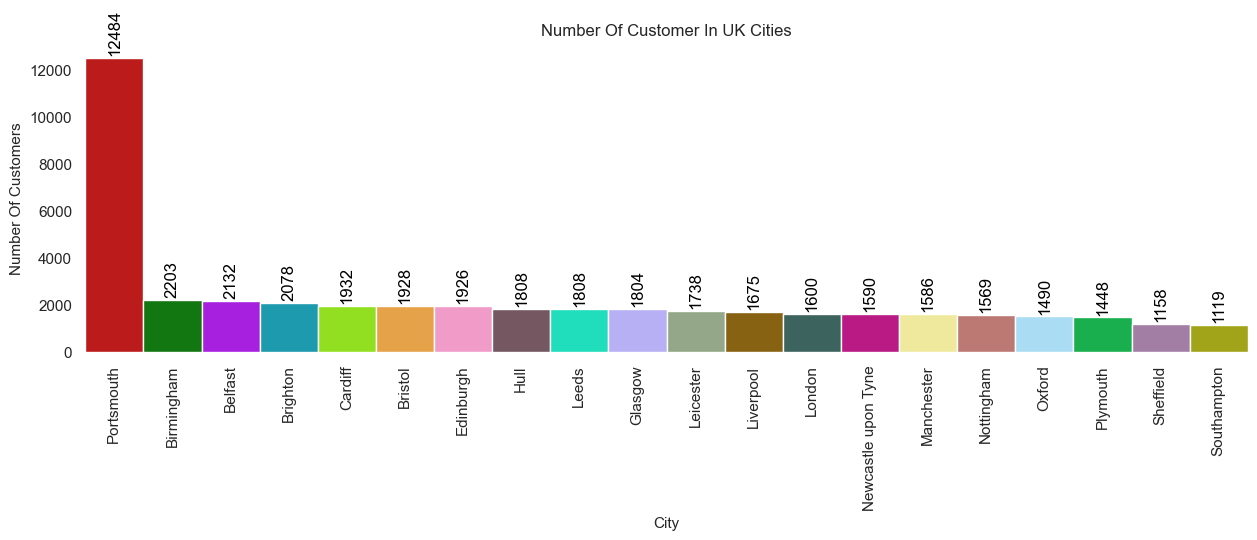

In [81]:
sns.set_theme(font_scale=1)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 4))
sns.barplot(data=customer_count_uk, y = 'Customer_Count' , x='City', ax=ax, palette = sns.color_palette(cc.glasbey_light, n_colors=51), width=1)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Number Of Customers", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=2, fmt='%.1d', color = 'Black', rotation = 90, fontsize = 12)
ax.set_title('Number Of Customer In UK Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

In [82]:
customer_count_germany = germany_data.groupby(['Country', 'City'],as_index=False, group_keys=False).agg(Customer_Count =('Customer_ID', 'nunique')).sort_values(by = 'Customer_Count', ascending = False)
customer_count_germany.style.set_properties(**{'background-color': 'white', 'color': 'green'})

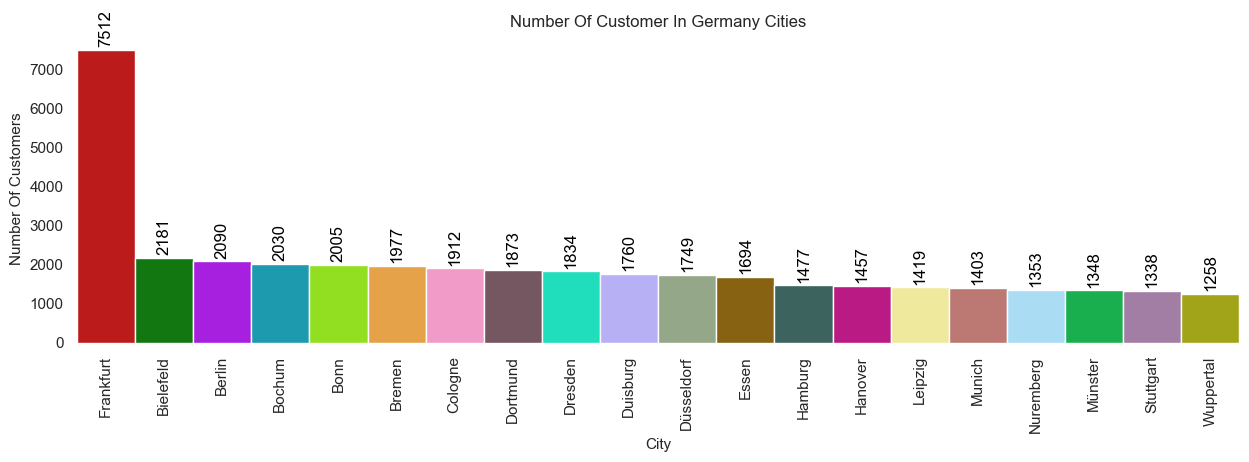

In [83]:
sns.set_theme(font_scale=1)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 4))
sns.barplot(data=customer_count_germany, y = 'Customer_Count' , x='City', ax=ax, palette = sns.color_palette(cc.glasbey_light, n_colors=51), width=1)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Number Of Customers", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=2, fmt='%.1d', color = 'black', rotation = 90, fontsize = 12)
ax.set_title('Number Of Customer In Germany Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

In [84]:
customer_count_australia = australia_data.groupby(['Country', 'City'],as_index=False, group_keys=False).agg(Customer_Count =('Customer_ID', 'nunique')).sort_values(by = 'Customer_Count', ascending = False)
customer_count_australia.style.set_properties(**{'background-color': 'white', 'color': 'green'})

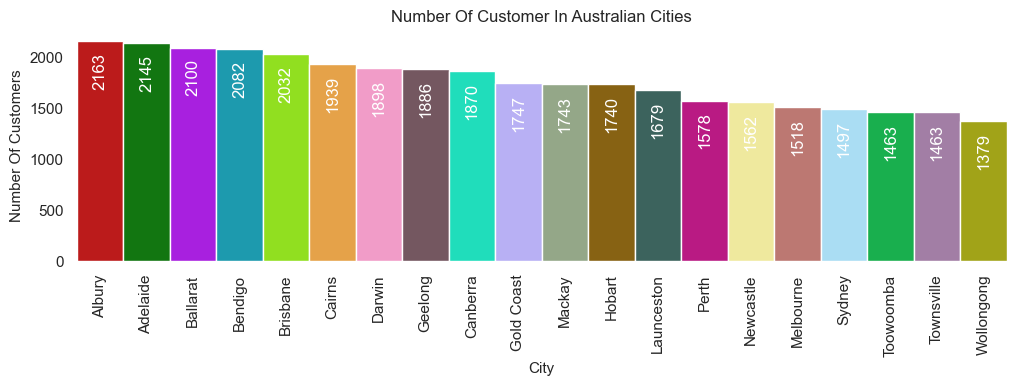

In [85]:
sns.set_theme(font_scale=1)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (12, 3))
sns.barplot(data=customer_count_australia, y = 'Customer_Count' , x='City', ax=ax, palette = sns.color_palette(cc.glasbey_light, n_colors=51), width=1)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Number Of Customers", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=-35, fmt='%.1d', color = 'white', rotation = 90, fontsize = 12)
ax.set_title('Number Of Customer In Australian Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

*2-Percentage Of Low Ratings In Each City By Country*

In [86]:
low = usa_data[(usa_data['Ratings'] == 1)| (usa_data['Ratings'] == 2)]
all_orders = usa_data.groupby(['Country','City'],as_index=False, group_keys=False).agg(NumberOfOrders = ('Customer_ID','count'))
low_ratings_usa = pd.DataFrame(low.groupby(['Country','City'],as_index=False).agg(LowRatings=('Ratings', 'count')))
low_ratings_usa = pd.merge(low_ratings_usa, all_orders, how='inner')
low_ratings_usa['LowRatingsPercentage'] = 100 * (low_ratings_usa['LowRatings'] / low_ratings_usa['NumberOfOrders'])
low_ratings_usa = low_ratings_usa.groupby(['Country', 'City'] ,as_index=False, group_keys=False).apply(lambda x:x.nlargest(1 , 'LowRatingsPercentage')).sort_values(by = 'LowRatingsPercentage', ascending = False)
low_ratings_usa.style \
    .format({'LowRatingsPercentage': "{:.2f}"}) \
    .set_properties(**{'background-color': 'white', 'color': 'green'})


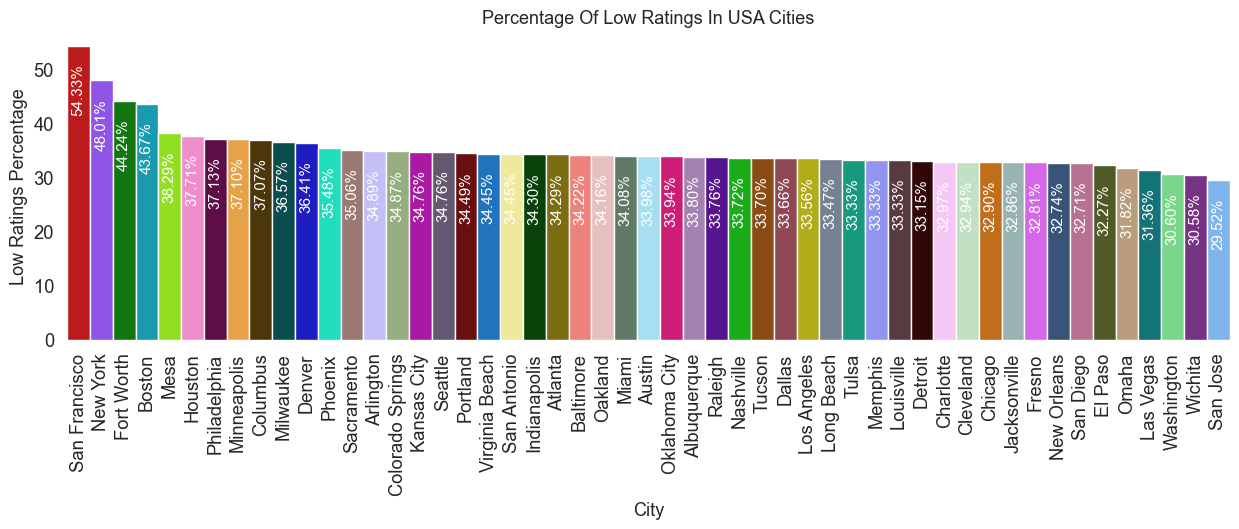

In [87]:
sns.set_theme(font_scale=1.2)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 4))
sns.barplot(data=low_ratings_usa, y = low_ratings_usa['LowRatingsPercentage'] , x='City', ax=ax, palette = sns.color_palette(cc.glasbey, n_colors=51), width=1)
ax.set_xlabel('City', fontsize=13)
ax.set_ylabel("Low Ratings Percentage", fontsize=13)
for i in ax.containers:
    ax.bar_label(i,  padding=-50, fmt='%.2f%%', color = 'white', rotation = 90, fontsize = 11)
ax.set_title('Percentage Of Low Ratings In USA Cities', fontsize = 13)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

In [88]:
low = canada_data[(canada_data['Ratings'] == 1)| (canada_data['Ratings'] == 2)]
all_orders = canada_data.groupby(['Country','City'],as_index=False, group_keys=False).agg(NumberOfOrders = ('Customer_ID','count'))
low_ratings_canada = pd.DataFrame(low.groupby(['Country','City'],as_index=False).agg(LowRatings=('Ratings', 'count')))
low_ratings_canada = pd.merge(low_ratings_canada, all_orders, how='inner')
low_ratings_canada['LowRatingsPercentage'] = 100 * (low_ratings_canada['LowRatings'] / low_ratings_canada['NumberOfOrders'])
low_ratings_canada = low_ratings_canada.groupby(['Country', 'City'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(1 , 'LowRatingsPercentage')).sort_values(by = 'LowRatingsPercentage', ascending = False)
low_ratings_canada.style \
    .format({'LowRatingsPercentage': "{:.2f}"}) \
    .set_properties(**{'background-color': 'white', 'color': 'green'})


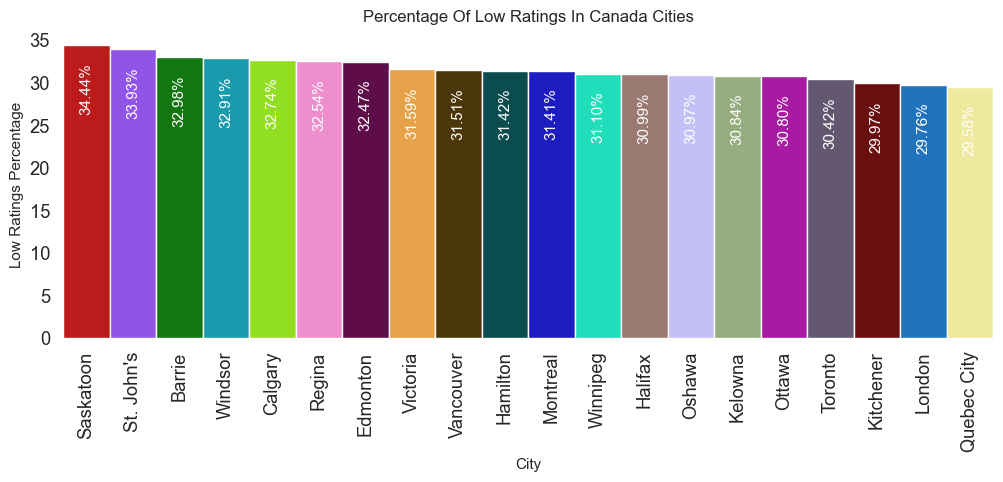

In [89]:
sns.set_theme(font_scale=1.2)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (12, 4))
sns.barplot(data=low_ratings_canada, y = low_ratings_canada['LowRatingsPercentage'] , x='City', ax=ax, palette = sns.color_palette(cc.glasbey, n_colors=20), width=1)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Low Ratings Percentage", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=-50, fmt='%.2f%%', color = 'white', rotation = 90, fontsize = 11)
ax.set_title('Percentage Of Low Ratings In Canada Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

In [90]:
low = germany_data[(germany_data['Ratings'] == 1)| (germany_data['Ratings'] == 2)]
all_orders = germany_data.groupby(['Country','City'],as_index=False, group_keys=False).agg(NumberOfOrders = ('Customer_ID','count'))
low_ratings_germany = pd.DataFrame(low.groupby(['Country','City'],as_index=False).agg(LowRatings=('Ratings', 'count')))
low_ratings_germany = pd.merge(low_ratings_germany, all_orders, how='inner')
low_ratings_germany['LowRatingsPercentage'] = 100 * (low_ratings_germany['LowRatings'] / low_ratings_germany['NumberOfOrders'])
low_ratings_germany = low_ratings_germany.groupby(['Country', 'City'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(1 , 'LowRatingsPercentage')).sort_values(by = 'LowRatingsPercentage', ascending = False)
low_ratings_germany.style \
    .format({'LowRatingsPercentage': "{:.2f}"}) \
    .set_properties(**{'background-color': 'white', 'color': 'green'})


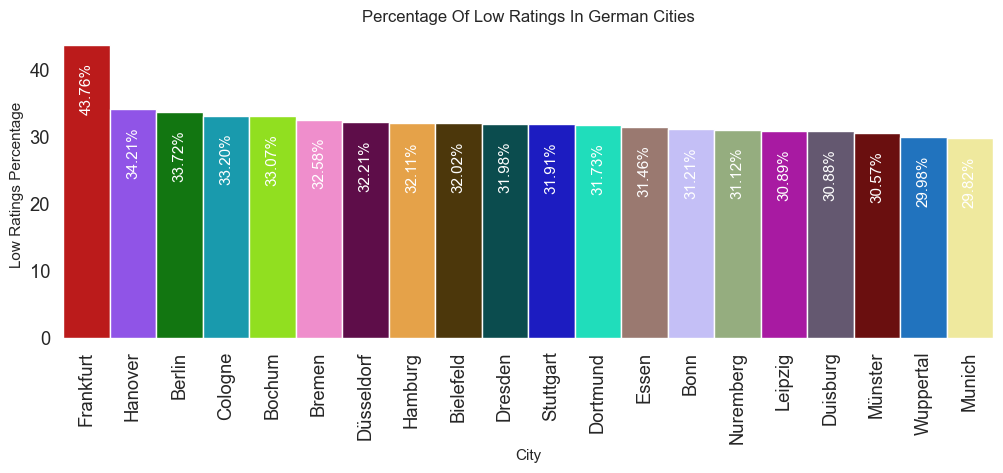

In [91]:
sns.set_theme(font_scale=1.2)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (12, 4))
sns.barplot(data=low_ratings_germany, y = low_ratings_germany['LowRatingsPercentage'] , x='City', ax=ax, palette = sns.color_palette(cc.glasbey, n_colors=20), width=1)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Low Ratings Percentage", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=-50, fmt='%.2f%%', color = 'white', rotation = 90, fontsize = 11)
ax.set_title('Percentage Of Low Ratings In German Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

In [92]:
low = uk_data[(uk_data['Ratings'] == 1)| (uk_data['Ratings'] == 2)]
all_orders = uk_data.groupby(['Country','City'],as_index=False, group_keys=False).agg(NumberOfOrders = ('Customer_ID','count'))
low_ratings_uk = pd.DataFrame(low.groupby(['Country','City'],as_index=False).agg(LowRatings=('Ratings', 'count')))
low_ratings_uk = pd.merge(low_ratings_uk, all_orders, how='inner')
low_ratings_uk['LowRatingsPercentage'] = 100 * (low_ratings_uk['LowRatings'] / low_ratings_uk['NumberOfOrders'])
low_ratings_uk = low_ratings_uk.groupby(['Country', 'City'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(1 , 'LowRatingsPercentage')).sort_values(by = 'LowRatingsPercentage', ascending = False)
low_ratings_uk.style \
    .format({'LowRatingsPercentage': "{:.2f}"}) \
    .set_properties(**{'background-color': 'white', 'color': 'green'})


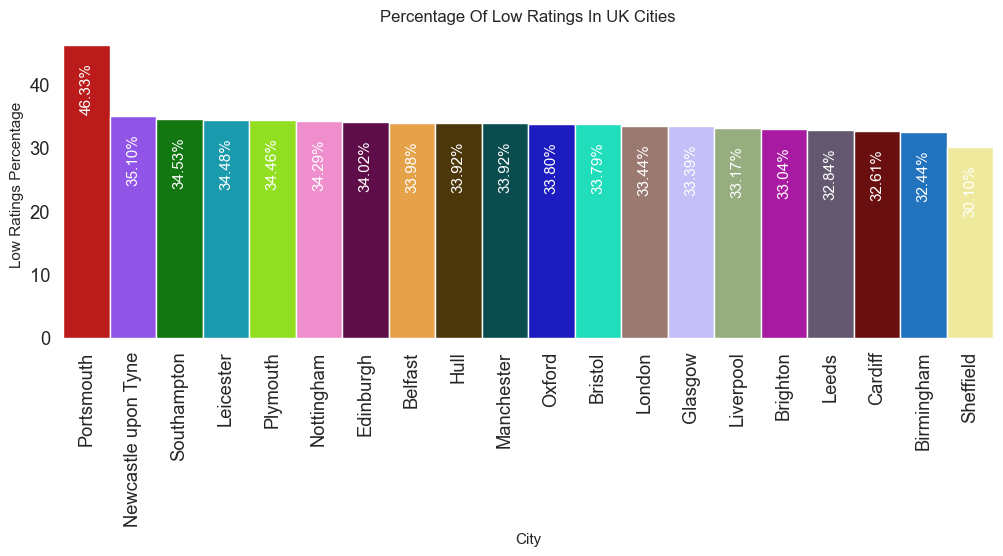

In [93]:
sns.set_theme(font_scale=1.2)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (12, 4))
sns.barplot(data=low_ratings_uk, y = low_ratings_uk['LowRatingsPercentage'] , x='City', ax=ax, palette = sns.color_palette(cc.glasbey, n_colors=20), width=1)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Low Ratings Percentage", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=-50, fmt='%.2f%%', color = 'white', rotation = 90, fontsize = 11)
ax.set_title('Percentage Of Low Ratings In UK Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

In [94]:
low = australia_data[(australia_data['Ratings'] == 1)| (australia_data['Ratings'] == 2)]
all_orders = australia_data.groupby(['Country','City'],as_index=False, group_keys=False).agg(NumberOfOrders = ('Customer_ID','count'))
low_ratings_australia = pd.DataFrame(low.groupby(['Country','City'],as_index=False).agg(LowRatings=('Ratings', 'count')))
low_ratings_australia = pd.merge(low_ratings_australia, all_orders, how='inner')
low_ratings_australia['LowRatingsPercentage'] = 100 * (low_ratings_australia['LowRatings'] / low_ratings_australia['NumberOfOrders'])
low_ratings_australia = low_ratings_australia.groupby(['Country', 'City'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(1 , 'LowRatingsPercentage')).sort_values(by = 'LowRatingsPercentage', ascending = False)
low_ratings_australia.style \
    .format({'LowRatingsPercentage': "{:.2f}"}) \
    .set_properties(**{'background-color': 'white', 'color': 'green'})


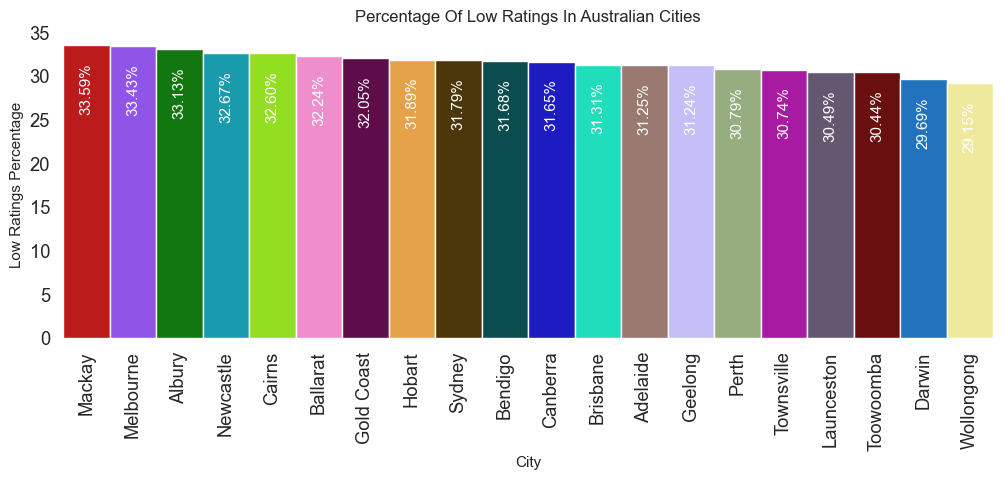

In [95]:
sns.set_theme(font_scale=1.2)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (12, 4))
sns.barplot(data=low_ratings_australia, y = low_ratings_australia['LowRatingsPercentage'] , x='City', ax=ax, palette = sns.color_palette(cc.glasbey, n_colors=20), width=1)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Low Ratings Percentage", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=-50, fmt='%.2f%%', color = 'white', rotation = 90, fontsize = 11)
ax.set_title('Percentage Of Low Ratings In Australian Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

*3-Percentage Of Pending Orderss In Each City By Country*

In [96]:
order_pending = usa_data[(usa_data['Order_Status'] == 'Pending')]
all_orders = usa_data.groupby(['Country','City'],as_index=False, group_keys=False).agg(NumberOfOrders = ('Customer_ID','count'))
pending_orders_usa = pd.DataFrame(order_pending.groupby(['Country','City'],as_index=False).agg(PendingOrders=('Order_Status', 'count')))
pending_orders_usa = pd.merge(pending_orders_usa, all_orders, how='inner')
pending_orders_usa['PendingOrdersPercentage'] = 100 * (pending_orders_usa['PendingOrders'] / pending_orders_usa['NumberOfOrders'])
pending_orders_usa = pending_orders_usa.groupby(['Country', 'City'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(1 , 'PendingOrdersPercentage')).sort_values(by = 'PendingOrdersPercentage', ascending = False)
pending_orders_usa.style \
    .format({'PendingOrdersPercentage': "{:.2f}"}) \
    .set_properties(**{'background-color': 'white', 'color': 'green'})

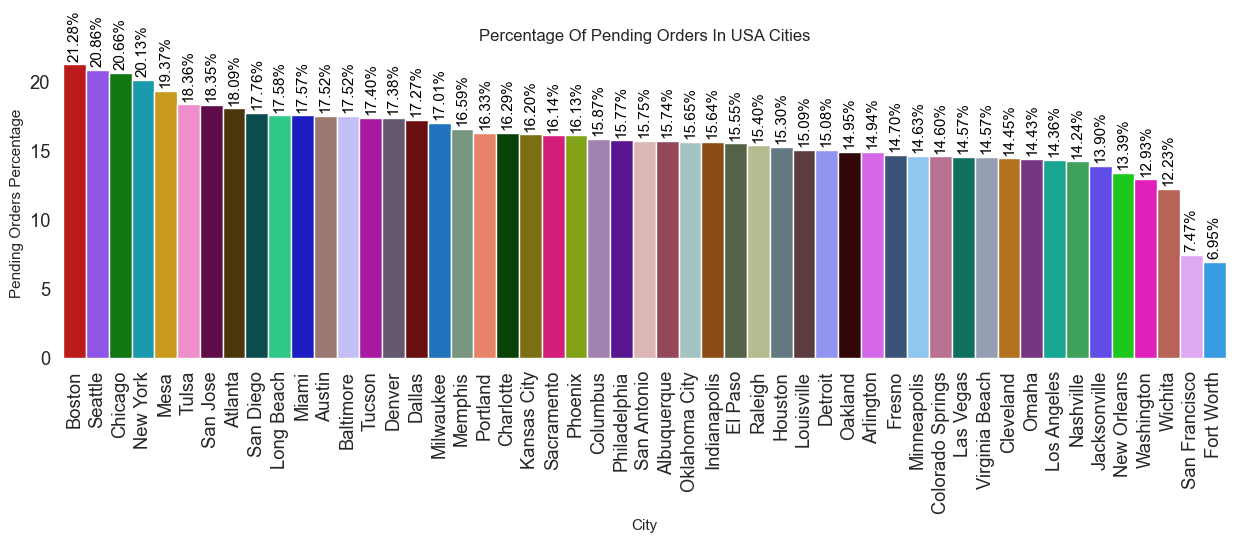

In [97]:
sns.set_theme(font_scale=1.2)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 4))
sns.barplot(data=pending_orders_usa, y = 'PendingOrdersPercentage' , x='City', ax=ax, palette = sns.color_palette(cc.glasbey_dark, n_colors=51), width=1)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Pending Orders Percentage", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=2, fmt='%.2f%%', color = 'black', rotation = 90, fontsize = 11)
ax.set_title('Percentage Of Pending Orders In USA Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

In [98]:
order_pending = canada_data[(canada_data['Order_Status'] == 'Pending')]
all_orders = canada_data.groupby(['Country','City'],as_index=False, group_keys=False).agg(NumberOfOrders = ('Customer_ID','count'))
pending_orders_canada = pd.DataFrame(order_pending.groupby(['Country','City'],as_index=False).agg(PendingOrders=('Order_Status', 'count')))
pending_orders_canada = pd.merge(pending_orders_canada, all_orders, how='inner')
pending_orders_canada['PendingOrdersPercentage'] = 100 * (pending_orders_canada['PendingOrders'] / pending_orders_canada['NumberOfOrders'])
pending_orders_canada = pending_orders_canada.groupby(['Country', 'City'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(1 , 'PendingOrdersPercentage')).sort_values(by = 'PendingOrdersPercentage', ascending = False)
pending_orders_canada.style \
    .format({'PendingOrdersPercentage': "{:.2f}"}) \
    .set_properties(**{'background-color': 'white', 'color': 'green'})


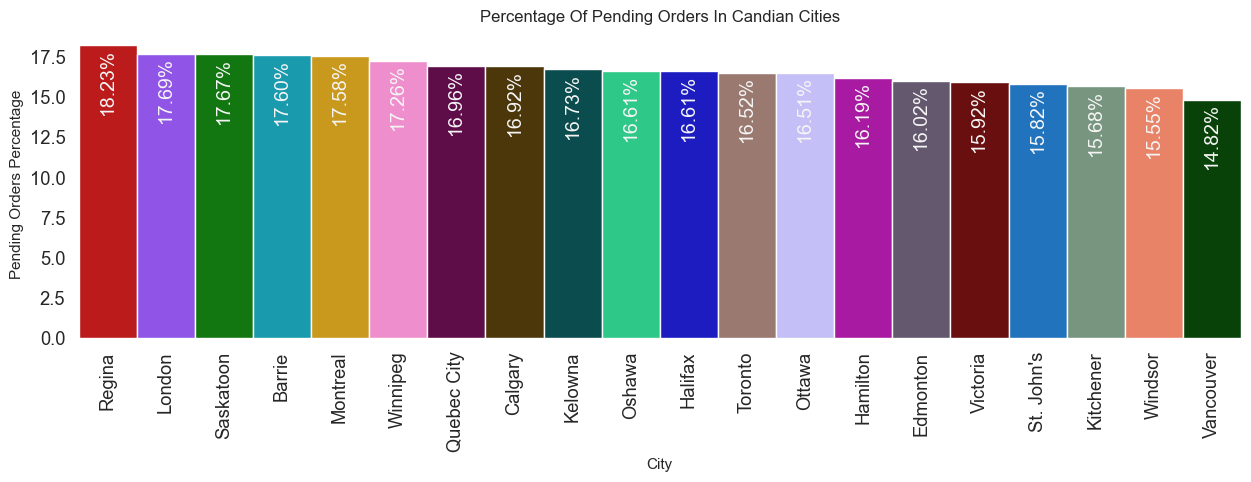

In [99]:
sns.set_theme(font_scale=1.2)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 4))
sns.barplot(data=pending_orders_canada, y = 'PendingOrdersPercentage' , x='City', ax=ax, palette = sns.color_palette(cc.glasbey_dark, n_colors=51), width=1)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Pending Orders Percentage", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=-50, fmt='%.2f%%', color = 'whitesmoke', rotation = 90, fontsize = 14)
ax.set_title('Percentage Of Pending Orders In Candian Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

In [100]:
order_pending = germany_data[(germany_data['Order_Status'] == 'Pending')]
all_orders = germany_data.groupby(['Country','City'],as_index=False, group_keys=False).agg(NumberOfOrders = ('Customer_ID','count'))
pending_orders_germany = pd.DataFrame(order_pending.groupby(['Country','City'],as_index=False).agg(PendingOrders=('Order_Status', 'count')))
pending_orders_germany = pd.merge(pending_orders_germany, all_orders, how='inner')
pending_orders_germany['PendingOrdersPercentage'] = 100 * (pending_orders_germany['PendingOrders'] / pending_orders_germany['NumberOfOrders'])
pending_orders_germany = pending_orders_germany.groupby(['Country', 'City'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(1 , 'PendingOrdersPercentage')).sort_values(by = 'PendingOrdersPercentage', ascending = False)
pending_orders_germany.style \
    .format({'PendingOrdersPercentage': "{:.2f}"}) \
    .set_properties(**{'background-color': 'white', 'color': 'green'})


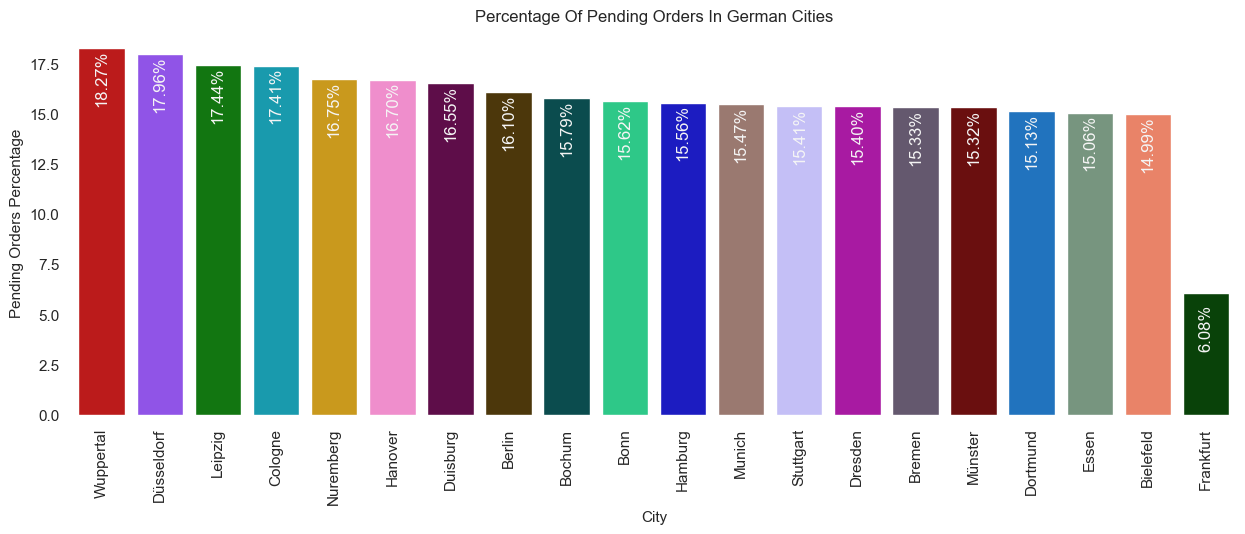

In [101]:
sns.set_theme(font_scale=1)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot(data=pending_orders_germany, y = 'PendingOrdersPercentage' , x='City', ax=ax, palette = sns.color_palette(cc.glasbey_dark, n_colors=20), width=0.8)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Pending Orders Percentage", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=-42, fmt='%.2f%%', color = 'whitesmoke', rotation = 90, fontsize = 12)
ax.set_title('Percentage Of Pending Orders In German Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

In [102]:
order_pending = uk_data[(uk_data['Order_Status'] == 'Pending')]
all_orders = uk_data.groupby(['Country','City'],as_index=False, group_keys=False).agg(NumberOfOrders = ('Customer_ID','count'))
pending_orders_uk = pd.DataFrame(order_pending.groupby(['Country','City'],as_index=False).agg(PendingOrders=('Order_Status', 'count')))
pending_orders_uk = pd.merge(pending_orders_uk, all_orders, how='inner')
pending_orders_uk['PendingOrdersPercentage'] = 100 * (pending_orders_uk['PendingOrders'] / pending_orders_uk['NumberOfOrders'])
pending_orders_uk = pending_orders_uk.groupby(['Country', 'City'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(1 , 'PendingOrdersPercentage')).sort_values(by = 'PendingOrdersPercentage', ascending = False)
pending_orders_uk.style \
    .format({'PendingOrdersPercentage': "{:.2f}"}) \
    .set_properties(**{'background-color': 'white', 'color': 'green'})


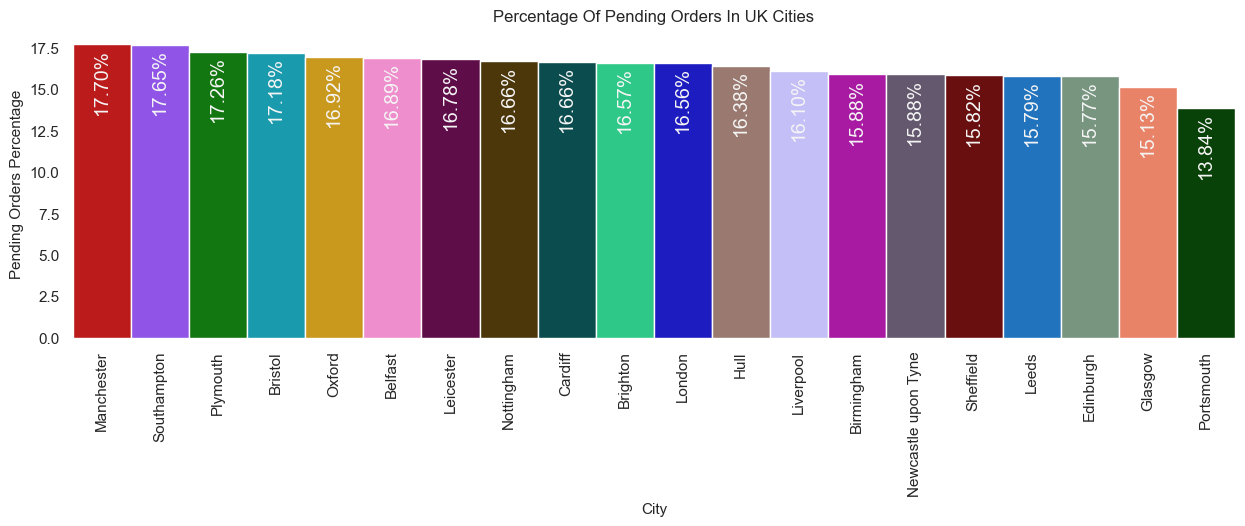

In [103]:
sns.set_theme(font_scale=1)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 4))
sns.barplot(data=pending_orders_uk, y = 'PendingOrdersPercentage' , x='City', ax=ax, palette = sns.color_palette(cc.glasbey_dark, n_colors=51), width=1)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Pending Orders Percentage", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=-50, fmt='%.2f%%', color = 'whitesmoke', rotation = 90, fontsize = 14)
ax.set_title('Percentage Of Pending Orders In UK Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

In [104]:
order_pending = australia_data[(australia_data['Order_Status'] == 'Pending')]
all_orders = australia_data.groupby(['Country','City'],as_index=False, group_keys=False).agg(NumberOfOrders = ('Customer_ID','count'))
pending_orders_australia = pd.DataFrame(order_pending.groupby(['Country','City'],as_index=False).agg(PendingOrders=('Order_Status', 'count')))
pending_orders_australia = pd.merge(pending_orders_australia, all_orders, how='inner')
pending_orders_australia['PendingOrdersPercentage'] = 100 * (pending_orders_australia['PendingOrders'] / pending_orders_australia['NumberOfOrders'])
pending_orders_australia = pending_orders_australia.groupby(['Country', 'City'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(1 , 'PendingOrdersPercentage')).sort_values(by = 'PendingOrdersPercentage', ascending = False)
pending_orders_australia.style \
    .format({'PendingOrdersPercentage': "{:.2f}"}) \
    .set_properties(**{'background-color': 'white', 'color': 'green'})


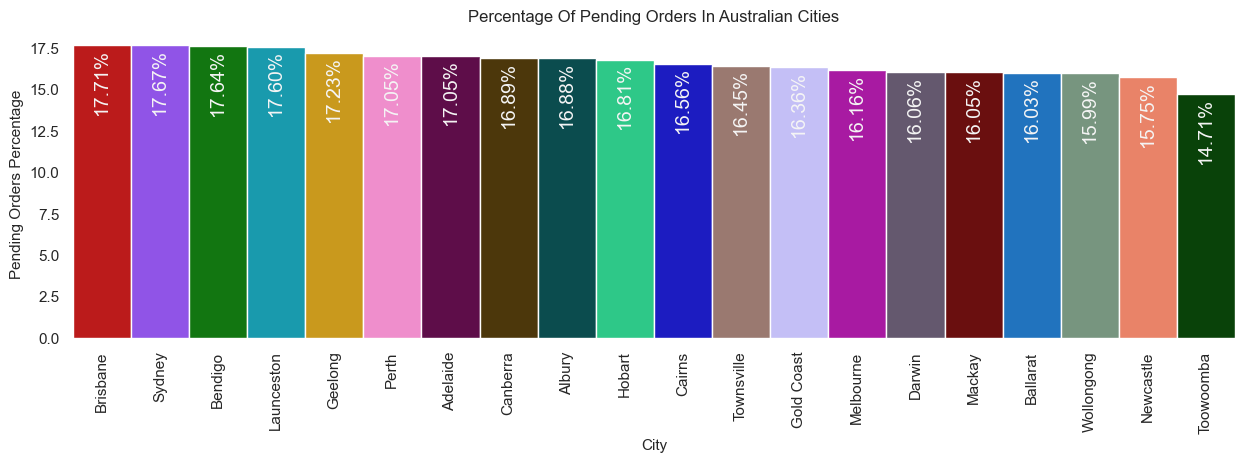

In [105]:
sns.set_theme(font_scale=1)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 4))
sns.barplot(data=pending_orders_australia, y = 'PendingOrdersPercentage' , x='City', ax=ax, palette = sns.color_palette(cc.glasbey_dark, n_colors=51), width=1)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Pending Orders Percentage", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=-50, fmt='%.2f%%', color = 'whitesmoke', rotation = 90, fontsize = 14)
ax.set_title('Percentage Of Pending Orders In Australian Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

*4-Preferred Day In Each City By Country*

In [106]:
all_orders = usa_data.groupby(['Country','City'],as_index=False, group_keys=False).agg(NumberOfOrders = ('Customer_ID','count'))
preferred_day_usa = pd.DataFrame(usa_data.groupby(['Country','City', 'Day'],as_index=False).agg(DayOrders=('Customer_ID', 'count')))
preferred_day_usa = pd.merge(preferred_day_usa, all_orders, how='inner')
preferred_day_usa['DayOrdersPercentage'] = 100 * (preferred_day_usa['DayOrders'] / preferred_day_usa['NumberOfOrders'])
preferred_day_usa = preferred_day_usa.groupby(['Country', 'City'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(1 , 'DayOrdersPercentage')).sort_values(by = 'Day', ascending = False)
preferred_day_usa.style \
     .format({'DayOrdersPercentage': "{:.2f}"}) \
     .set_properties(**{'background-color': 'white', 'color': 'green'})


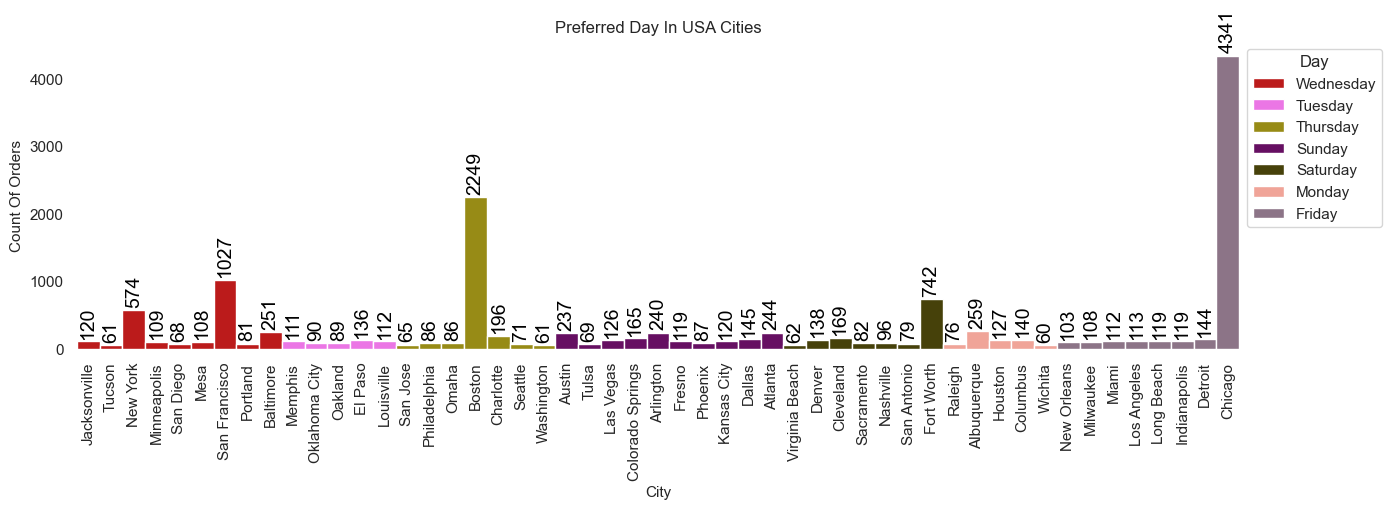

In [107]:
sns.set_theme(font_scale=1)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 4))
sns.barplot(data=preferred_day_usa, y = 'DayOrders' , x='City', hue='Day' ,ax=ax, palette = sns.color_palette(cc.glasbey_warm, n_colors=7), width=1)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Count Of Orders", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=2, fmt='%.2d', color = 'black', rotation = 90, fontsize = 14)
ax.set_title('Preferred Day In USA Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

In [108]:
all_orders = canada_data.groupby(['Country','City'],as_index=False, group_keys=False).agg(NumberOfOrders = ('Customer_ID','count'))
preferred_day_canada = pd.DataFrame(canada_data.groupby(['Country','City', 'Day'],as_index=False).agg(DayOrders=('Customer_ID', 'count')))
preferred_day_canada = pd.merge(preferred_day_canada, all_orders, how='inner')
preferred_day_canada['DayOrdersPercentage'] = 100 * (preferred_day_canada['DayOrders'] / preferred_day_canada['NumberOfOrders'])
preferred_day_canada = preferred_day_canada.groupby(['Country', 'City'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(1 , 'DayOrdersPercentage')).sort_values(by = 'Day', ascending = False)
preferred_day_canada.style \
     .format({'DayOrdersPercentage': "{:.2f}"}) \
     .set_properties(**{'background-color': 'white', 'color': 'green'})


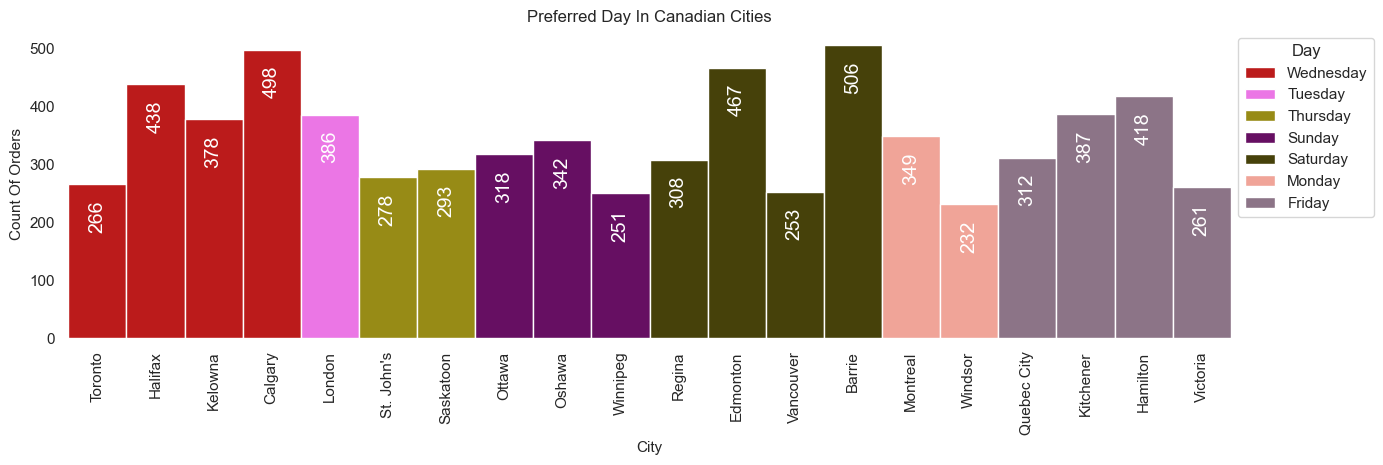

In [109]:
sns.set_theme(font_scale=1)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 4))
sns.barplot(data=preferred_day_canada, y = 'DayOrders' , x='City', hue='Day' ,ax=ax, palette = sns.color_palette(cc.glasbey_warm, n_colors=7), width=1)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Count Of Orders", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=-35, fmt='%.2d', color = 'white', rotation = 90, fontsize = 14)
ax.set_title('Preferred Day In Canadian Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

In [110]:
all_orders = germany_data.groupby(['Country','City'],as_index=False, group_keys=False).agg(NumberOfOrders = ('Customer_ID','count'))
preferred_day_germany = pd.DataFrame(germany_data.groupby(['Country','City', 'Day'],as_index=False).agg(DayOrders=('Customer_ID', 'count')))
preferred_day_germany = pd.merge(preferred_day_germany, all_orders, how='inner')
preferred_day_germany['DayOrdersPercentage'] = 100 * (preferred_day_germany['DayOrders'] / preferred_day_germany['NumberOfOrders'])
preferred_day_germany = preferred_day_germany.groupby(['Country', 'City'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(1 , 'DayOrdersPercentage')).sort_values(by = 'Day', ascending = False)
preferred_day_germany.style \
     .format({'DayOrdersPercentage': "{:.2f}"}) \
     .set_properties(**{'background-color': 'white', 'color': 'green'})


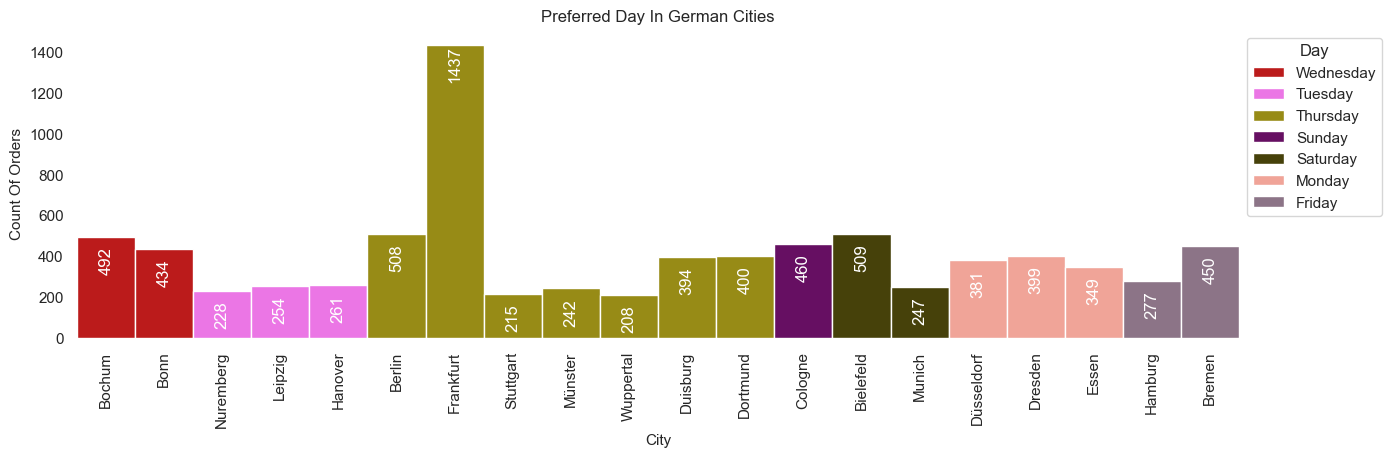

In [111]:
sns.set_theme(font_scale=1)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 4))
sns.barplot(data=preferred_day_germany, y = 'DayOrders' , x='City', hue='Day' ,ax=ax, palette = sns.color_palette(cc.glasbey_warm, n_colors=7), width=1)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Count Of Orders", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=-27, fmt='%.2d', color = 'white', rotation = 90, fontsize = 12)
ax.set_title('Preferred Day In German Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

In [112]:
all_orders = uk_data.groupby(['Country','City'],as_index=False, group_keys=False).agg(NumberOfOrders = ('Customer_ID','count'))
preferred_day_uk = pd.DataFrame(uk_data.groupby(['Country','City', 'Day'],as_index=False).agg(DayOrders=('Customer_ID', 'count')))
preferred_day_uk = pd.merge(preferred_day_uk, all_orders, how='inner')
preferred_day_uk['DayOrdersPercentage'] = 100 * (preferred_day_uk['DayOrders'] / preferred_day_uk['NumberOfOrders'])
preferred_day_uk = preferred_day_uk.groupby(['Country', 'City'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(1 , 'DayOrdersPercentage')).sort_values(by = 'Day', ascending = False)
preferred_day_uk.style \
     .format({'DayOrdersPercentage': "{:.2f}"}) \
     .set_properties(**{'background-color': 'white', 'color': 'green'})


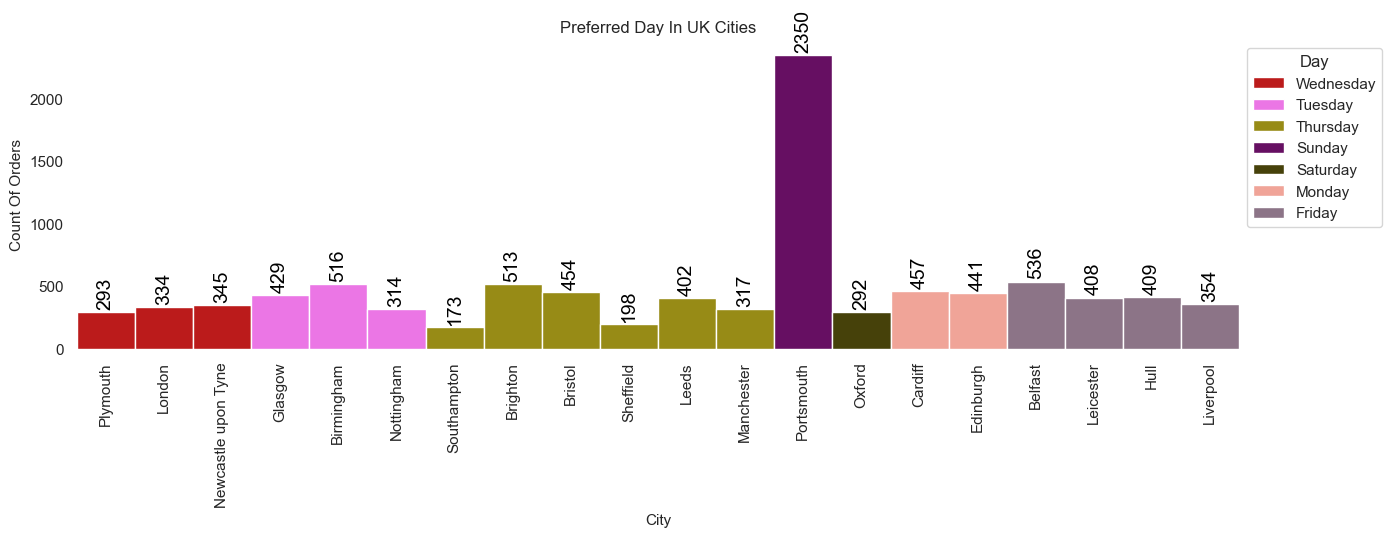

In [113]:
sns.set_theme(font_scale=1)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 4))
sns.barplot(data=preferred_day_uk, y = 'DayOrders' , x='City', hue='Day' ,ax=ax, palette = sns.color_palette(cc.glasbey_warm, n_colors=7), width=1)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Count Of Orders", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=2, fmt='%.2d', color = 'black', rotation = 90, fontsize = 14)
ax.set_title('Preferred Day In UK Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

In [114]:
all_orders = australia_data.groupby(['Country','City'],as_index=False, group_keys=False).agg(NumberOfOrders = ('Customer_ID','count'))
preferred_day_australia = pd.DataFrame(australia_data.groupby(['Country','City', 'Day'],as_index=False).agg(DayOrders=('Customer_ID', 'count')))
preferred_day_australia = pd.merge(preferred_day_australia, all_orders, how='inner')
preferred_day_australia['DayOrdersPercentage'] = 100 * (preferred_day_australia['DayOrders'] / preferred_day_australia['NumberOfOrders'])
preferred_day_australia = preferred_day_australia.groupby(['Country', 'City'],as_index=False, group_keys=False).apply(lambda x:x.nlargest(1 , 'DayOrdersPercentage')).sort_values(by = 'Day', ascending = False)
preferred_day_australia.style \
     .format({'DayOrdersPercentage': "{:.2f}"}) \
     .set_properties(**{'background-color': 'white', 'color': 'green'})


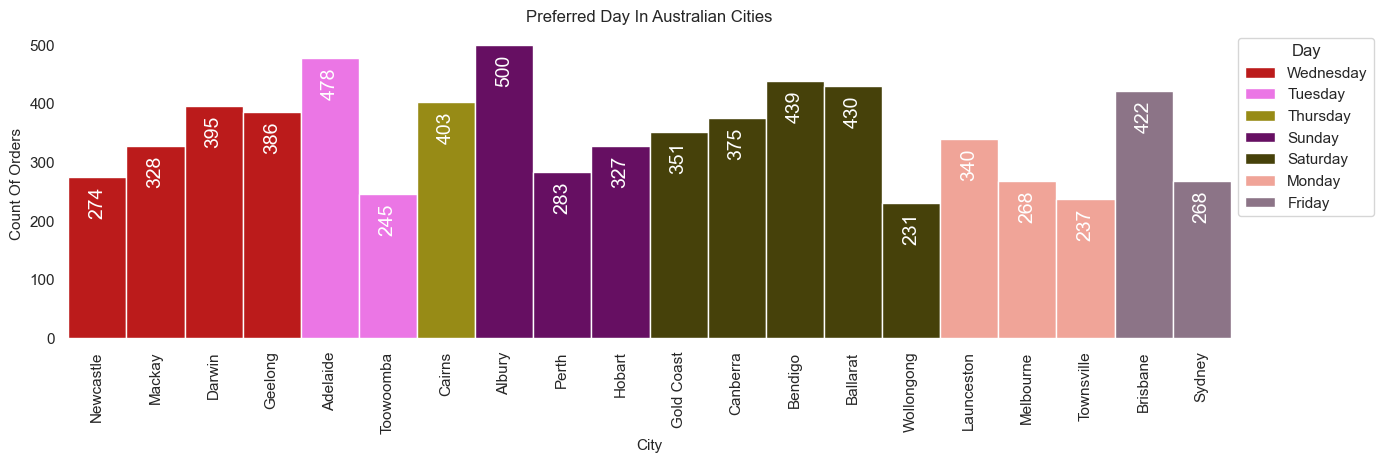

In [115]:
sns.set_theme(font_scale=1)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 4))
sns.barplot(data=preferred_day_australia, y = 'DayOrders' , x='City', hue='Day' ,ax=ax, palette = sns.color_palette(cc.glasbey_warm, n_colors=7), width=1)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Count Of Orders", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=-30, fmt='%.2d', color = 'white', rotation = 90, fontsize = 14)
ax.set_title('Preferred Day In Australian Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

*5-Total Amount Of Each City By Country*

In [116]:
total_amount_usa = usa_data.groupby(['Country', 'City'],as_index=False, group_keys=False).agg(TotalAmount =('Total_Amount', 'sum')).sort_values(by = 'TotalAmount', ascending = False)
total_amount_usa['TotalAmount'] = total_amount_usa['TotalAmount'].astype(int)
total_amount_usa.style.set_properties(**{'background-color': 'white', 'color': 'green'})

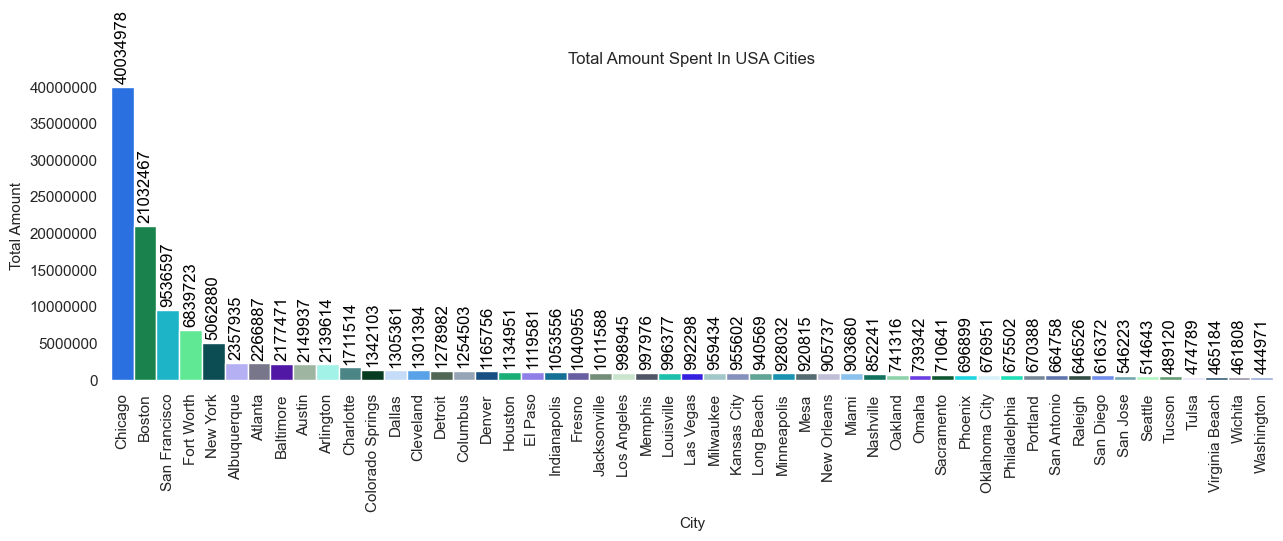

In [117]:
sns.set_theme(font_scale=1)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 4))
sns.barplot(data=total_amount_usa, y = 'TotalAmount' , x='City', ax=ax, palette = sns.color_palette(cc.glasbey_cool, n_colors=51), width=1)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Total Amount", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=2, fmt='%.1d', color = 'Black', rotation = 90, fontsize = 12)
ax.set_title('Total Amount Spent In USA Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

In [118]:
total_amount_canada = canada_data.groupby(['Country', 'City'],as_index=False, group_keys=False).agg(TotalAmount =('Total_Amount', 'sum')).sort_values(by = 'TotalAmount', ascending = False)
total_amount_canada['TotalAmount'] = total_amount_canada['TotalAmount'].astype(int)
total_amount_canada.style.set_properties(**{'background-color': 'white', 'color': 'green'})

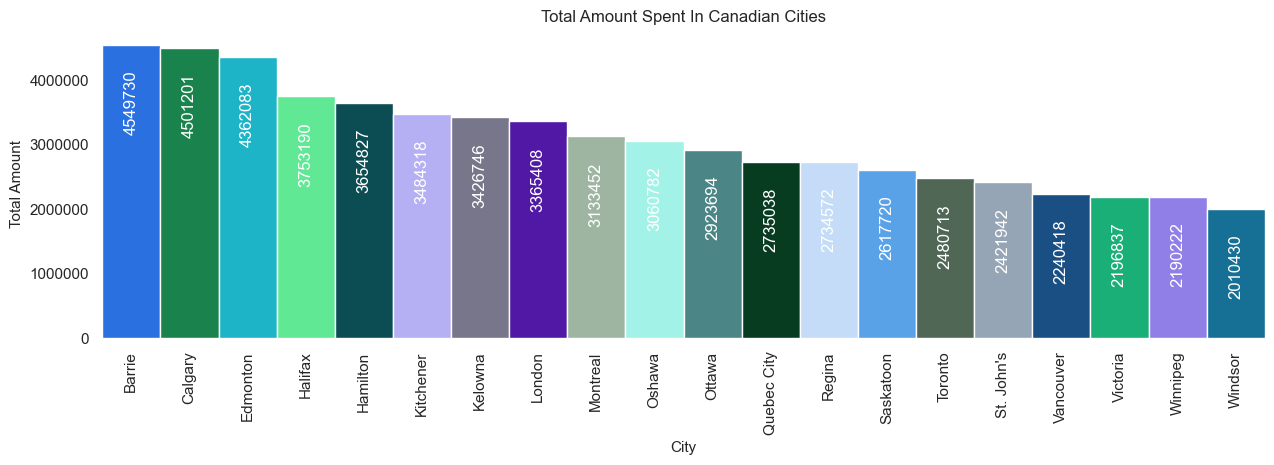

In [119]:
sns.set_theme(font_scale=1)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 4))
sns.barplot(data=total_amount_canada, y = 'TotalAmount' , x='City', ax=ax, palette = sns.color_palette(cc.glasbey_cool, n_colors=51), width=1)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Total Amount", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=-65, fmt='%.1d', color = 'white', rotation = 90, fontsize = 12)
ax.set_title('Total Amount Spent In Canadian Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

In [120]:
total_amount_germany = germany_data.groupby(['Country', 'City'],as_index=False, group_keys=False).agg(TotalAmount =('Total_Amount', 'sum')).sort_values(by = 'TotalAmount', ascending = False)
total_amount_germany['TotalAmount'] = total_amount_germany['TotalAmount'].astype(int)
total_amount_germany.style.set_properties(**{'background-color': 'white', 'color': 'green'})

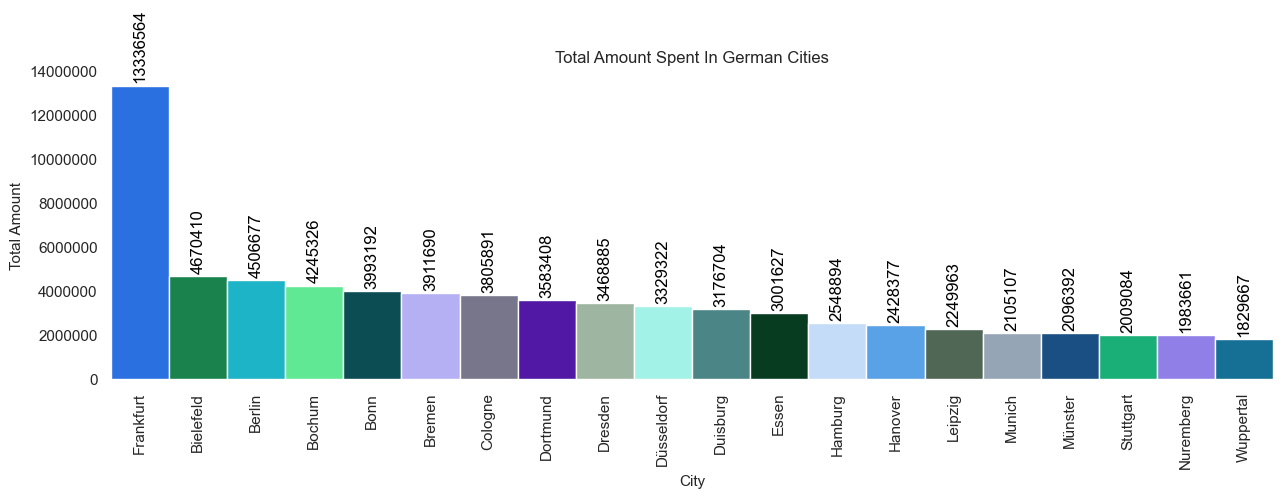

In [121]:
sns.set_theme(font_scale=1)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 4))
sns.barplot(data=total_amount_germany, y = 'TotalAmount' , x='City', ax=ax, palette = sns.color_palette(cc.glasbey_cool, n_colors=51), width=1)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Total Amount", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=2, fmt='%.1d', color = 'black', rotation = 90, fontsize = 12)
ax.set_title('Total Amount Spent In German Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

In [122]:
total_amount_uk = uk_data.groupby(['Country', 'City'],as_index=False, group_keys=False).agg(TotalAmount =('Total_Amount', 'sum')).sort_values(by = 'TotalAmount', ascending = False)
total_amount_uk['TotalAmount'] = total_amount_uk['TotalAmount'].astype(int)
total_amount_uk.style.set_properties(**{'background-color': 'white', 'color': 'green'})

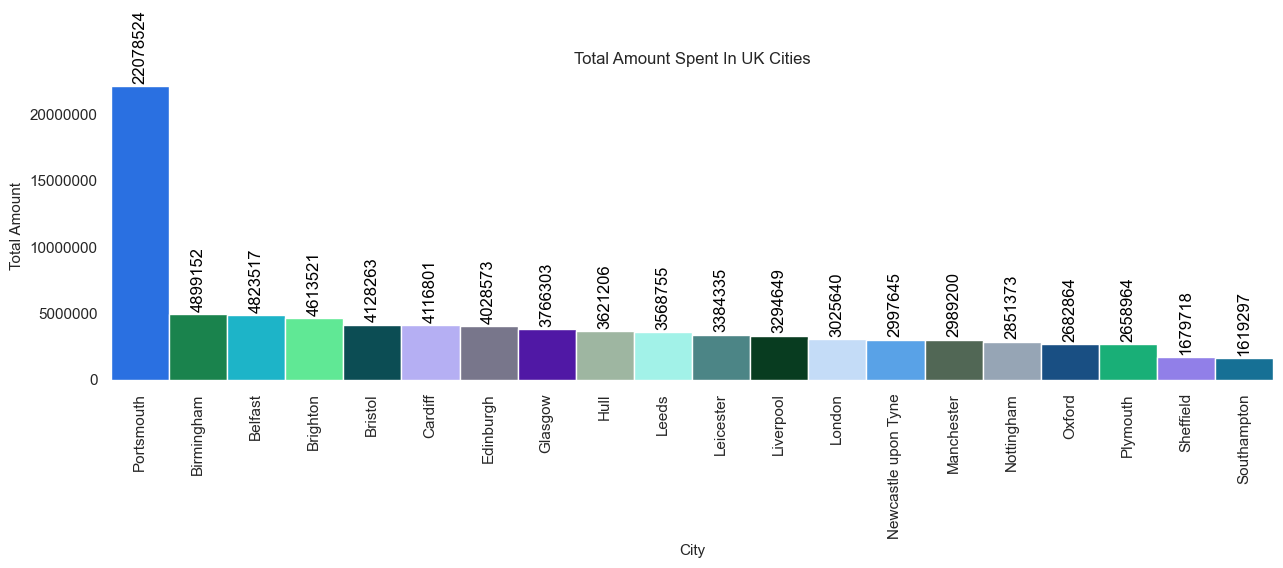

In [123]:
sns.set_theme(font_scale=1)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 4))
sns.barplot(data=total_amount_uk, y = 'TotalAmount' , x='City', ax=ax, palette = sns.color_palette(cc.glasbey_cool, n_colors=51), width=1)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Total Amount", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=2, fmt='%.1d', color = 'black', rotation = 90, fontsize = 12)
ax.set_title('Total Amount Spent In UK Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

In [124]:
total_amount_australia = australia_data.groupby(['Country', 'City'],as_index=False, group_keys=False).agg(TotalAmount =('Total_Amount', 'sum')).sort_values(by = 'TotalAmount', ascending = False)
total_amount_australia['TotalAmount'] = total_amount_australia['TotalAmount'].astype(int)
total_amount_australia.style.set_properties(**{'background-color': 'white', 'color': 'green'})

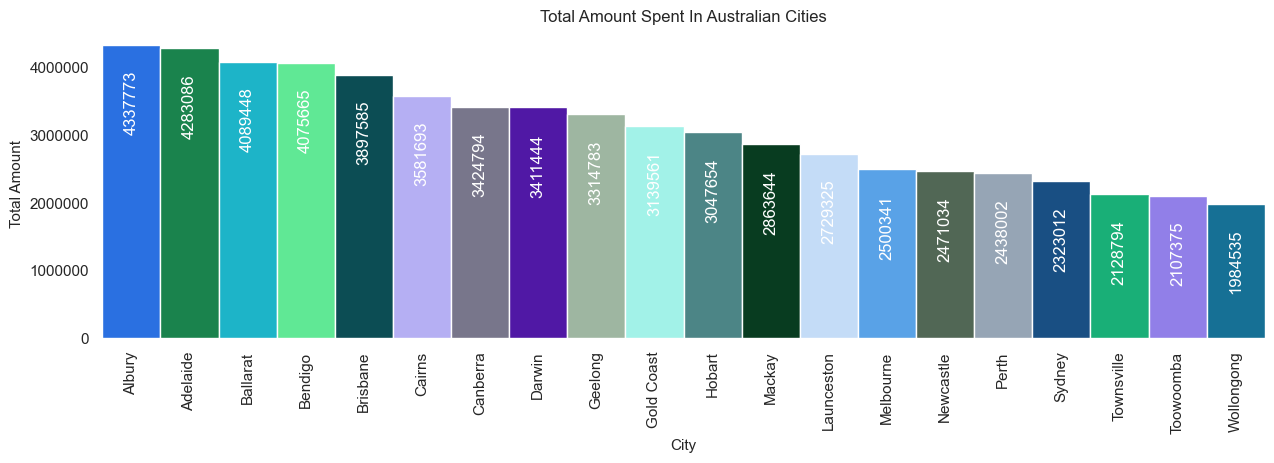

In [125]:
sns.set_theme(font_scale=1)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 4))
sns.barplot(data=total_amount_australia, y = 'TotalAmount' , x='City', ax=ax, palette = sns.color_palette(cc.glasbey_cool, n_colors=51), width=1)
ax.set_xlabel('City', fontsize=11)
ax.set_ylabel("Total Amount", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=-65, fmt='%.1d', color = 'white', rotation = 90, fontsize = 12)
ax.set_title('Total Amount Spent In Australian Cities', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(bottom = True, left = True);

*6-Gender Total Amount, Total Orders, Total Quantity By Country*

In [126]:
gender_total = clean_df.groupby(['Country', 'Gender'],as_index=False, group_keys=False).agg(TotalAmount = ('Total_Amount','sum'), TotalOrders  = ('Customer_ID','count'), TotalQuantity  = ('Quantity','sum')).sort_values(by = 'Country', ascending = True)
gender_total['TotalAmount'] = gender_total['TotalAmount'].astype(int)
gender_total.style.set_properties(**{'background-color': 'white', 'color': 'green'})

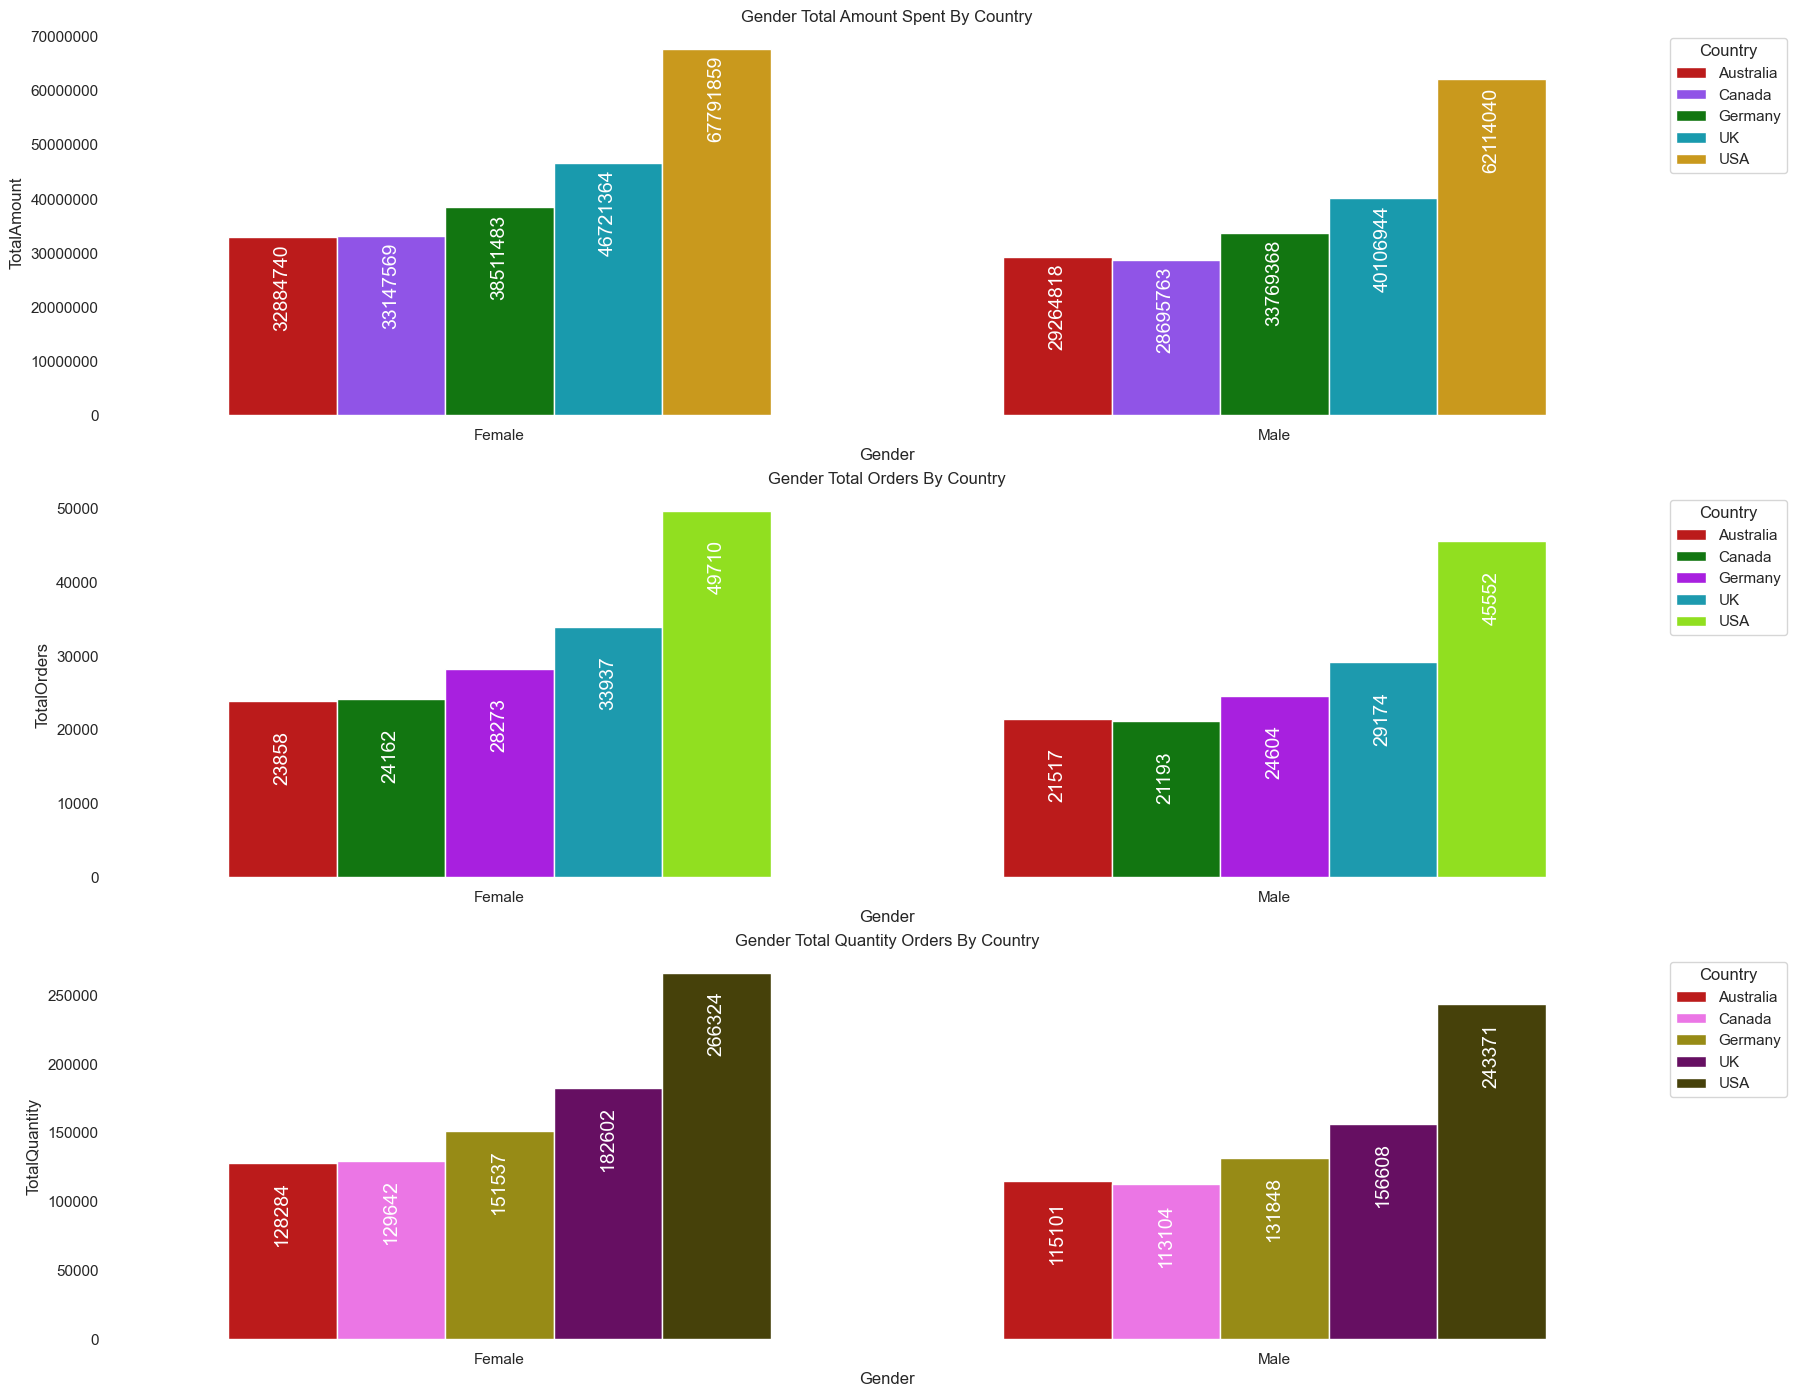

In [127]:
sns.set_theme(font_scale=1)
sns.set_style('white')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows = 3, figsize = (20, 17))
sns.barplot(data=gender_total, x = 'Gender' , y='TotalAmount',   hue='Country', ax=ax1, palette = sns.color_palette(cc.glasbey_dark, n_colors=5), width=0.7)
sns.barplot(data=gender_total, x = 'Gender' , y='TotalOrders',   hue='Country', ax=ax2, palette = sns.color_palette(cc.glasbey_light, n_colors=5), width=0.7)
sns.barplot(data=gender_total, x = 'Gender' , y='TotalQuantity', hue='Country', ax=ax3, palette = sns.color_palette(cc.glasbey_warm, n_colors=5), width=0.7)

for i in ax1.containers:
    ax1.bar_label(i,  padding=-67, fmt='%.1d', color = 'white', rotation = 90, fontsize = 14)
for i in ax2.containers:
    ax2.bar_label(i,  padding=-60, fmt='%.1d', color = 'white', rotation = 90, fontsize = 14)
for i in ax3.containers:
    ax3.bar_label(i,  padding=-60, fmt='%.1d', color = 'white', rotation = 90, fontsize = 14)

ax1.set_title('Gender Total Amount Spent By Country', fontsize = 12)
ax2.set_title('Gender Total Orders By Country', fontsize = 12)
ax3.set_title('Gender Total Quantity Orders By Country', fontsize = 12)

ax1.ticklabel_format(style='plain', axis='y')
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1))
sns.despine(bottom = True, left = True);

*7-Number Of Return Customer By Customer Segment By Country*

In [128]:
all_customer = clean_df.groupby(['Country', 'Customer_Segment'], as_index=False).agg(AllCustomer=('Customer_ID', 'nunique'))
number_of_orders = clean_df.groupby(['Country', 'Customer_ID', 'Customer_Segment', 'City'], as_index=False).agg(NumberOfOrders=('Customer_ID', 'count'))
number_of_orders = number_of_orders[number_of_orders['NumberOfOrders'] > 1]
number_of_return_customer = number_of_orders.groupby(['Country', 'Customer_Segment'], as_index=False).agg(NumberOfReturnCustomer=('Customer_ID', 'count'))
number_of_return_customer = pd.merge(number_of_return_customer, all_customer, how='outer')
number_of_return_customer['Return_Rate'] = number_of_return_customer['NumberOfReturnCustomer'] / number_of_return_customer['AllCustomer'] * 100
number_of_return_customer.style \
    .format({'Return_Rate': "{:.2f}"}) \
    .set_properties(**{'background-color': 'white', 'color': 'green'})

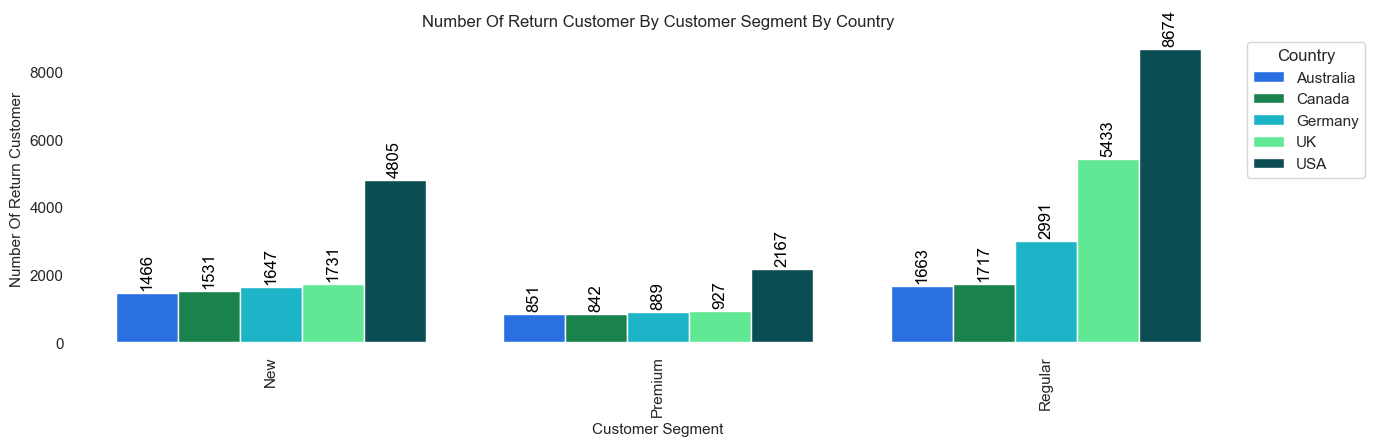

In [129]:
sns.set_theme(font_scale=1)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15, 4))
sns.barplot(data=number_of_return_customer, y = 'NumberOfReturnCustomer' , x='Customer_Segment', hue='Country', ax=ax, palette = sns.color_palette(cc.glasbey_cool, n_colors=5), width=0.8)
ax.set_xlabel('Customer Segment', fontsize=11)
ax.set_ylabel("Number Of Return Customer", fontsize=11)
for i in ax.containers:
    ax.bar_label(i,  padding=2, fmt='%.1d', color = 'black', rotation = 90, fontsize = 12)
ax.set_title('Number Of Return Customer By Customer Segment By Country', fontsize = 12)
ax.tick_params(axis='x', labelrotation = 90)
plt.ticklabel_format(style='plain', axis='y')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine(bottom = True, left = True)